<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

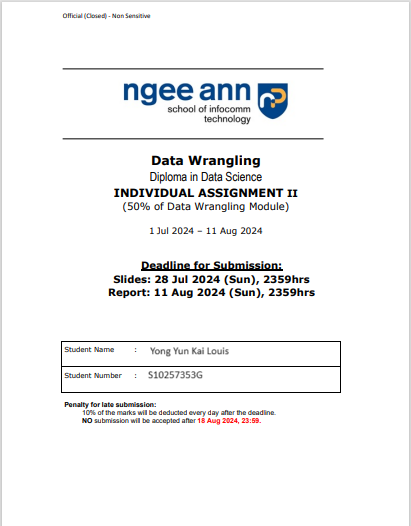

# Table Of Contents <a id = "codetop">

## [Code](#code)

## [Step 1: Load and Explore the Data](#step1)

## [Step 2: Data Wrangling on multiple tables ](#step2)

## [Step3](#step3)
   - [3.1 Missing Value Imputation](#missingvalue)
   - [3.2 Data Transformation](#datatransformation)
   - [3.3 Outlier Handling](#outlierhandling)
   - [3.4 Discretization](#discretisation)
   - [3.5 Catergorical Encoding](#categoricalencoding)
   - [3.6 Scaling](#scaling)
   - [3.7 Others](#others)

## [Step 4: Machine Learning Modelling](#step4)


## [Report](#report)

<a id = "code"></a>
# **Code**

In [625]:
# import the pacakges
# Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import feature_engine
import scipy.stats as stats
import math
import seaborn as sns

# Transformation
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import BoxCoxTransformer

# Outlier Handling
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import ArbitraryOutlierCapper

# Missing Value Imputation
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import EndTailImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.imputation import AddMissingIndicator

# Categorical Data Encoding
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import MeanEncoder

# Discretization
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

# Others
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Train Test Split
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id = "step1"></a>
### **Step 1: Load and Explore the Data** 

[**Back to Top**](#codetop)

In [626]:
#Loading Data
bat = pd.read_csv('batting.csv')
field = pd.read_csv('fielding.csv')
pitch = pd.read_csv('pitching.csv')
salary = pd.read_csv('salary.csv')
team = pd.read_csv('team.csv')

In [627]:
print(bat.shape, field.shape, pitch.shape, salary.shape)

(101332, 22) (170526, 18) (44139, 30) (25575, 5)


In [628]:
bat.head()

player_id  year  stint team_id league_id   g     ab     r     h  double  \
0  abercda01  1871      1     TRO       NaN   1    4.0   0.0   0.0     0.0   
1   addybo01  1871      1     RC1       NaN  25  118.0  30.0  32.0     6.0   
2  allisar01  1871      1     CL1       NaN  29  137.0  28.0  40.0     4.0   
3  allisdo01  1871      1     WS3       NaN  27  133.0  28.0  44.0    10.0   
4  ansonca01  1871      1     RC1       NaN  25  120.0  29.0  39.0    11.0   

   ...   rbi   sb   cs   bb   so  ibb  hbp  sh  sf  g_idp  
0  ...   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN    NaN  
1  ...  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN    NaN  
2  ...  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN    NaN  
3  ...  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN    NaN  
4  ...  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN    NaN  

[5 rows x 22 columns]

In [629]:
field.head()

player_id  year  stint team_id league_id pos   g  gs  inn_outs    po     a  \
0  abercda01  1871      1     TRO       NaN  SS   1 NaN       NaN   1.0   3.0   
1   addybo01  1871      1     RC1       NaN  2B  22 NaN       NaN  67.0  72.0   
2   addybo01  1871      1     RC1       NaN  SS   3 NaN       NaN   8.0  14.0   
3  allisar01  1871      1     CL1       NaN  2B   2 NaN       NaN   1.0   4.0   
4  allisar01  1871      1     CL1       NaN  OF  29 NaN       NaN  51.0   3.0   

      e   dp  pb  wp  sb  cs  zr  
0   2.0  0.0 NaN NaN NaN NaN NaN  
1  42.0  5.0 NaN NaN NaN NaN NaN  
2   7.0  0.0 NaN NaN NaN NaN NaN  
3   0.0  0.0 NaN NaN NaN NaN NaN  
4   7.0  1.0 NaN NaN NaN NaN NaN

In [630]:
pitch.head()

player_id  year  stint team_id league_id   w   l   g  gs  cg  ...  ibb  wp  \
0  bechtge01  1871      1     PH1       NaN   1   2   3   3   2  ...  NaN NaN   
1  brainas01  1871      1     WS3       NaN  12  15  30  30  30  ...  NaN NaN   
2  fergubo01  1871      1     NY2       NaN   0   0   1   0   0  ...  NaN NaN   
3  fishech01  1871      1     RC1       NaN   4  16  24  24  22  ...  NaN NaN   
4  fleetfr01  1871      1     NY2       NaN   0   1   1   1   1  ...  NaN NaN   

   hbp  bk  bfp  gf    r  sh  sf  g_idp  
0  NaN   0  NaN NaN   42 NaN NaN    NaN  
1  NaN   0  NaN NaN  292 NaN NaN    NaN  
2  NaN   0  NaN NaN    9 NaN NaN    NaN  
3  NaN   0  NaN NaN  257 NaN NaN    NaN  
4  NaN   0  NaN NaN   21 NaN NaN    NaN  

[5 rows x 30 columns]

In [631]:
salary.head()

year team_id league_id  player_id  salary
0  1985     ATL        NL  barkele01  870000
1  1985     ATL        NL  bedrost01  550000
2  1985     ATL        NL  benedbr01  545000
3  1985     ATL        NL   campri01  633333
4  1985     ATL        NL  ceronri01  625000

In [632]:
team.head()

year league_id team_id franchise_id div_id  rank   g  ghome   w   l  ...  \
0  1871       NaN     BS1          BNA    NaN     3  31    NaN  20  10  ...   
1  1871       NaN     CH1          CNA    NaN     2  28    NaN  19   9  ...   
2  1871       NaN     CL1          CFC    NaN     8  29    NaN  10  19  ...   
3  1871       NaN     FW1          KEK    NaN     7  19    NaN   7  12  ...   
4  1871       NaN     NY2          NNA    NaN     5  33    NaN  16  17  ...   

   dp    fp                     name                          park  \
0 NaN  0.83     Boston Red Stockings           South End Grounds I   
1 NaN  0.82  Chicago White Stockings       Union Base-Ball Grounds   
2 NaN  0.81   Cleveland Forest Citys  National Association Grounds   
3 NaN  0.80     Fort Wayne Kekiongas                Hamilton Field   
4 NaN  0.83         New York Mutuals      Union Grounds (Brooklyn)   

   attendance  bpf  ppf  team_id_br  team_id_lahman45  team_id_retro  
0         NaN  103   98         BOS               BS1            BS1  
1         NaN  104  102         CHI               CH1            CH1  
2         NaN   96  100         CLE               CL1            CL1  
3         NaN  101  107         KEK               FW1            FW1  
4         NaN   90   88         NYU               NY2            NY2  

[5 rows x 48 columns]

<a id = "step2"></a>
### **Step 2: Data Wrangling on multiple tables**

[**Back to Top**](#codetop)

In [633]:
# determine required columns
bat_columns = ['player_id', 'year', 'team_id', 'h', 'double', 'triple', 'hr', 'rbi', 'bb', 'so', 'hbp', 'sf', 'ab']
pitch_columns = ['player_id', 'year', 'w', 'l', 'g', 'gs', 'cg', 'sho', 'sv', 'ipouts', 'h', 'er', 'hr', 'bb', 'so', 'era']
field_columns = ['player_id', 'year', 'g', 'po', 'a', 'e']
award_columns = ['player_id', 'award_id', 'year']
salary_columns = ['player_id', 'year', 'salary']
team_columns = ['year', 'team_id', 'league_id', 'team_id_br', 'rank']

In [634]:
# nulls_per_year1 = pitch.groupby('year').apply(lambda x: x.isnull().sum().sum())
# max_nulls = nulls_per_year1.max()
# years_with_max_nulls = nulls_per_year1[nulls_per_year1 == max_nulls].index
# years_with_max_nulls.max()

In [635]:
bat = bat[(bat['year'] >= 1876) & (bat['year'] <= 2015)]
pitch = pitch[(pitch['year'] >= 1876) & (pitch['year'] <= 2015)]
field = field[(field['year'] >= 1876) & (field['year'] <= 2015)]
salary = salary[(salary['year'] >= 1876) & (salary['year'] <= 2015)]
team = team[(team['year'] >= 1876) & (team['year'] <= 2015)]

In [636]:
#Merging Tables
merged_df = pd.merge(bat[bat_columns], team[team_columns], on=['year', 'team_id'], how='left')
merged_df = pd.merge(merged_df, pitch[pitch_columns], on=['player_id', 'year'], how='left')
merged_df = pd.merge(merged_df, field[field_columns], on=['player_id', 'year'], how='left')
merged_df = pd.merge(merged_df, salary[salary_columns], on=['player_id', 'year'], how='left')
default_merged_df = merged_df.copy()

In [637]:
#Data Overview
merged_df.head()

player_id  year team_id   h_x  double  triple  hr_x   rbi  bb_x  so_x  ...  \
0   addybo01  1876     CHN  40.0     4.0     1.0   0.0  16.0   5.0   0.0  ...   
1  allisar01  1876     LS1  27.0     2.0     1.0   0.0  10.0   2.0   6.0  ...   
2  allisar01  1876     LS1  27.0     2.0     1.0   0.0  10.0   2.0   6.0  ...   
3  allisdo01  1876     HAR  43.0     4.0     0.0   0.0  15.0   3.0   9.0  ...   
4  allisdo01  1876     HAR  43.0     4.0     0.0   0.0  15.0   3.0   9.0  ...   

   er  hr_y  bb_y so_y era   g_y     po     a     e  salary  
0 NaN   NaN   NaN  NaN NaN  32.0   46.0   6.0  13.0     NaN  
1 NaN   NaN   NaN  NaN NaN   8.0   90.0   1.0   4.0     NaN  
2 NaN   NaN   NaN  NaN NaN  23.0   34.0  11.0  12.0     NaN  
3 NaN   NaN   NaN  NaN NaN  40.0  201.0  43.0  33.0     NaN  
4 NaN   NaN   NaN  NaN NaN   6.0    5.0   0.0   1.0     NaN  

[5 rows x 35 columns]

In [638]:
#Data Information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212025 entries, 0 to 212024
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   player_id   212025 non-null  object 
 1   year        212025 non-null  int64  
 2   team_id     212025 non-null  object 
 3   h_x         204234 non-null  float64
 4   double      204234 non-null  float64
 5   triple      204234 non-null  float64
 6   hr_x        204234 non-null  float64
 7   rbi         202679 non-null  float64
 8   bb_x        204234 non-null  float64
 9   so_x        188053 non-null  float64
 10  hbp         198738 non-null  float64
 11  sf          142801 non-null  float64
 12  ab          204234 non-null  float64
 13  league_id   212025 non-null  object 
 14  team_id_br  212025 non-null  object 
 15  rank        212025 non-null  int64  
 16  w           72554 non-null   float64
 17  l           72554 non-null   float64
 18  g_x         72554 non-null   float64
 19  gs

In [639]:
merged_df.isnull().sum()

player_id          0
year               0
team_id            0
h_x             7791
double          7791
triple          7791
hr_x            7791
rbi             9346
bb_x            7791
so_x           23972
hbp            13287
sf             69224
ab              7791
league_id          0
team_id_br         0
rank               0
w             139471
l             139471
g_x           139471
gs            139471
cg            139471
sho           139471
sv            139471
ipouts        139480
h_y           139471
er            139471
hr_y          139471
bb_y          139471
so_y          139471
era           139651
g_y              992
po             17566
a              17567
e              17568
salary        144248
dtype: int64

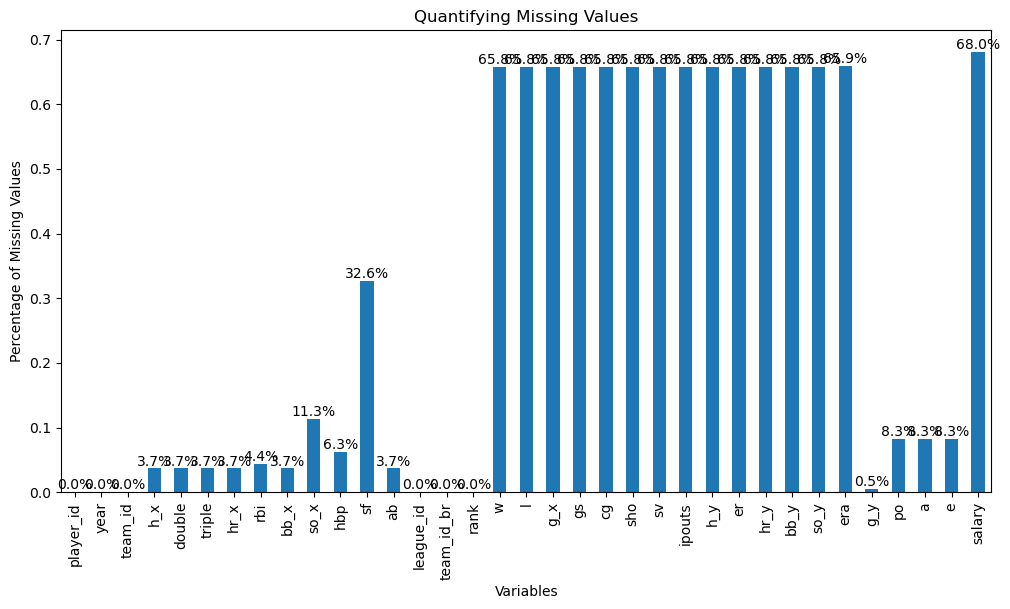

In [640]:
#Checking for the number of null values
missing_values = merged_df.isnull().mean()
missing_values.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(missing_values):
    plt.annotate(f'{value:.1%}', xy=(i, value), ha='center', va='bottom')

In [641]:
# Create new time series features (decade)
def get_decade(year):
    return (year // 10) * 10

merged_df['decade'] = merged_df['year'].apply(get_decade)

In [642]:
# calculate new features (mathematical)
#Batting Average
merged_df['bat_ave'] = merged_df['h_x'] / merged_df['ab']
#On Base Percentage
merged_df['obp'] = (merged_df['h_x'] + merged_df['hbp']
                     + merged_df['bb_x']) / (merged_df['ab'] + merged_df['bb_x'] + 
                                                              merged_df['hbp'] + merged_df['sf'])
#Slugging Percentage
merged_df['slg'] = (merged_df['h_x'] + 2*merged_df['double'] + 
                    3*merged_df['triple'] + 4*merged_df['hr_x']) / merged_df['ab']
#Fielding Percentage
merged_df['field_per'] = (merged_df['po'] + merged_df['a']) / (merged_df['po'] + merged_df['a']
                                                                + merged_df['e'])

In [643]:
# Renaming relevant columns
column_rename_dict = {'h_x': 'hits', 'hr_x' : 'home_runs', 'rbi' : 'runs_batted_in', 'bb_x' : 'bases_on_ball', 'so_x' : 'strikeouts', 'hbp' : 'hits_by_pitch', 'sf' : 'sacrifice_flies', 'ab' : 'at_bats', 'po' : 'putouts', 'a' : 'assists', 'e' : 'errors', 'g_y' : 'pitch_games'}
merged_df.rename(columns=column_rename_dict, inplace=True)

In [644]:
#Check New Columns
merged_df.head(10)

player_id  year team_id   hits  double  triple  home_runs  runs_batted_in  \
0   addybo01  1876     CHN   40.0     4.0     1.0        0.0            16.0   
1  allisar01  1876     LS1   27.0     2.0     1.0        0.0            10.0   
2  allisar01  1876     LS1   27.0     2.0     1.0        0.0            10.0   
3  allisdo01  1876     HAR   43.0     4.0     0.0        0.0            15.0   
4  allisdo01  1876     HAR   43.0     4.0     0.0        0.0            15.0   
5  andrufr01  1876     CHN   11.0     3.0     0.0        0.0             2.0   
6  ansonca01  1876     CHN  110.0     9.0     7.0        2.0            59.0   
7  ansonca01  1876     CHN  110.0     9.0     7.0        2.0            59.0   
8  barnero01  1876     CHN  138.0    21.0    14.0        1.0            59.0   
9  barnero01  1876     CHN  138.0    21.0    14.0        1.0            59.0   

   bases_on_ball  strikeouts  ...  pitch_games  putouts  assists errors  \
0            5.0         0.0  ...         32.0     46.0      6.0   13.0   
1            2.0         6.0  ...          8.0     90.0      1.0    4.0   
2            2.0         6.0  ...         23.0     34.0     11.0   12.0   
3            3.0         9.0  ...         40.0    201.0     43.0   33.0   
4            3.0         9.0  ...          6.0      5.0      0.0    1.0   
5            0.0         5.0  ...          8.0      5.0      0.0    2.0   
6           12.0         8.0  ...         66.0    135.0    147.0   50.0   
7           12.0         8.0  ...          2.0      2.0      0.0    0.0   
8           20.0         8.0  ...         66.0    167.0    199.0   36.0   
9           20.0         8.0  ...          1.0      0.0      0.0    0.0   

  salary  decade   bat_ave  obp       slg  field_per  
0    NaN    1870  0.281690  NaN  0.359155   0.800000  
1    NaN    1870  0.207692  NaN  0.261538   0.957895  
2    NaN    1870  0.207692  NaN  0.261538   0.789474  
3    NaN    1870  0.263804  NaN  0.312883   0.880866  
4    NaN    1870  0.263804  NaN  0.312883   0.833333  
5    NaN    1870  0.305556  NaN  0.472222   0.714286  
6    NaN    1870  0.355987  NaN  0.508091   0.849398  
7    NaN    1870  0.355987  NaN  0.508091   1.000000  
8    NaN    1870  0.428571  NaN  0.701863   0.910448  
9    NaN    1870  0.428571  NaN  0.701863        NaN  

[10 rows x 40 columns]

In [645]:
# Copy data
added_column_df = merged_df.copy()

In [646]:
print(merged_df.nunique())

player_id          18463
year                 140
team_id              123
hits                 250
double                64
triple                32
home_runs             67
runs_batted_in       175
bases_on_ball        155
strikeouts           203
hits_by_pitch         41
sacrifice_flies       20
at_bats              699
league_id              6
team_id_br            88
rank                  13
w                     53
l                     42
g_x                   94
gs                    75
cg                    73
sho                   15
sv                    57
ipouts              1300
h_y                  518
er                   215
hr_y                  48
bb_y                 210
so_y                 339
era                 1154
pitch_games          166
putouts             1552
assists              582
errors               106
salary              3228
decade                15
bat_ave            12619
obp                11230
slg                20247
field_per          11134


Text(0.5, 1.0, 'Cardinality')

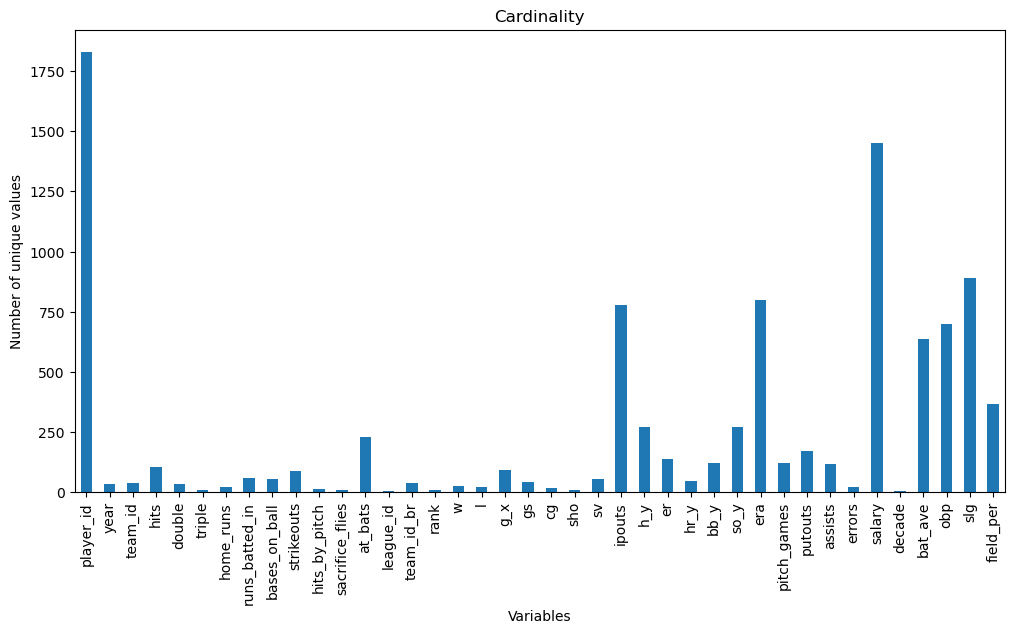

In [647]:
seperate_data = merged_df.dropna()
seperate_data.nunique().plot.bar(figsize=(12,6))
plt.ylabel("Number of unique values")
plt.xlabel("Variables")
plt.title("Cardinality")

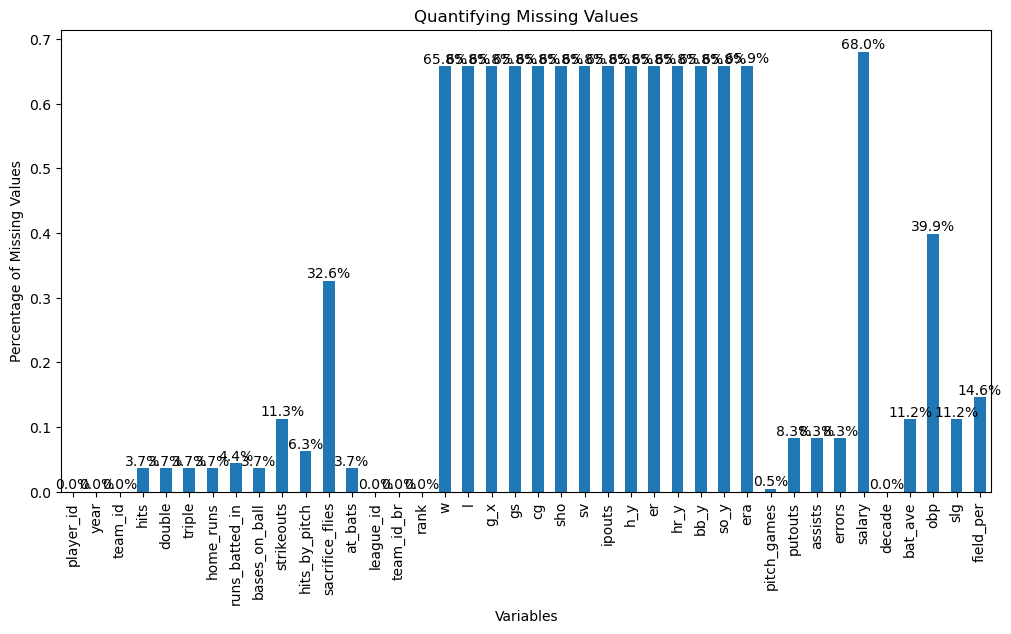

In [648]:
#Checking for the number of null values
missing_values = merged_df.isnull().mean()
missing_values.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(missing_values):
    plt.annotate(f'{value:.1%}', xy=(i, value), ha='center', va='bottom')

In [649]:
# Identifying catergorical variables
cat_cols = [c for c in merged_df.columns if merged_df[c].dtypes=='O']
cat_cols

['player_id', 'team_id', 'league_id', 'team_id_br']

In [650]:
print(merged_df['team_id'].unique())
print(merged_df['team_id'].nunique())

['CHN' 'LS1' 'HAR' 'SL3' 'NY3' 'PHN' 'CN1' 'BSN' 'PRO' 'ML2' 'IN1' 'SR1'
 'CL2' 'TRN' 'BFN' 'WOR' 'DTN' 'PT1' 'PH4' 'LS2' 'BL2' 'SL4' 'CN2' 'NY1'
 'PHI' 'NY4' 'CL5' 'WSU' 'KCU' 'TL1' 'CHU' 'BLU' 'IN2' 'PHU' 'WIL' 'SLU'
 'MLU' 'CNU' 'SPU' 'WS7' 'BR3' 'ALT' 'BSU' 'RIC' 'SL5' 'KCN' 'WS8' 'CL3'
 'IN3' 'PIT' 'KC2' 'CL4' 'CL6' 'TL2' 'BRP' 'CLP' 'BL3' 'CIN' 'BRO' 'BFP'
 'CHP' 'RC2' 'SR2' 'PTP' 'BR4' 'BSP' 'NYP' 'PHP' 'ML3' 'WS9' 'CN3' 'BS2'
 'WAS' 'LS3' 'SLN' 'BLN' 'MLA' 'CLE' 'PHA' 'DET' 'BOS' 'CHA' 'BLA' 'WS1'
 'SLA' 'NYA' 'KCF' 'PTF' 'BUF' 'BLF' 'BRF' 'CHF' 'IND' 'SLF' 'NEW' 'ML1'
 'BAL' 'KC1' 'SFN' 'LAN' 'MIN' 'LAA' 'WS2' 'HOU' 'NYN' 'CAL' 'ATL' 'OAK'
 'KCA' 'SE1' 'SDN' 'MON' 'ML4' 'TEX' 'SEA' 'TOR' 'COL' 'FLO' 'ANA' 'ARI'
 'TBA' 'MIL' 'MIA']
123


In [651]:
print(merged_df['team_id_br'].unique())
print(merged_df['team_id_br'].nunique())

['CHC' 'LOU' 'HAR' 'STL' 'NYU' 'ATH' 'CIN' 'BSN' 'PRO' 'MLG' 'IND' 'SYR'
 'CLV' 'TRO' 'BUF' 'WOR' 'DTN' 'PIT' 'PHA' 'BAL' 'NYG' 'PHI' 'NYP' 'COL'
 'WHS' 'KCC' 'TOL' 'CPI' 'BLU' 'PHK' 'WIL' 'SLM' 'MIL' 'COR' 'STP' 'WAS'
 'BRO' 'ALT' 'BOS' 'RIC' 'KCN' 'CLE' 'BWW' 'CHI' 'ROC' 'PBB' 'BRG' 'NYI'
 'PHQ' 'CKK' 'BLN' 'MLA' 'DET' 'CHW' 'BLA' 'WSH' 'SLB' 'NYY' 'KCP' 'PBS'
 'BTT' 'NEW' 'MLN' 'KCA' 'SFG' 'LAD' 'MIN' 'LAA' 'WSA' 'HOU' 'NYM' 'CAL'
 'ATL' 'OAK' 'KCR' 'SEP' 'SDP' 'MON' 'TEX' 'SEA' 'TOR' 'FLA' 'ANA' 'ARI'
 'TBD' 'WSN' 'TBR' 'MIA']
88


<Axes: xlabel='team_id', ylabel='count'>

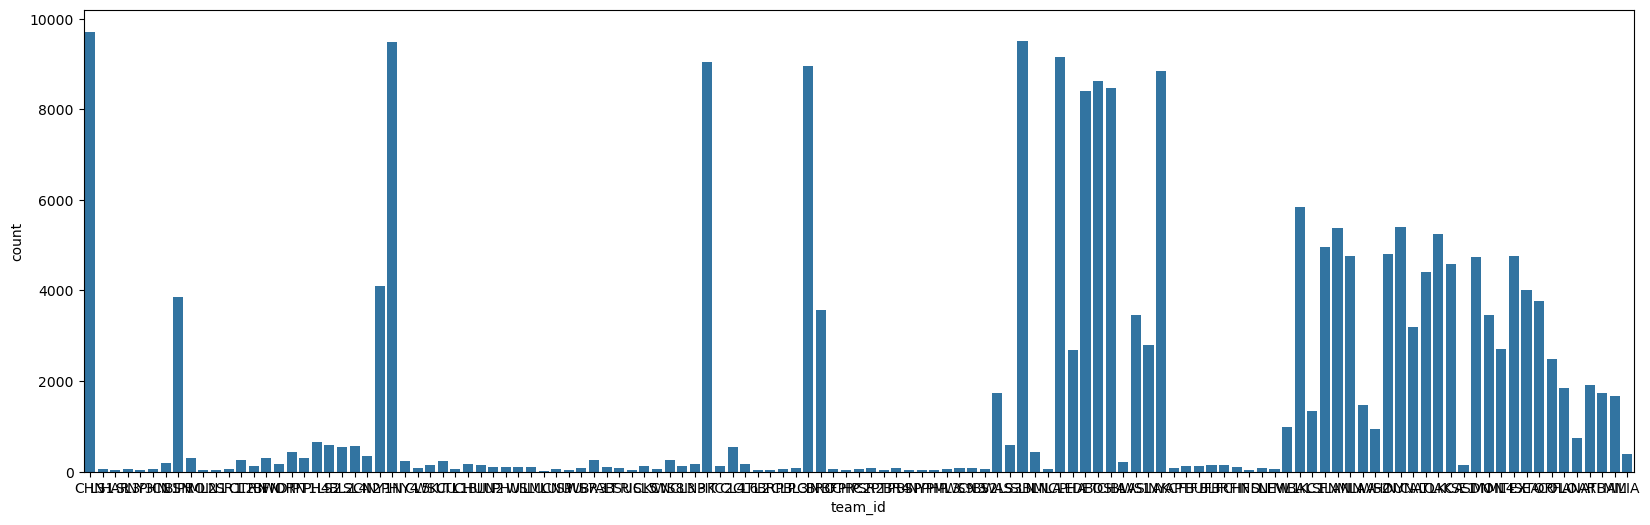

In [652]:
plt.figure(figsize=(20, 6)) 
sns.countplot(data=merged_df, x=merged_df['team_id'])

<Axes: xlabel='team_id_br', ylabel='count'>

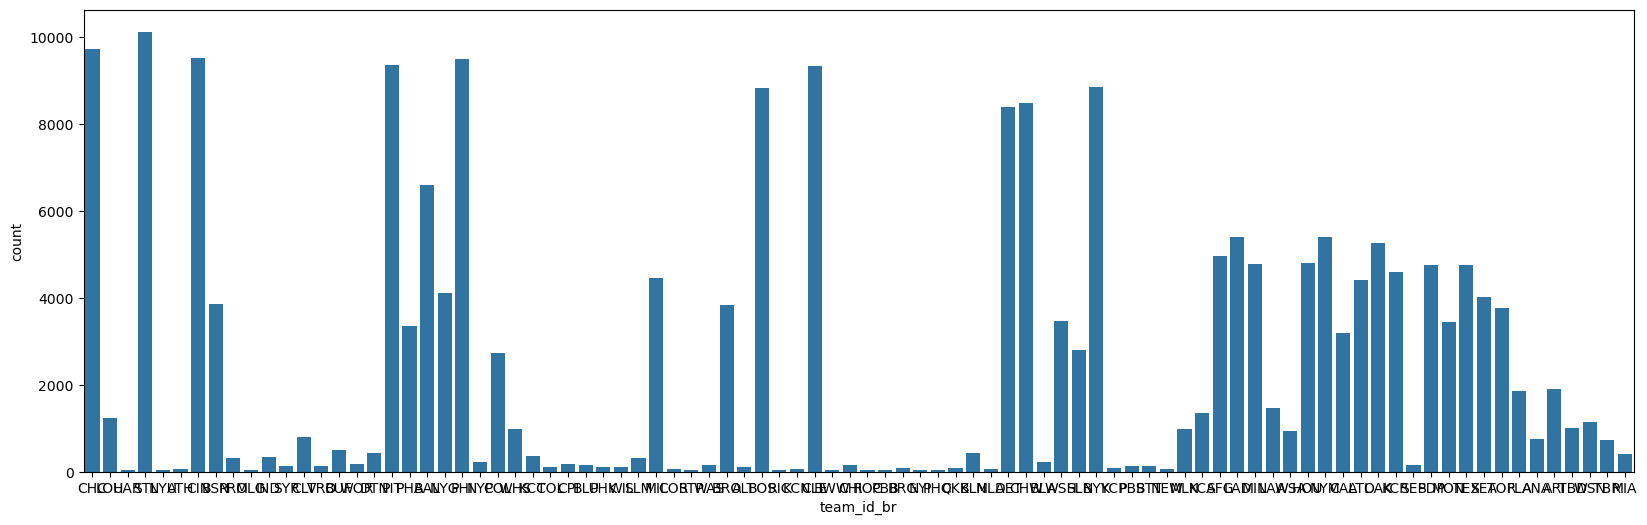

In [653]:
plt.figure(figsize=(20, 6)) 
sns.countplot(data=merged_df, x=merged_df['team_id_br'])

<Axes: xlabel='league_id', ylabel='count'>

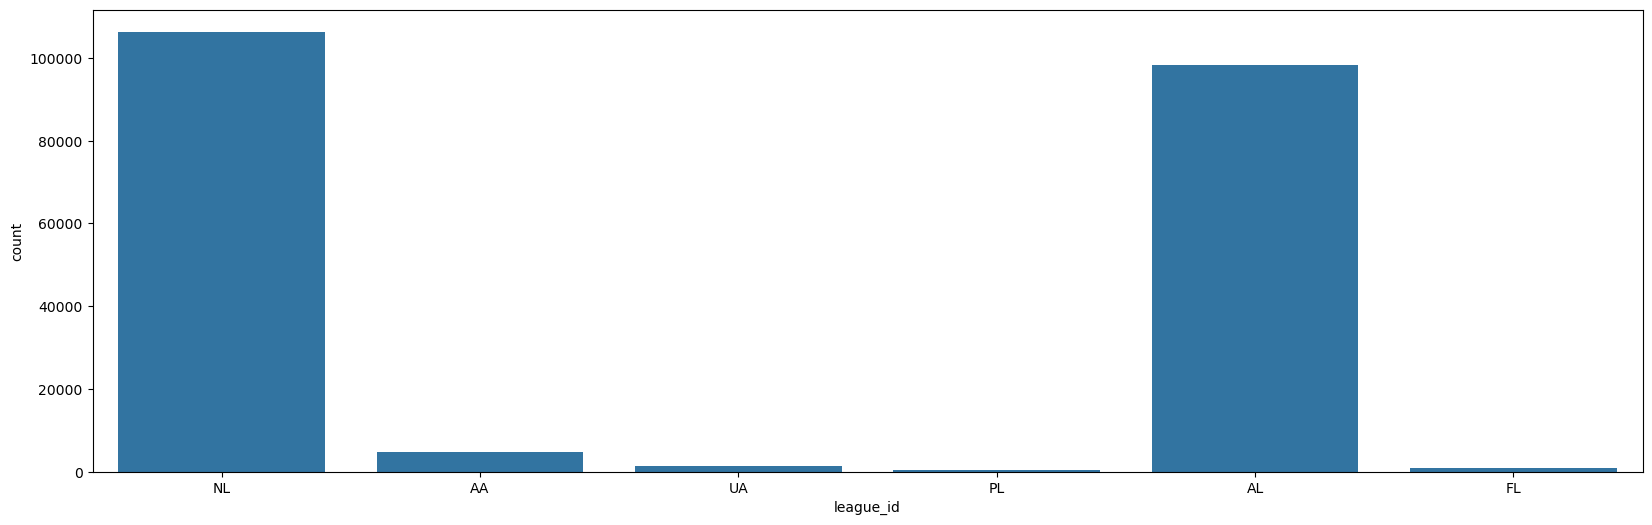

In [654]:
plt.figure(figsize=(20, 6)) 
sns.countplot(data=merged_df, x=merged_df['league_id'])

In [655]:
#Identifying numeric variables
num_cols = [num for num in merged_df.columns if merged_df[num].dtypes!='O']
num_cols.remove('salary')
num_cols

['year',
 'hits',
 'double',
 'triple',
 'home_runs',
 'runs_batted_in',
 'bases_on_ball',
 'strikeouts',
 'hits_by_pitch',
 'sacrifice_flies',
 'at_bats',
 'rank',
 'w',
 'l',
 'g_x',
 'gs',
 'cg',
 'sho',
 'sv',
 'ipouts',
 'h_y',
 'er',
 'hr_y',
 'bb_y',
 'so_y',
 'era',
 'pitch_games',
 'putouts',
 'assists',
 'errors',
 'decade',
 'bat_ave',
 'obp',
 'slg',
 'field_per']

In [656]:
#All columns
merged_df.columns

Index(['player_id', 'year', 'team_id', 'hits', 'double', 'triple', 'home_runs',
       'runs_batted_in', 'bases_on_ball', 'strikeouts', 'hits_by_pitch',
       'sacrifice_flies', 'at_bats', 'league_id', 'team_id_br', 'rank', 'w',
       'l', 'g_x', 'gs', 'cg', 'sho', 'sv', 'ipouts', 'h_y', 'er', 'hr_y',
       'bb_y', 'so_y', 'era', 'pitch_games', 'putouts', 'assists', 'errors',
       'salary', 'decade', 'bat_ave', 'obp', 'slg', 'field_per'],
      dtype='object')

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'hits'}>,
        <Axes: title={'center': 'double'}>,
        <Axes: title={'center': 'triple'}>,
        <Axes: title={'center': 'home_runs'}>,
        <Axes: title={'center': 'runs_batted_in'}>],
       [<Axes: title={'center': 'bases_on_ball'}>,
        <Axes: title={'center': 'strikeouts'}>,
        <Axes: title={'center': 'hits_by_pitch'}>,
        <Axes: title={'center': 'sacrifice_flies'}>,
        <Axes: title={'center': 'at_bats'}>,
        <Axes: title={'center': 'rank'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'l'}>,
        <Axes: title={'center': 'g_x'}>, <Axes: title={'center': 'gs'}>,
        <Axes: title={'center': 'cg'}>, <Axes: title={'center': 'sho'}>],
       [<Axes: title={'center': 'sv'}>,
        <Axes: title={'center': 'ipouts'}>,
        <Axes: title={'center': 'h_y'}>, <Axes: title={'center': 'er'}>,
        <Axes: title={'center': 'hr_y'}>,
        <Axes: title=

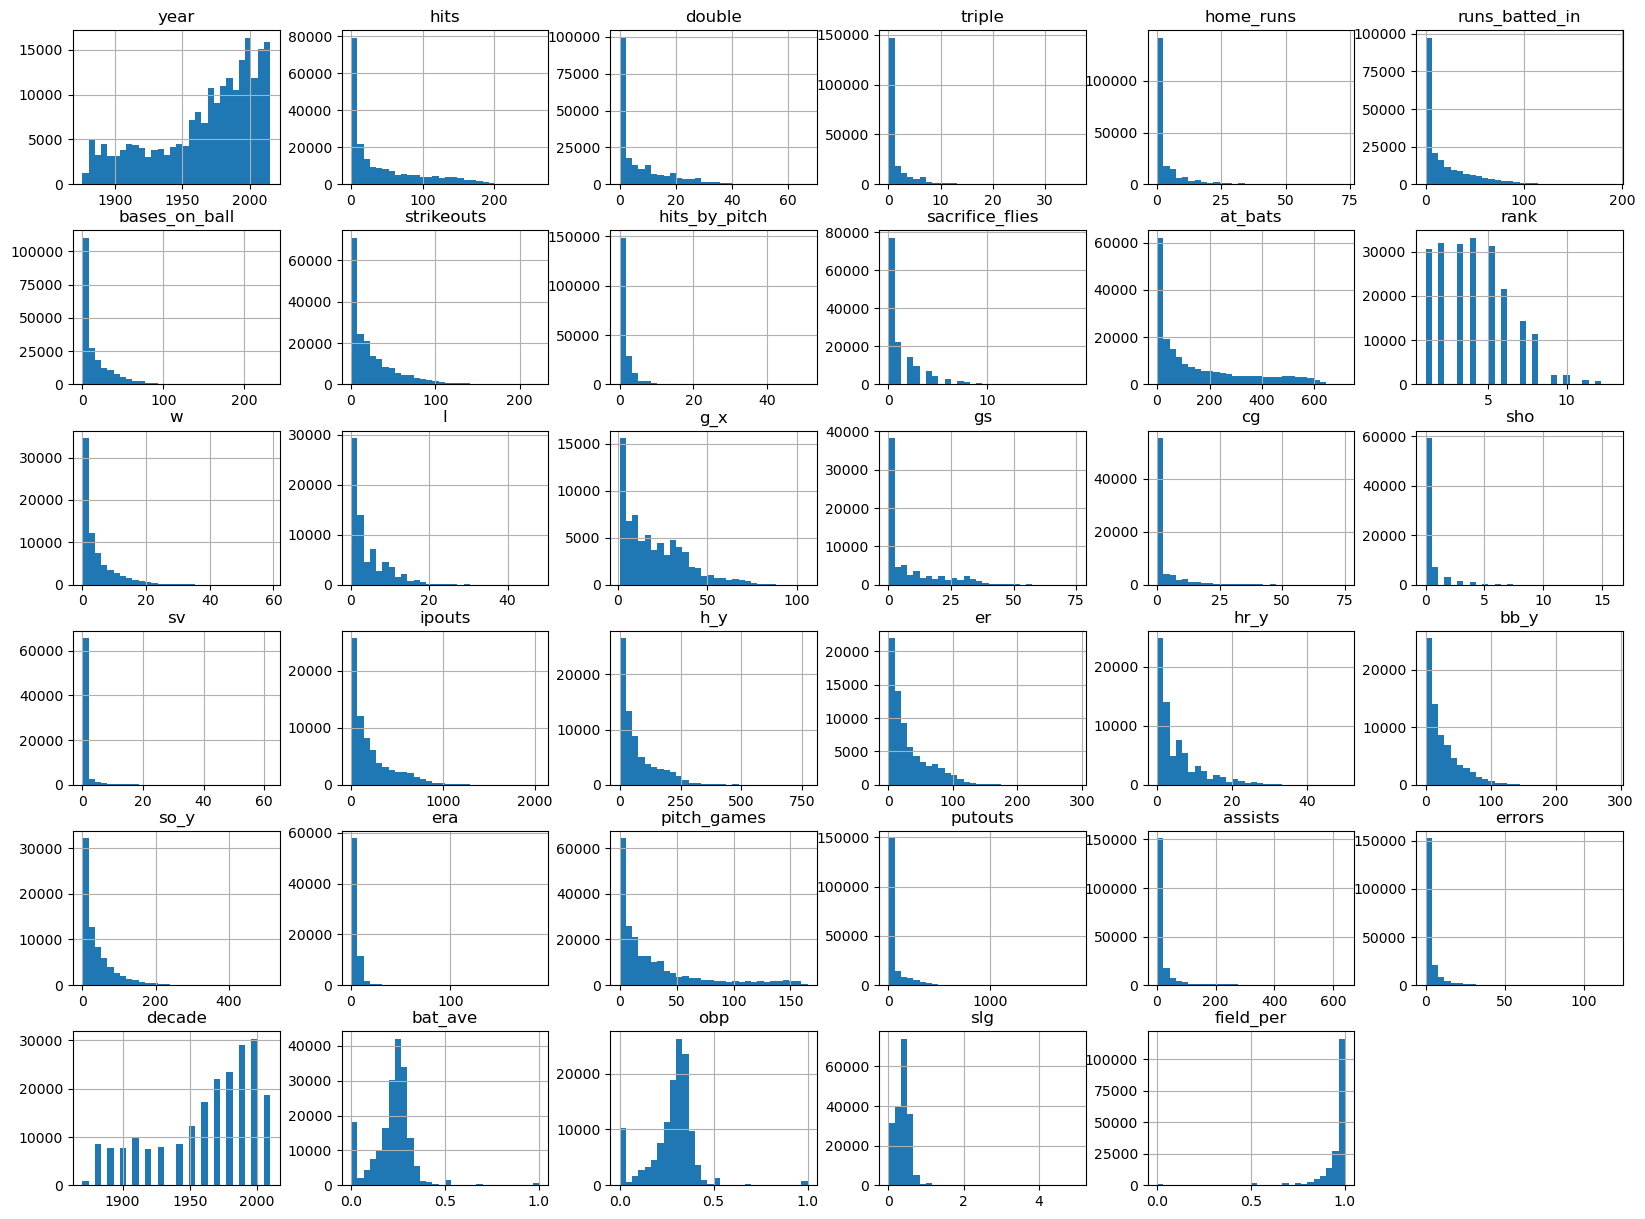

In [657]:
#Distribution of numerical variables (uncomment later)
merged_df[num_cols].hist(figsize=(20,15), bins=30)

<Axes: >

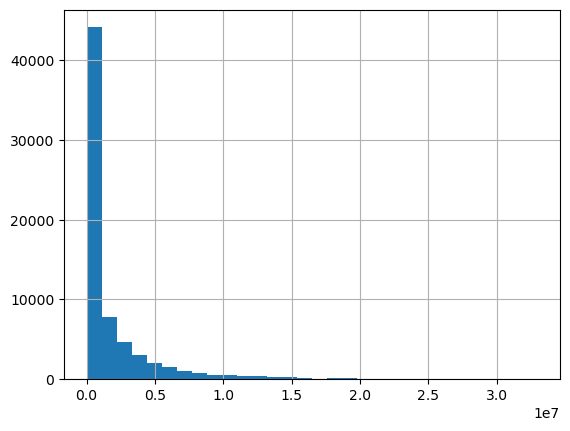

In [658]:
#Distribution of target variable
merged_df['salary'].hist(bins=30)

In [659]:
#Number of Null Values
merged_df.isnull().sum()

player_id               0
year                    0
team_id                 0
hits                 7791
double               7791
triple               7791
home_runs            7791
runs_batted_in       9346
bases_on_ball        7791
strikeouts          23972
hits_by_pitch       13287
sacrifice_flies     69224
at_bats              7791
league_id               0
team_id_br              0
rank                    0
w                  139471
l                  139471
g_x                139471
gs                 139471
cg                 139471
sho                139471
sv                 139471
ipouts             139480
h_y                139471
er                 139471
hr_y               139471
bb_y               139471
so_y               139471
era                139651
pitch_games           992
putouts             17566
assists             17567
errors              17568
salary             144248
decade                  0
bat_ave             23782
obp                 84608
slg         

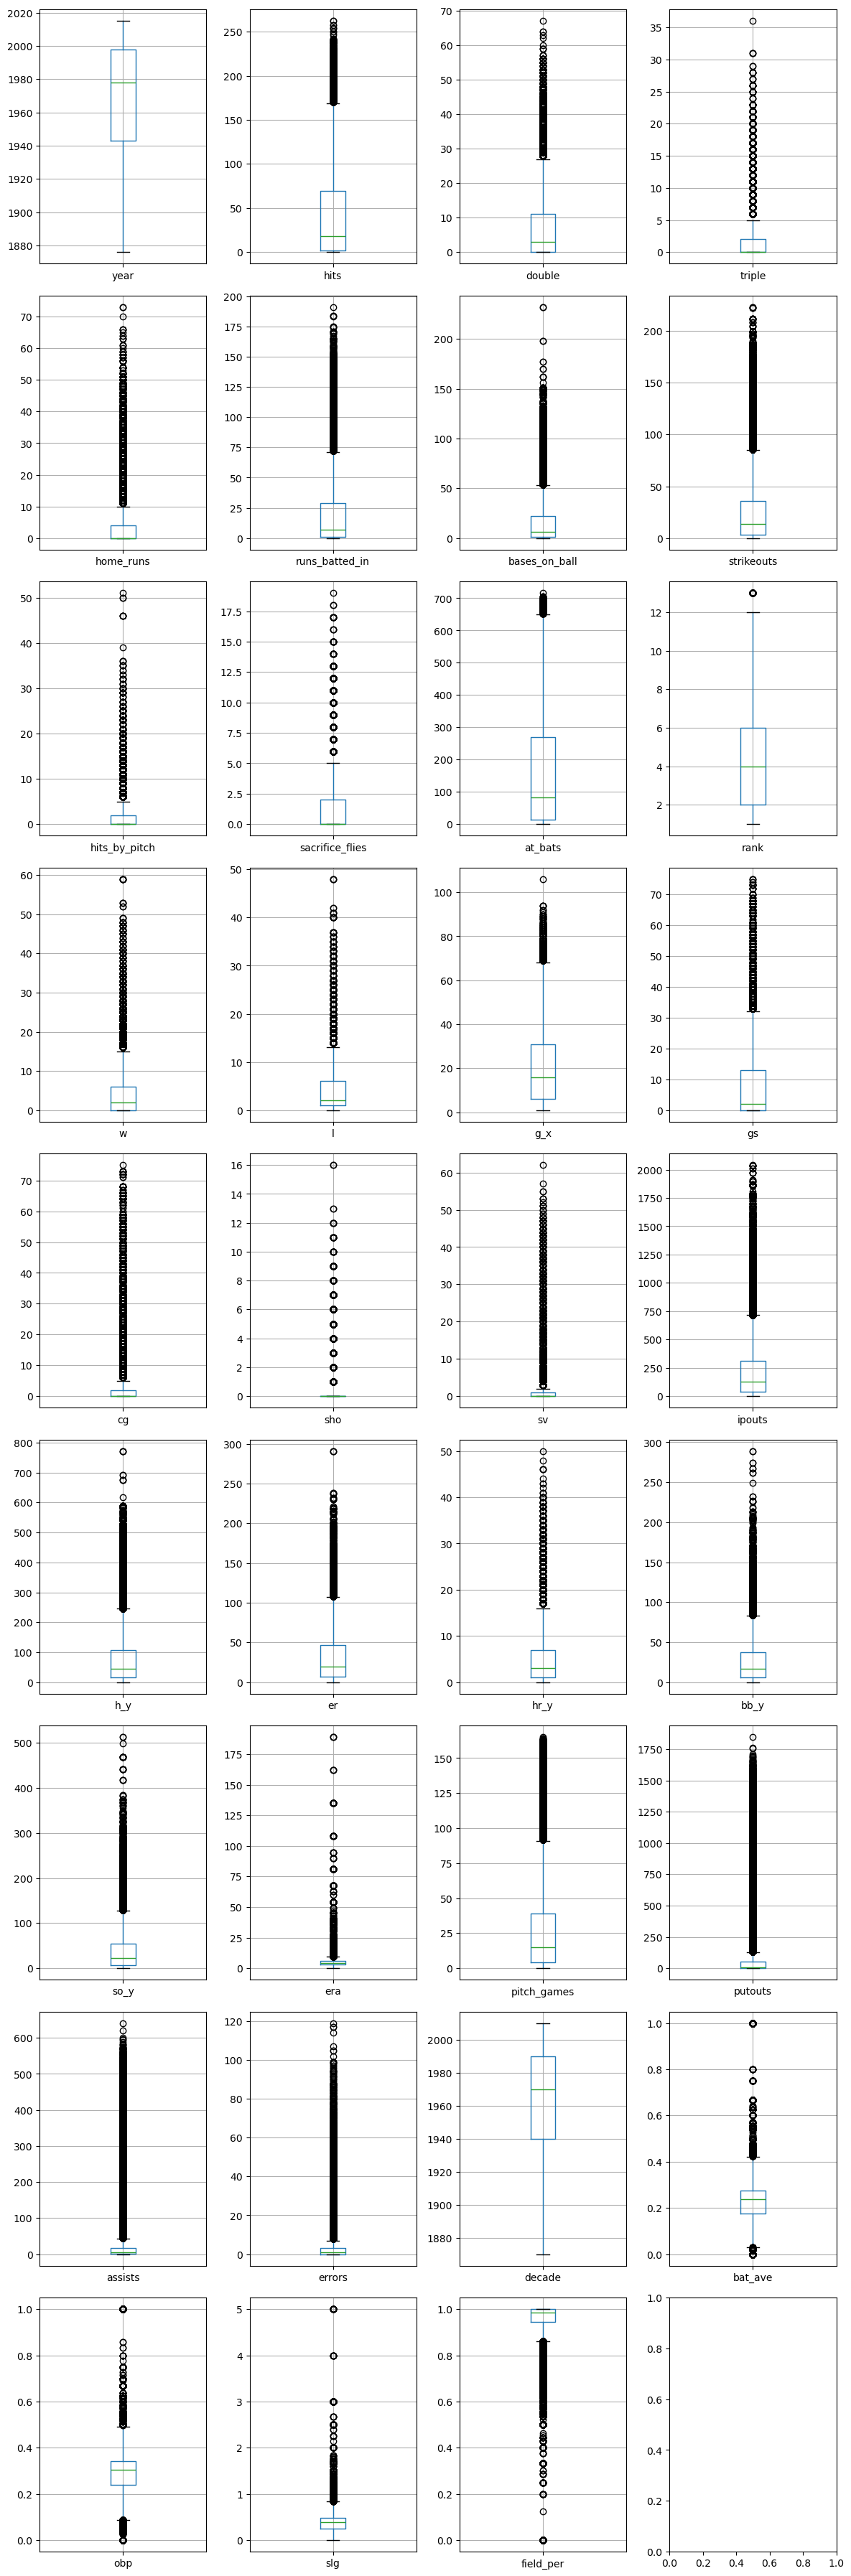

In [660]:
# Outlier Detection (uncomment later)
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 4)  # 4 columns per row

fig, ax = plt.subplots(num_rows, 4, figsize=(12, num_rows * 4))
ax = ax.flatten()

for i, col in enumerate(num_cols):
   merged_df.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

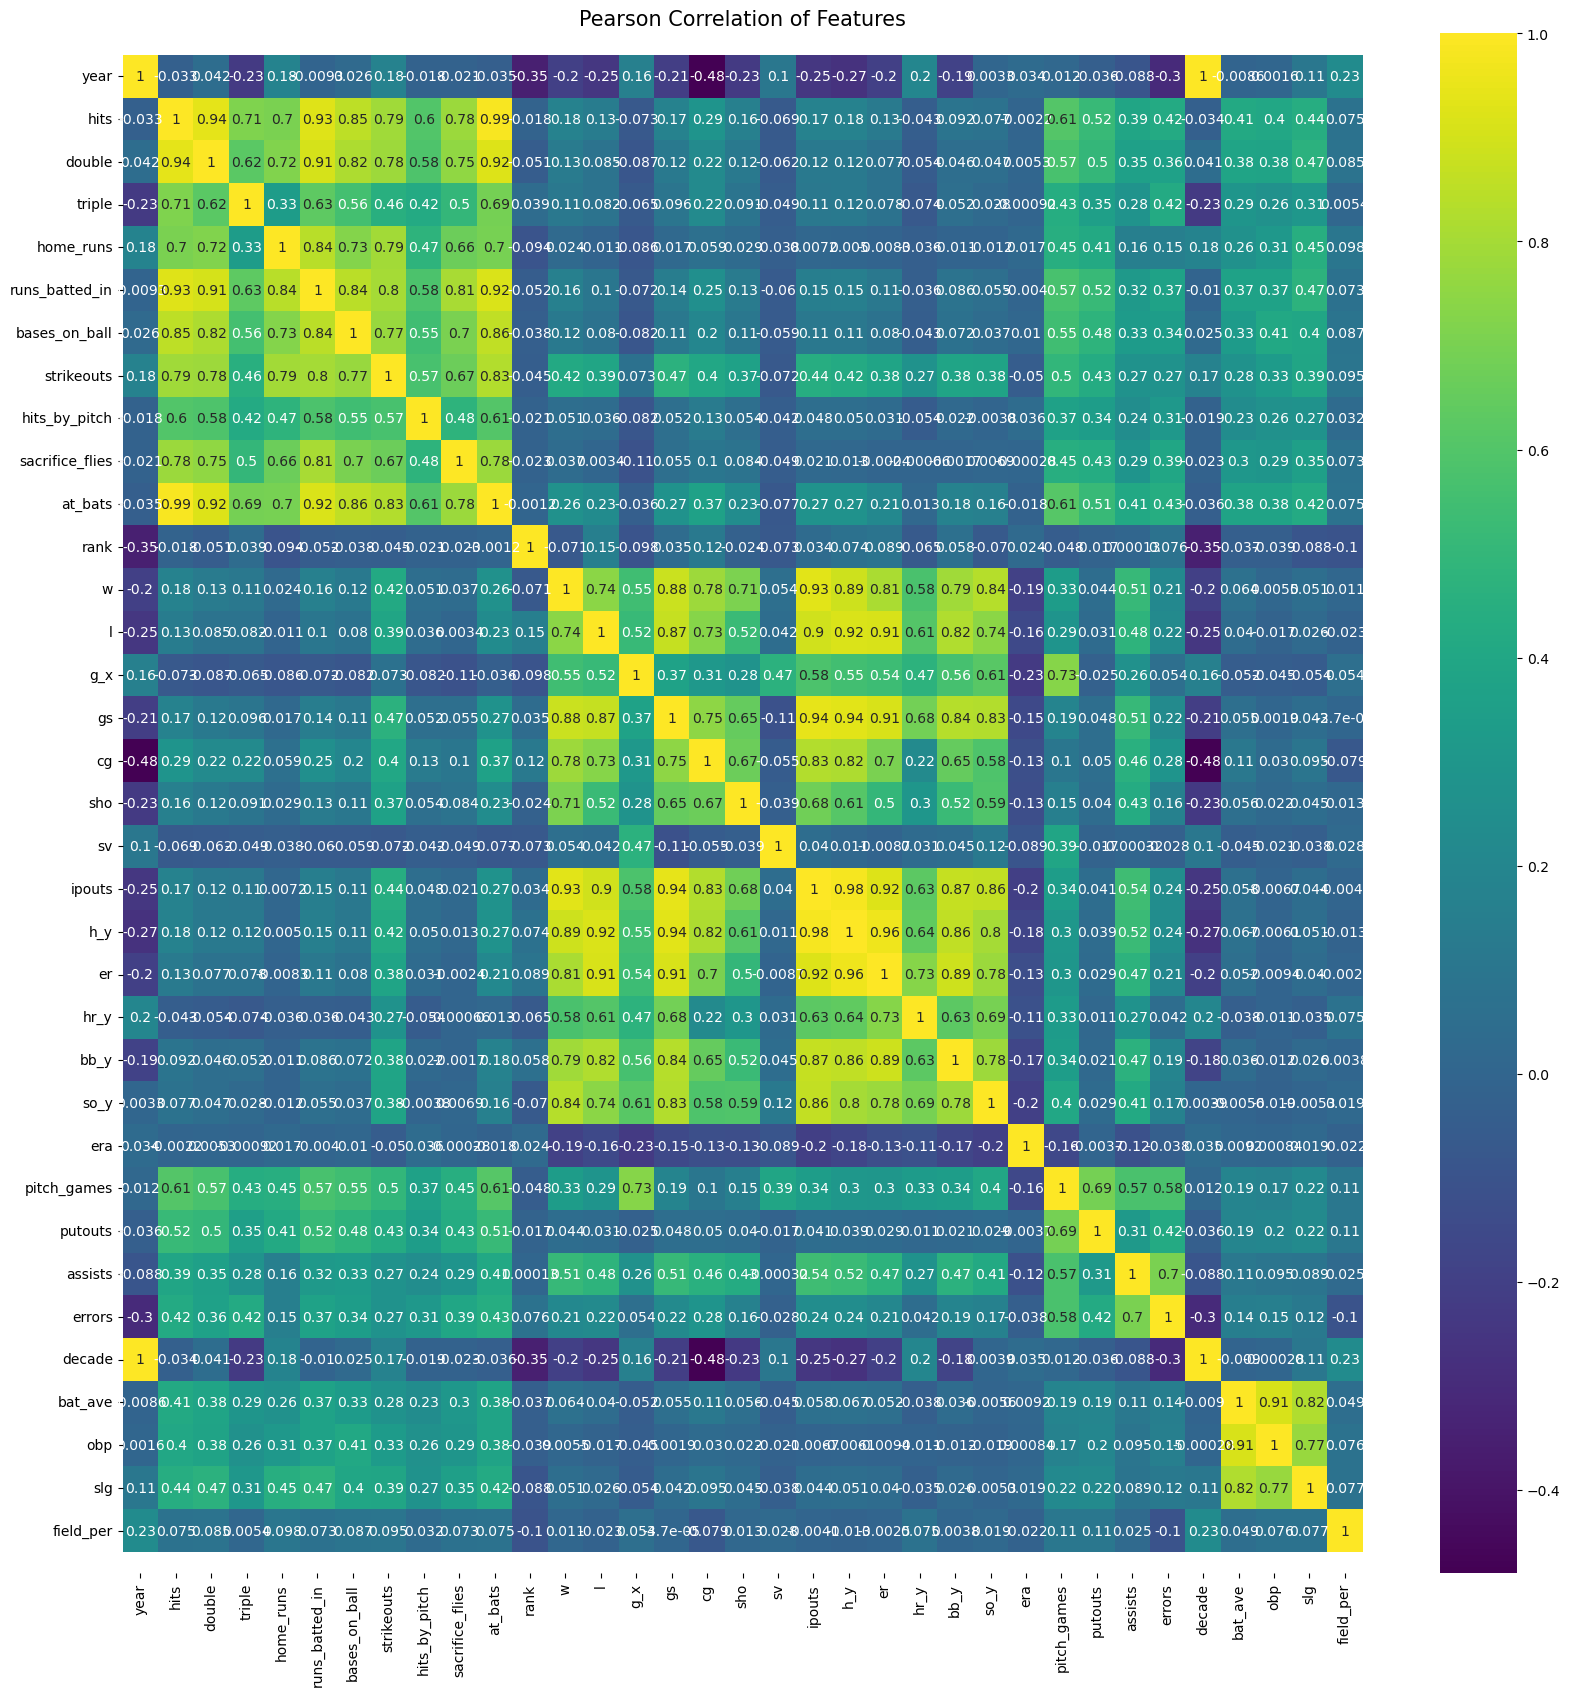

In [661]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(merged_df[num_cols].astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [662]:
# Testing for classification ---------------- Not using

#low_threshold = merged_df['salary'].quantile(0.33)
#high_threshold = merged_df['salary'].quantile(0.66)

#merged_df['salary_category'] = pd.cut(merged_df['salary'], bins=[0, low_threshold, high_threshold, float('inf')],
#                               labels=['low', 'average', 'high'])

#category_mapping = {'low': 0, 'average': 1, 'high': 2}
#merged_df['salary_category'] = merged_df['salary_category'].map(category_mapping)
#merged_df['salary_category'] = merged_df['salary_category'].map(category_mapping)

#Classification
#merged_df.drop(columns=['salary'],inplace=True)

<a id = "step3"></a>
### **Step 3: Data Cleansing and Transformation**

[**Back to Top**](#codetop)

In [663]:
merged_df = merged_df.drop(columns=['w', 'l', 'g_x', 'gs', 'cg', 'sho', 'sv', 'ipouts', 'h_y', 'er', 'hr_y', 'bb_y', 'so_y', 'era'])

In [664]:
#Remove null values for target variable
merged_df = merged_df[merged_df['salary'].notnull()]

In [665]:
# Complete Case Analysis
data_cca = merged_df.dropna()
print('Number of total observations: {}'.format(len(merged_df)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))
print()
merged_df_dropped = merged_df.dropna(subset=['hits', 'double', 'triple', 'home_runs', 'runs_batted_in', 'bases_on_ball', 'at_bats', 'pitch_games'])
print('Number of total observations: {}'.format(len(merged_df)))
print('Number of observations with complete cases: {}'.format(len(merged_df_dropped)))
merged_df = merged_df_dropped

Number of total observations: 67777
Number of observations with complete cases: 43546

Number of total observations: 67777
Number of observations with complete cases: 64109


In [666]:
#Remove playerID column and team_id column
merged_df.drop('player_id', axis=1, inplace=True)
merged_df.drop('team_id', axis=1, inplace=True)
merged_df

year  hits  double  triple  home_runs  runs_batted_in  bases_on_ball  \
121239  1985   0.0     0.0     0.0        0.0             0.0            0.0   
121240  1985  46.0     7.0     3.0        6.0            21.0           22.0   
121241  1985  46.0     7.0     3.0        6.0            21.0           22.0   
121242  1985  46.0     7.0     3.0        6.0            21.0           22.0   
121247  1985   0.0     0.0     0.0        0.0             0.0            0.0   
...      ...   ...     ...     ...        ...             ...            ...   
212019  2015  66.0    16.0     1.0        7.0            23.0           29.0   
212020  2015  66.0    16.0     1.0        7.0            23.0           29.0   
212021  2015  66.0    16.0     1.0        7.0            23.0           29.0   
212022  2015  66.0    16.0     1.0        7.0            23.0           29.0   
212023  2015  61.0    11.0     0.0       11.0            28.0           21.0   

        strikeouts  hits_by_pitch  sacrifice_flies  ...  pitch_games putouts  \
121239         0.0            0.0              0.0  ...         54.0    10.0   
121240        26.0            6.0              3.0  ...         17.0    27.0   
121241        26.0            6.0              3.0  ...          7.0     4.0   
121242        26.0            6.0              3.0  ...         60.0    61.0   
121247         2.0            0.0              0.0  ...         23.0     2.0   
...            ...            ...              ...  ...          ...     ...   
212019        30.0            1.0              2.0  ...          3.0     NaN   
212020        30.0            1.0              2.0  ...          2.0     NaN   
212021        30.0            1.0              2.0  ...         29.0    39.0   
212022        30.0            1.0              2.0  ...         20.0    36.0   
212023       132.0            5.0              2.0  ...        112.0   809.0   

       assists  errors     salary  decade   bat_ave       obp       slg  \
121239    15.0     1.0   147500.0    1980       NaN       NaN       NaN   
121240    25.0     1.0   237000.0    1980  0.278788  0.377551  0.563636   
121241    16.0     0.0   237000.0    1980  0.278788  0.377551  0.563636   
121242   117.0     8.0   237000.0    1980  0.278788  0.377551  0.563636   
121247     5.0     0.0   750000.0    1980  0.000000  0.000000  0.000000   
...        ...     ...        ...     ...       ...       ...       ...   
212019     NaN     NaN  7500000.0    2010  0.284483  0.363636  0.556034   
212020     NaN     NaN  7500000.0    2010  0.284483  0.363636  0.556034   
212021     0.0     3.0  7500000.0    2010  0.284483  0.363636  0.556034   
212022     1.0     1.0  7500000.0    2010  0.284483  0.363636  0.556034   
212023    44.0     5.0   523500.0    2010  0.174286  0.230159  0.362857   

        field_per  
121239   0.961538  
121240   0.981132  
121241   1.000000  
121242   0.956989  
121247   1.000000  
...           ...  
212019        NaN  
212020        NaN  
212021   0.928571  
212022   0.973684  
212023   0.994172  

[64109 rows x 24 columns]

In [667]:
# copy data
removed_column_df = merged_df.copy()

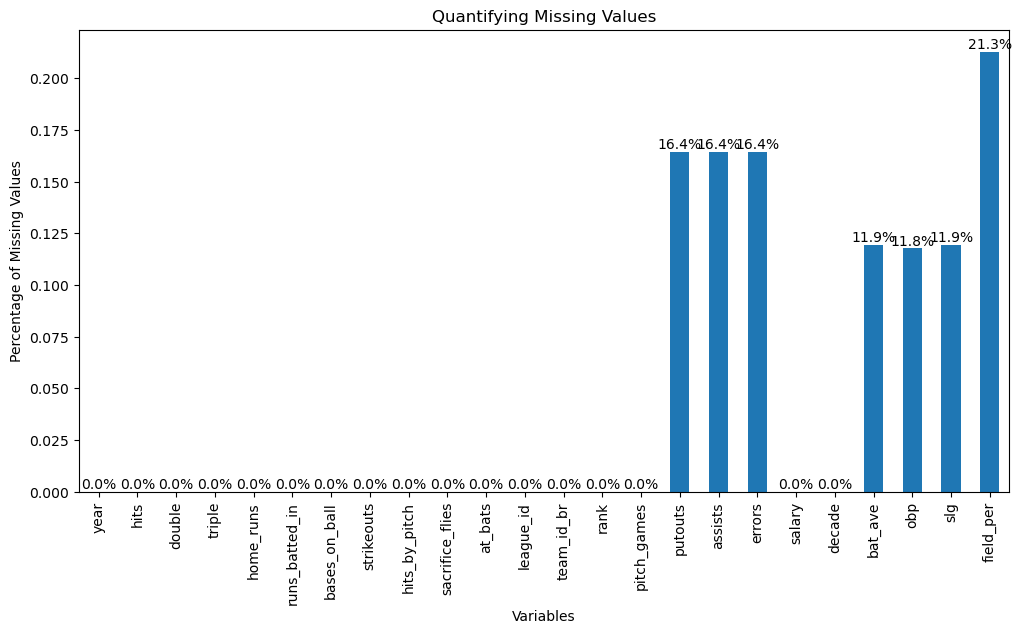

In [668]:
# Current Null
missing_values = merged_df.isnull().mean()
missing_values.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(missing_values):
    plt.annotate(f'{value:.1%}', xy=(i, value), ha='center', va='bottom')

In [669]:
# Imputation Case 1: Dropping all Null values
#merged_df = merged_df.dropna()

In [670]:
merged_df.head()

year  hits  double  triple  home_runs  runs_batted_in  bases_on_ball  \
121239  1985   0.0     0.0     0.0        0.0             0.0            0.0   
121240  1985  46.0     7.0     3.0        6.0            21.0           22.0   
121241  1985  46.0     7.0     3.0        6.0            21.0           22.0   
121242  1985  46.0     7.0     3.0        6.0            21.0           22.0   
121247  1985   0.0     0.0     0.0        0.0             0.0            0.0   

        strikeouts  hits_by_pitch  sacrifice_flies  ...  pitch_games putouts  \
121239         0.0            0.0              0.0  ...         54.0    10.0   
121240        26.0            6.0              3.0  ...         17.0    27.0   
121241        26.0            6.0              3.0  ...          7.0     4.0   
121242        26.0            6.0              3.0  ...         60.0    61.0   
121247         2.0            0.0              0.0  ...         23.0     2.0   

       assists  errors    salary  decade   bat_ave       obp       slg  \
121239    15.0     1.0  147500.0    1980       NaN       NaN       NaN   
121240    25.0     1.0  237000.0    1980  0.278788  0.377551  0.563636   
121241    16.0     0.0  237000.0    1980  0.278788  0.377551  0.563636   
121242   117.0     8.0  237000.0    1980  0.278788  0.377551  0.563636   
121247     5.0     0.0  750000.0    1980  0.000000  0.000000  0.000000   

        field_per  
121239   0.961538  
121240   0.981132  
121241   1.000000  
121242   0.956989  
121247   1.000000  

[5 rows x 24 columns]

In [671]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    merged_df.drop('salary', axis=1), merged_df['salary'], test_size=0.3, random_state=0)

In [672]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [673]:
X_train['league_id'].head()

169962    NL
191414    AL
155092    NL
143057    NL
178655    AL
Name: league_id, dtype: object

In [674]:
# For baseline model:
base_model_df = merged_df.copy().dropna()

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    base_model_df.drop('salary', axis=1), base_model_df['salary'], test_size=0.3, random_state=0)

league_to_index = {league: i for i, league in enumerate(merged_df['league_id'].unique())}
print(league_to_index)
X_train_base['league_id'] = X_train_base['league_id'].map(league_to_index)
X_test_base['league_id'] = X_test_base['league_id'].map(league_to_index)

team_to_index = {team: i for i, team in enumerate(merged_df['team_id_br'].unique())}
print(team_to_index)
X_train_base['team_id_br'] = X_train_base['team_id_br'].map(team_to_index)
X_test_base['team_id_br'] = X_test_base['team_id_br'].map(team_to_index)

{'AL': 0, 'NL': 1}
{'CHW': 0, 'PHI': 1, 'STL': 2, 'PIT': 3, 'BOS': 4, 'HOU': 5, 'CLE': 6, 'NYM': 7, 'LAD': 8, 'OAK': 9, 'KCR': 10, 'TEX': 11, 'TOR': 12, 'ATL': 13, 'NYY': 14, 'CIN': 15, 'CAL': 16, 'DET': 17, 'SDP': 18, 'SFG': 19, 'BAL': 20, 'SEA': 21, 'CHC': 22, 'MON': 23, 'MIN': 24, 'MIL': 25, 'COL': 26, 'FLA': 27, 'ANA': 28, 'ARI': 29, 'TBD': 30, 'LAA': 31, 'WSN': 32, 'TBR': 33, 'MIA': 34}


In [675]:
X_train_base['league_id'].head(20)

197699    1
128052    1
162600    0
158080    1
154609    0
155559    1
141424    1
136608    1
191541    1
175297    1
149292    0
165945    1
155348    0
121726    1
202146    0
130649    1
167260    0
159277    1
140711    1
121570    0
Name: league_id, dtype: int64

<a id = "missingvalue"></a>
#### **3.1 Missing Value Imputation**

In [676]:
# column: putouts
imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, variables=['putouts'])
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [677]:
# median_imputer = MeanMedianImputer(imputation_method='median',
#                                    variables=['putouts'])
# median_imputer.fit(X_train)
# X_train = median_imputer.transform(X_train)
# X_test = median_imputer.transform(X_test)

#imputer = MeanMedianImputer(imputation_method='mean', variables=['putouts'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = RandomSampleImputer(variables=['putouts'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = ArbitraryNumberImputer(arbitrary_number=999, variables=['putouts'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

In [678]:
# column: assists

median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['assists'])
median_imputer.fit(X_train)
X_train = median_imputer.transform(X_train)
X_test = median_imputer.transform(X_test)

In [679]:
#imputer = MeanMedianImputer(imputation_method='mean', variables=['assists'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = ArbitraryNumberImputer(arbitrary_number=285, variables=['assists'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, variables=['assists'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = RandomSampleImputer(variables=['assists'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

In [680]:
# errors

median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['errors'])
median_imputer.fit(X_train)
X_train = median_imputer.transform(X_train)
X_test = median_imputer.transform(X_test)

In [681]:
#imputer = MeanMedianImputer(imputation_method='mean', variables=['errors'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = ArbitraryNumberImputer(arbitrary_number=20, variables=['errors'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, variables=['errors'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = RandomSampleImputer(variables=['errors'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

In [682]:
# column: bat_ave
imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=['bat_ave'])
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [683]:
# median_imputer = MeanMedianImputer(imputation_method='median',
#                                    variables=['bat_ave'])
# median_imputer.fit(X_train)
# X_train = median_imputer.transform(X_train)
# X_test = median_imputer.transform(X_test)

#imputer = MeanMedianImputer(imputation_method='mean', variables=['bat_ave'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#arbitrary number: 1
#imputer = ArbitraryNumberImputer(arbitrary_number=1, variables=['bat_ave'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, variables=['bat_ave'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = RandomSampleImputer(variables=['bat_ave'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

In [684]:
# column: obp
imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, variables=['obp'])
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [685]:
# median_imputer = MeanMedianImputer(imputation_method='median',
#                                    variables=['obp'])
# median_imputer.fit(X_train)
# X_train = median_imputer.transform(X_train)
# X_test = median_imputer.transform(X_test)

#imputer = MeanMedianImputer(imputation_method='mean', variables=['obp'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = ArbitraryNumberImputer(arbitrary_number=1, variables=['obp'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = RandomSampleImputer(variables=['obp'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

In [686]:
# column: slg
imputer = MeanMedianImputer(imputation_method='mean', variables=['slg'])
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [687]:
# median_imputer = MeanMedianImputer(imputation_method='median',
#                                    variables=['slg'])
# median_imputer.fit(X_train)
# X_train = median_imputer.transform(X_train)
# X_test = median_imputer.transform(X_test)

#imputer = ArbitraryNumberImputer(arbitrary_number=3, variables=['slg'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, variables=['slg'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = RandomSampleImputer(variables=['slg'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

In [688]:
# column: field_per
imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, variables=['field_per'])
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [689]:
# median_imputer = MeanMedianImputer(imputation_method='median',
#                                    variables=['field_per'])
# median_imputer.fit(X_train)
# X_train = median_imputer.transform(X_train)
# X_test = median_imputer.transform(X_test)

#imputer = MeanMedianImputer(imputation_method='mean', variables=['field_per'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=['field_per'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

#imputer = RandomSampleImputer(variables=['field_per'])
#imputer.fit(X_train)
#X_train = imputer.transform(X_train)
#X_test = imputer.transform(X_test)

In [690]:
# copy data
X_train_impute = X_train.copy()
X_test_impute = X_test.copy()

<a id = "datatransformation"></a>
#### **3.2 Data Transformation**

In [691]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


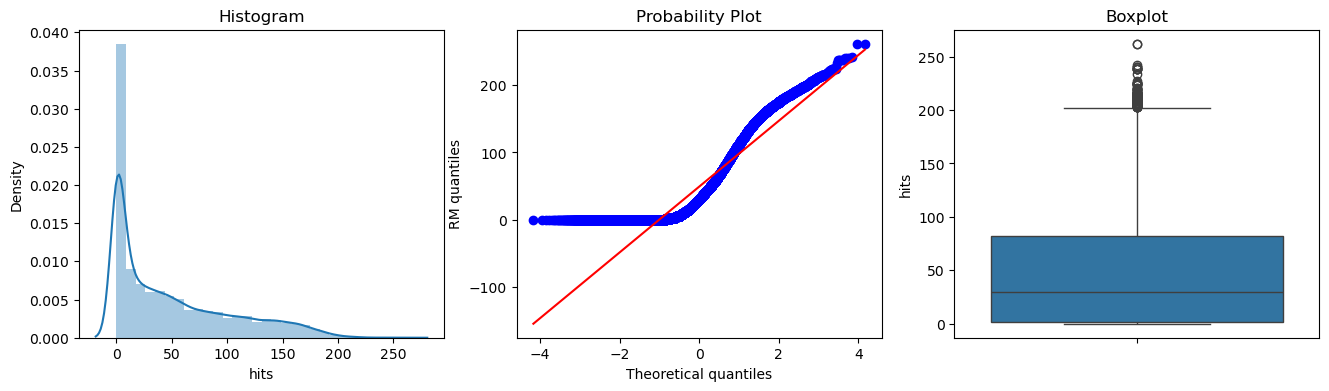

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


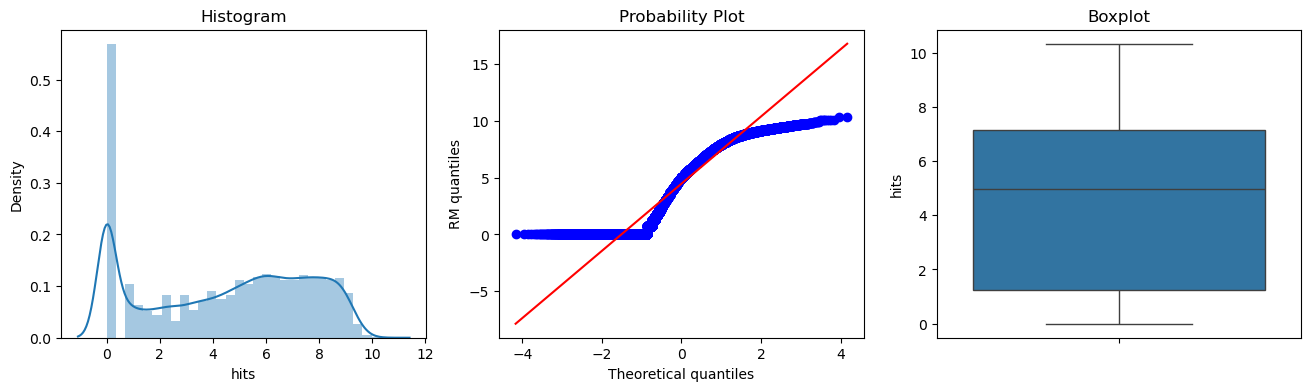

In [692]:
# column: hits
diagnostic_plots(X_train, 'hits')
yjt = YeoJohnsonTransformer(variables=['hits'])
yjt.fit(X_train)
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)
diagnostic_plots(X_train, 'hits')

In [693]:
# et = PowerTransformer(variables=['hits'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['hits'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


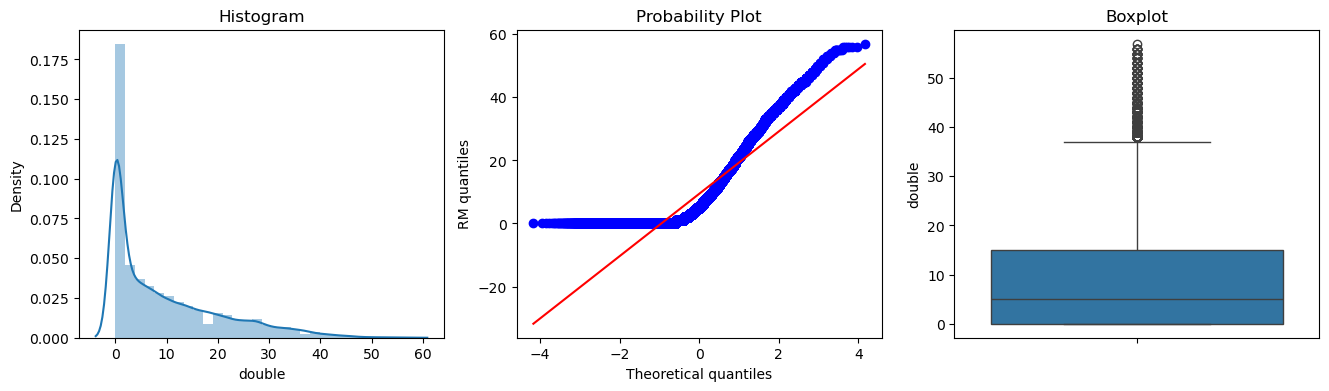

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


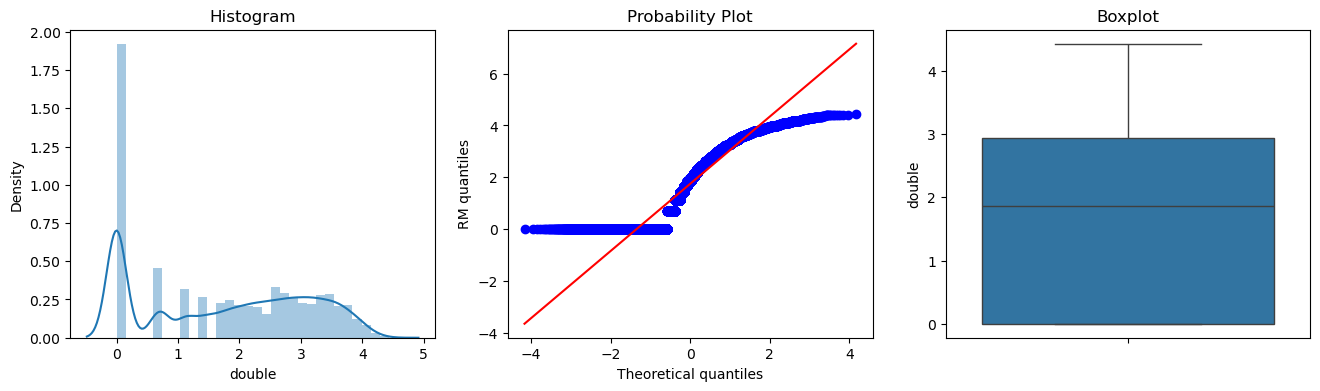

In [694]:
# column: double
diagnostic_plots(X_train, 'double')
yjt = YeoJohnsonTransformer(variables=['double'])
yjt.fit(X_train)
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)
diagnostic_plots(X_train, 'double')

In [695]:
# et = PowerTransformer(variables=['double'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train3 = et.transform(X_train)
# X_test3 = et.transform(X_test)

# et = PowerTransformer(variables=['double'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


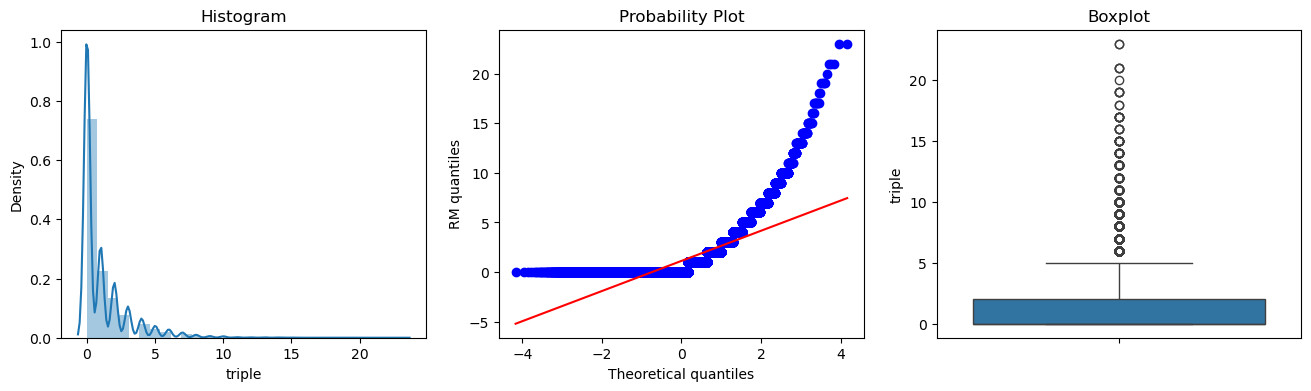

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


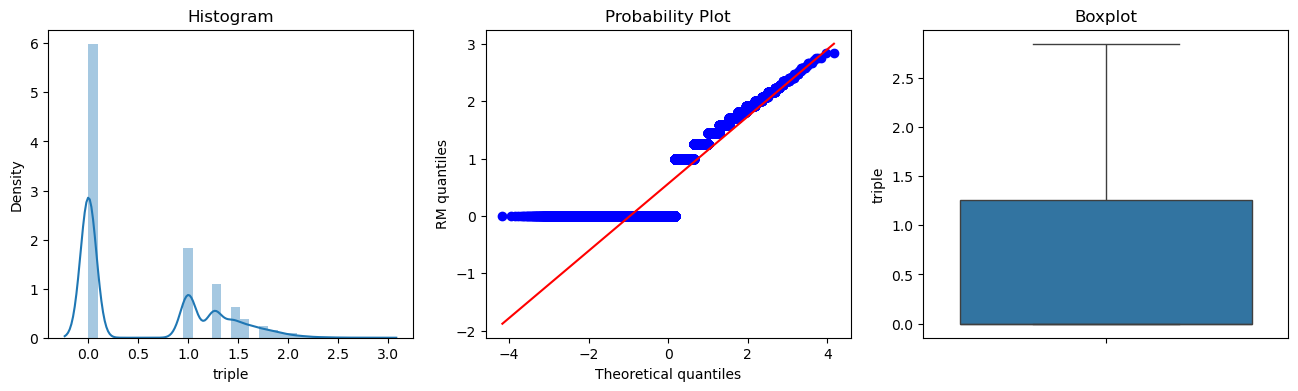

In [696]:
# column: triple
diagnostic_plots(X_train, 'triple')
et = PowerTransformer(variables=['triple'], exp=1/3) # for cube root 
et.fit(X_train)
X_train = et.transform(X_train)
X_test = et.transform(X_test)
diagnostic_plots(X_train, 'triple')

In [697]:
# et = PowerTransformer(variables=['triple'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['triple'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [698]:
# column: home_runs

# et = PowerTransformer(variables=['home_runs'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['home_runs'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['home_runs'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [699]:
# column: runs_batted_in

# et = PowerTransformer(variables=['runs_batted_in'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['runs_batted_in'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['runs_batted_in'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [700]:
# column: bases_on_ball
# et = PowerTransformer(variables=['bases_on_ball'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['bases_on_ball'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['bases_on_ball'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


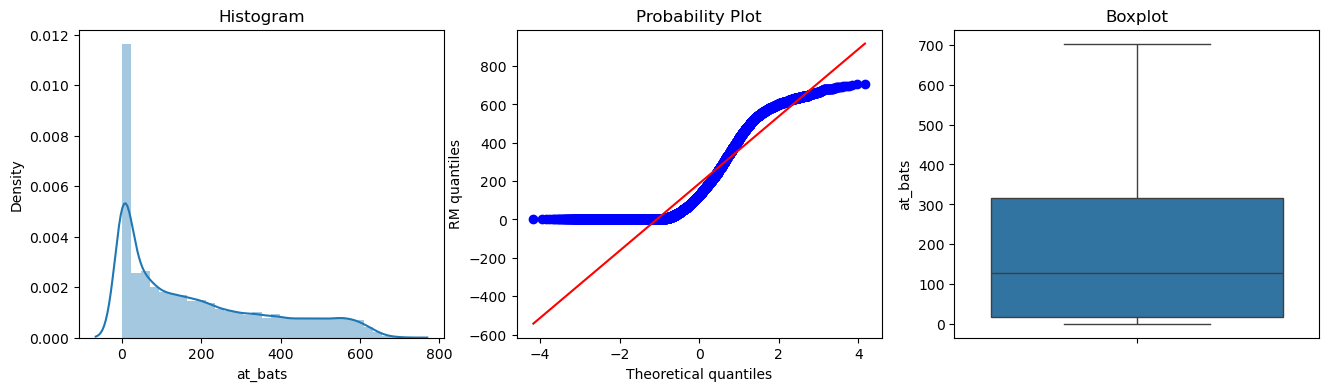

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


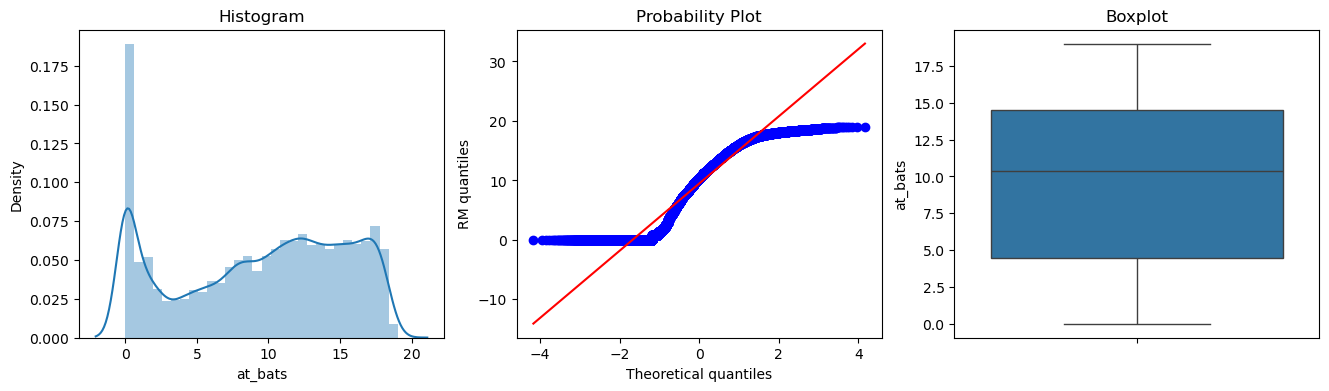

In [701]:
# column: at_bats
diagnostic_plots(X_train, 'at_bats')
yjt = YeoJohnsonTransformer(variables=['at_bats'])
yjt.fit(X_train)
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)
diagnostic_plots(X_train, 'at_bats')

In [702]:
# et = PowerTransformer(variables=['at_bats'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['at_bats'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


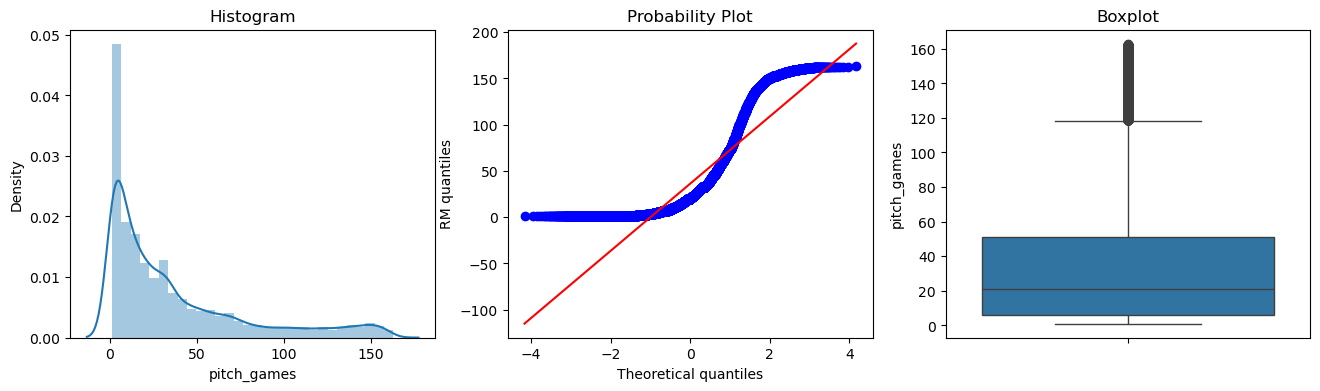

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


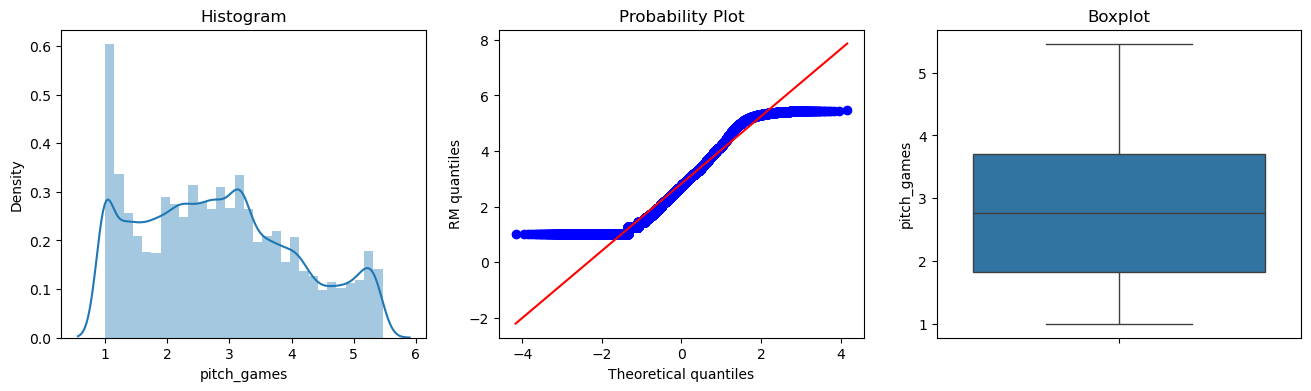

In [703]:
# column: pitch_games
diagnostic_plots(X_train, 'pitch_games')
et = PowerTransformer(variables=['pitch_games'], exp=1/3) # for cube root
et.fit(X_train)
X_train = et.transform(X_train)
X_test = et.transform(X_test)
diagnostic_plots(X_train, 'pitch_games')

In [704]:
# lt = LogTransformer(variables=['pitch_games'])
# lt.fit(X_train)
# X_train = lt.transform(X_train)
# X_test = lt.transform(X_test)

# rt = ReciprocalTransformer(variables=['pitch_games'])
# rt.fit(X_train)
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

# et = PowerTransformer(variables=['pitch_games'], exp=0.3) 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# bct = BoxCoxTransformer(variables=['pitch_games'])
# bct.fit(X_train)
# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['pitch_games'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


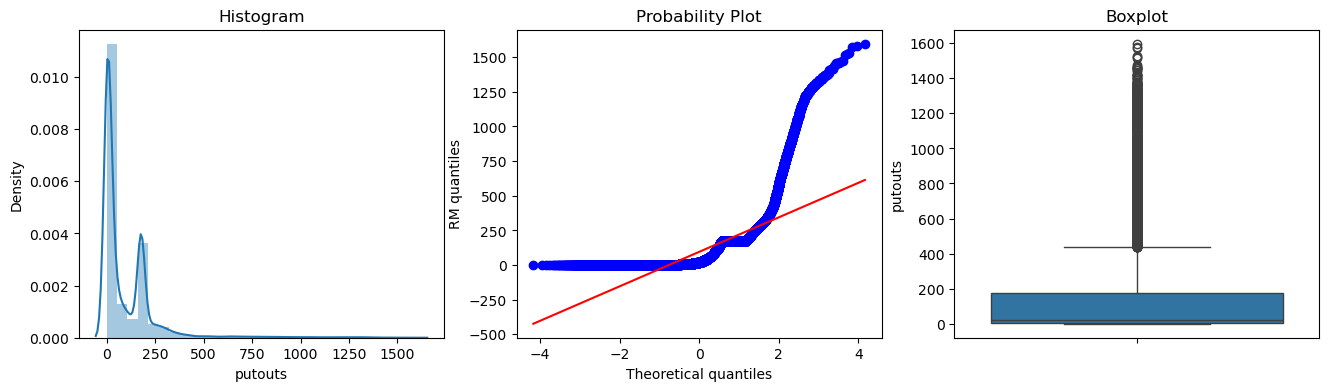

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


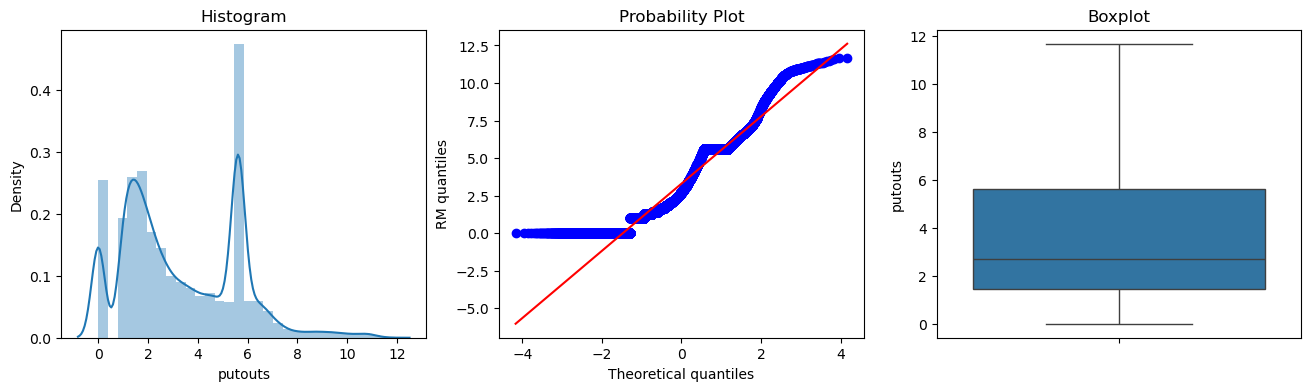

In [705]:
# column: putouts
diagnostic_plots(X_train, 'putouts')
et = PowerTransformer(variables=['putouts'], exp=1/3) # for cube root
et.fit(X_train)
X_train = et.transform(X_train)
X_test = et.transform(X_test)
diagnostic_plots(X_train, 'putouts')

In [706]:
# et = PowerTransformer(variables=['putouts'], exp=0.3) 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['putouts'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


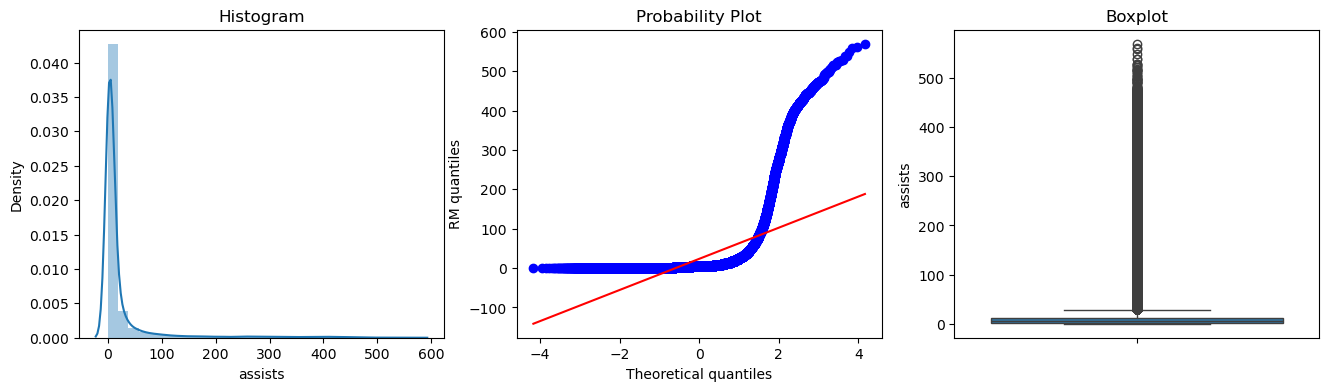

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


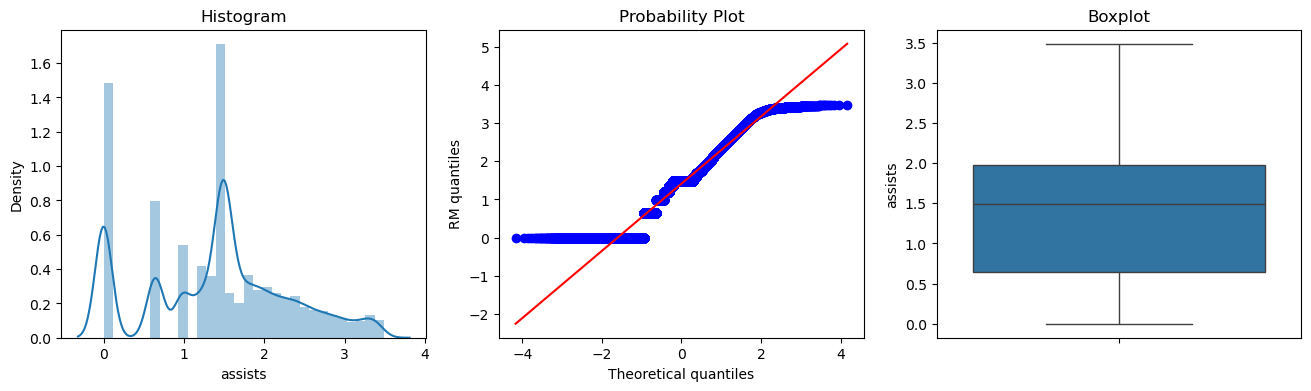

In [707]:
# column: assists
diagnostic_plots(X_train, 'assists')
yjt = YeoJohnsonTransformer(variables=['assists'])
yjt.fit(X_train)
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)
diagnostic_plots(X_train, 'assists')

In [708]:
# et = PowerTransformer(variables=['assists'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['assists'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

In [709]:
# column: errors
# et = PowerTransformer(variables=['errors'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['errors'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['errors'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


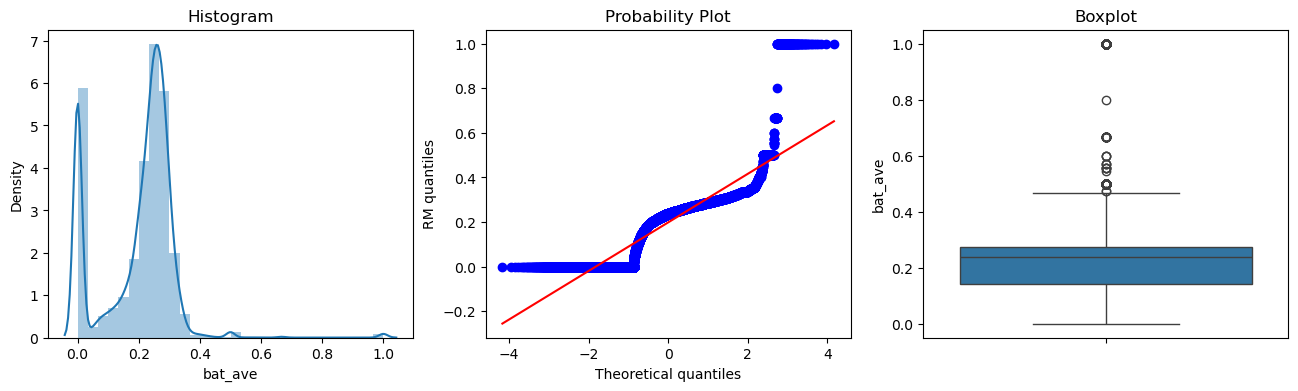

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


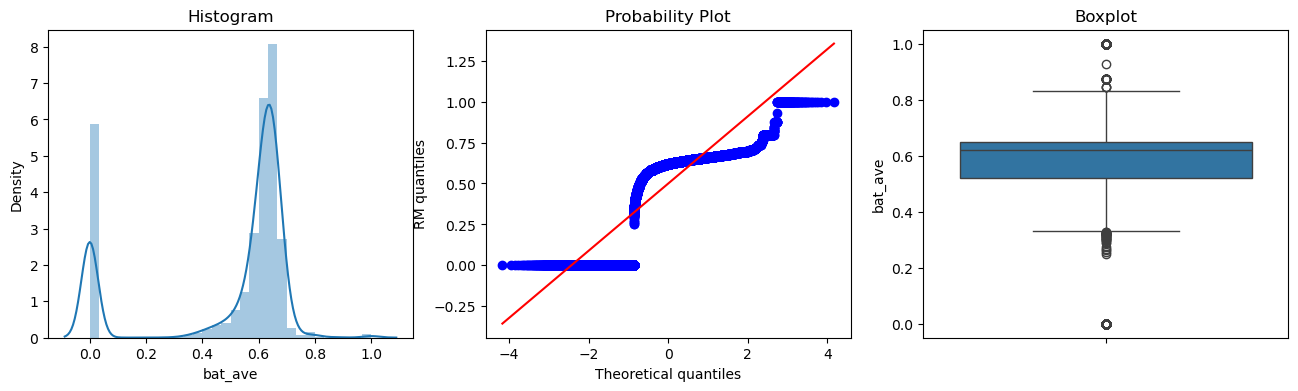

In [710]:
# column: bat_ave
diagnostic_plots(X_train, 'bat_ave')
et = PowerTransformer(variables=['bat_ave'], exp=1/3) # for cube root 
et.fit(X_train)
X_train = et.transform(X_train)
X_test = et.transform(X_test)
diagnostic_plots(X_train, 'bat_ave')

In [711]:
# et = PowerTransformer(variables=['bat_ave'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['bat_ave'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [712]:
# column: obp
# et = PowerTransformer(variables=['obp'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['obp'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['obp'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [713]:
# column: slg
# et = PowerTransformer(variables=['obp'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['obp'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# yjt = YeoJohnsonTransformer(variables=['obp'])
# yjt.fit(X_train)
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


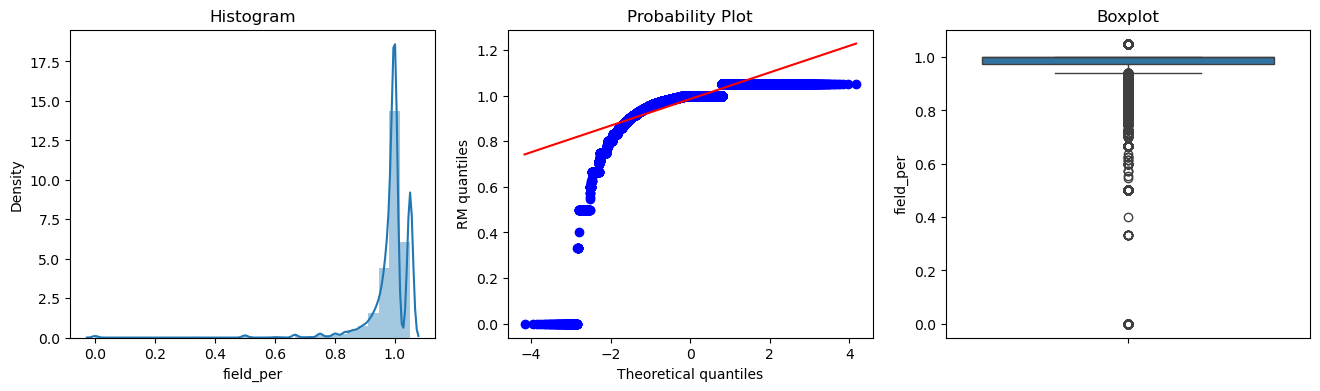

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


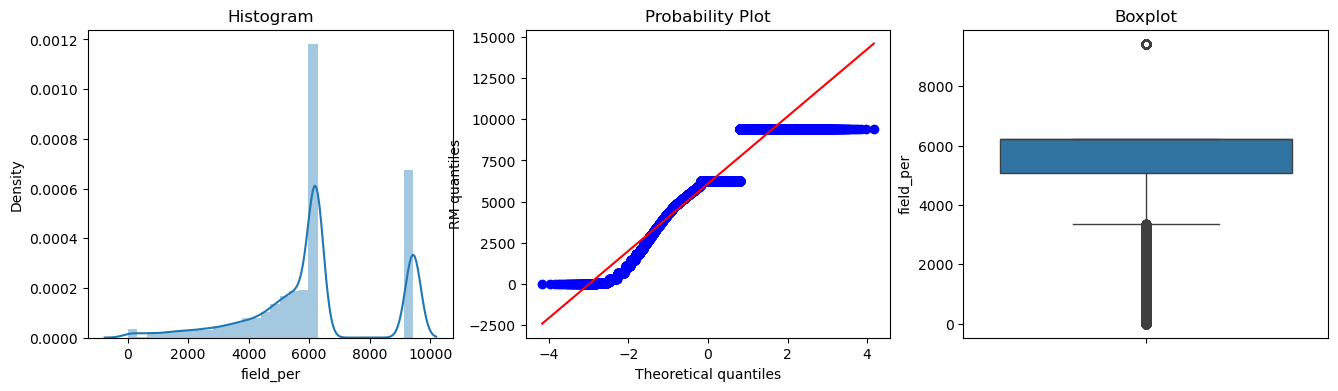

In [714]:
# column: field_per
diagnostic_plots(X_train, 'field_per')
yjt = YeoJohnsonTransformer(variables=['field_per'])
yjt.fit(X_train)
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)
diagnostic_plots(X_train, 'field_per')

In [715]:
# et = PowerTransformer(variables=['field_per'], exp=1/3) # for cube root 
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# et = PowerTransformer(variables=['field_per'], exp=0.3)
# et.fit(X_train)
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

In [716]:
# copy data
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

<a id="outlierhandling"></a>
#### **3.3 Outlier Handling**

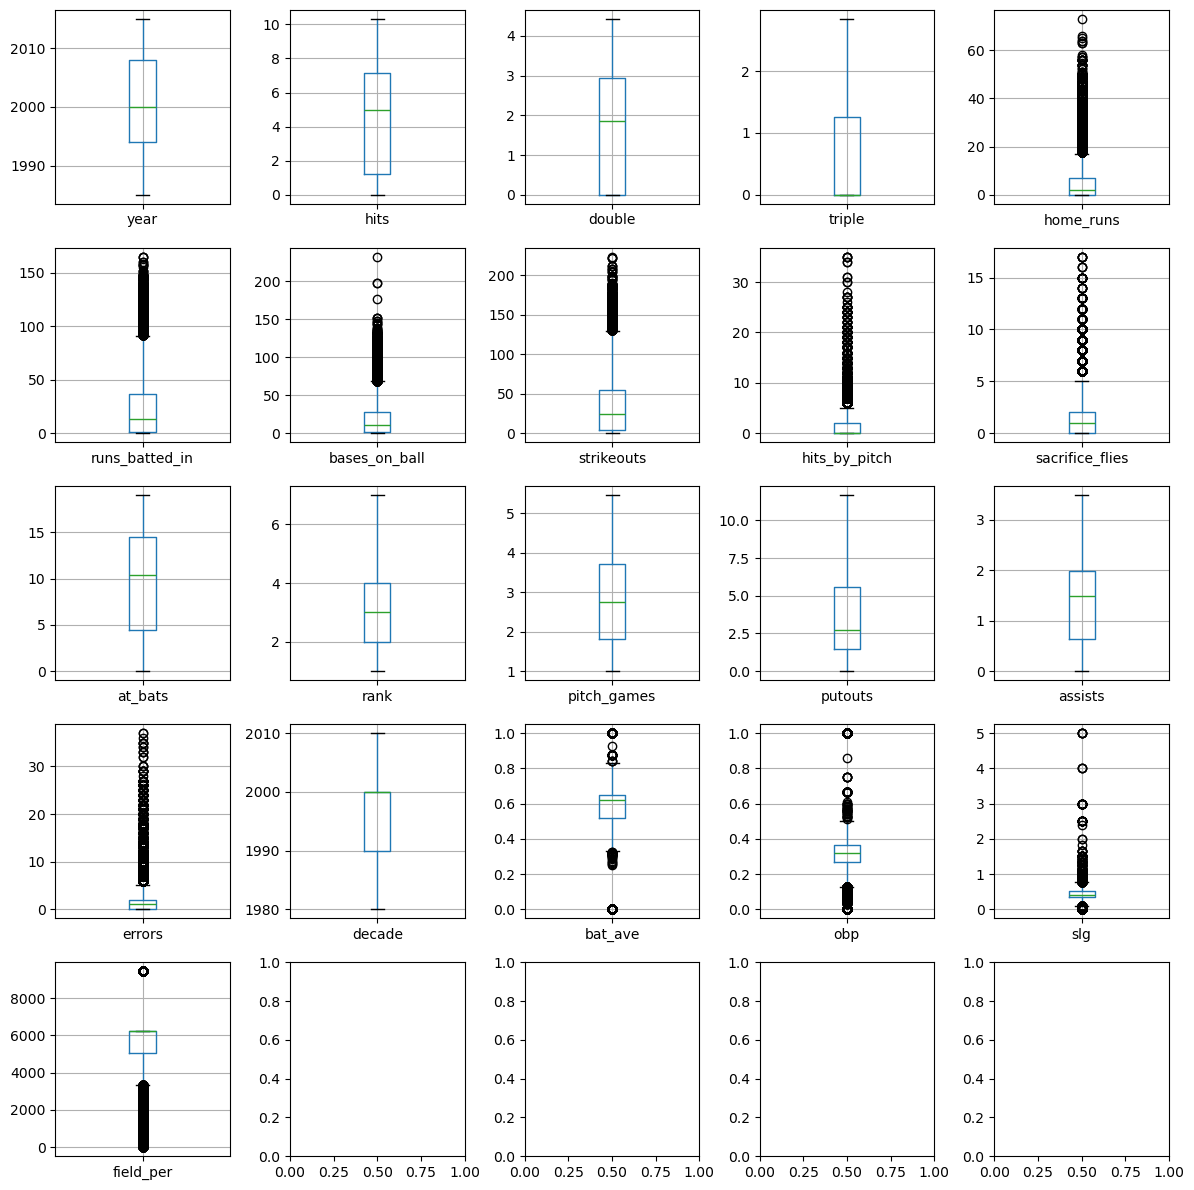

In [717]:
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.flatten()
numeric_train = [num for num in X_train.columns if X_train[num].dtypes!='O']

for i, col in enumerate(numeric_train):
    X_train.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

In [718]:
# column: home_runs
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['home_runs'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['home_runs'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['home_runs'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='right', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['home_runs'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsoriser = ArbitraryOutlierCapper(max_capping_dict={'home_runs':7}, min_capping_dict={'home_runs':0.})
# windsoriser.fit(X_train)
# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

In [719]:
# column: runs_batted_in
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['runs_batted_in'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['runs_batted_in'])
# windsorizer.fit(X_train)
# X_train5 = windsorizer.transform(X_train)
# X_test5 = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['runs_batted_in'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='right', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['runs_batted_in'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsoriser = ArbitraryOutlierCapper(max_capping_dict={'runs_batted_in':40}, min_capping_dict={'runs_batted_in':0})
# windsoriser.fit(X_train)
# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

In [720]:
# column: bases_on_ball
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['bases_on_ball'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['bases_on_ball'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['bases_on_ball'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='right', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['bases_on_ball'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsoriser = ArbitraryOutlierCapper(max_capping_dict={'bases_on_ball':30}, min_capping_dict={'bases_on_ball':0})
# windsoriser.fit(X_train)
# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

In [721]:
# column: strikeouts
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['strikeouts'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['strikeouts'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['strikeouts'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='right', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['strikeouts'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsoriser = ArbitraryOutlierCapper(max_capping_dict={'strikeouts':50}, min_capping_dict={'strikeouts':0})
# windsoriser.fit(X_train)
# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

In [722]:
# column: hits_by_pitch
windsorizer = Winsorizer(capping_method ='gaussian', 
                        tail='right', # cap left, right or both tails
                        fold =0.05,
                        variables=['hits_by_pitch'])
windsorizer.fit(X_train)
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)

In [723]:
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['hits_by_pitch'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['hits_by_pitch'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='right', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['hits_by_pitch'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsoriser = ArbitraryOutlierCapper(max_capping_dict={'hits_by_pitch':3}, min_capping_dict={'hits_by_pitch':0})
# windsoriser.fit(X_train)
# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

In [724]:
# column: sacrifice_flies
windsorizer = Winsorizer(capping_method ='mad', 
                        tail='right', # cap left, right or both tails
                        fold =0.05,
                        variables=['sacrifice_flies'])
windsorizer.fit(X_train)
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)

In [725]:
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['sacrifice_flies'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['sacrifice_flies'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='right', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['sacrifice_flies'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsoriser = ArbitraryOutlierCapper(max_capping_dict={'sacrifice_flies':2}, min_capping_dict={'sacrifice_flies':0})
# windsoriser.fit(X_train)
# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

In [726]:
# column: bat_ave
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['bat_ave'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['bat_ave'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['bat_ave'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='both', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['bat_ave'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsoriser = ArbitraryOutlierCapper(max_capping_dict={'obat_avebp':0.65}, min_capping_dict={'bat_ave':0.5})
# windsoriser.fit(X_train)
# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

In [727]:
# column: obp
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['obp'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['obp'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['obp'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='both', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['obp'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsoriser = ArbitraryOutlierCapper(max_capping_dict={'obp':0.35}, min_capping_dict={'obp':0.25})
# windsoriser.fit(X_train)
# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

In [728]:
# column: slg
windsoriser = ArbitraryOutlierCapper(max_capping_dict={'slg':0.6}, min_capping_dict={'slg':0.4})
windsoriser.fit(X_train)
X_train = windsoriser.transform(X_train)
X_test = windsoriser.transform(X_test)

In [729]:
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['slg'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                          tail='both', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['slg'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['slg'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='both', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['slg'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

In [730]:
# column: field_per
windsoriser = ArbitraryOutlierCapper(max_capping_dict={'field_per':6100}, min_capping_dict={'field_per':5000})
windsoriser.fit(X_train)
X_train = windsoriser.transform(X_train)
X_test = windsoriser.transform(X_test)

In [731]:
# windsorizer = Winsorizer(capping_method ='quantiles', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['field_per'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='gaussian', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['field_per'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='iqr', 
#                         tail='both', # cap left, right or both tails
#                         fold =0.05,
#                         variables=['field_per'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

# windsorizer = Winsorizer(capping_method ='mad', 
#                          tail='both', # cap left, right or both tails
#                          fold =0.05,
#                          variables=['field_per'])
# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

In [732]:
# copy data
X_train_outlier = X_train.copy()
X_test_outlier = X_test.copy()

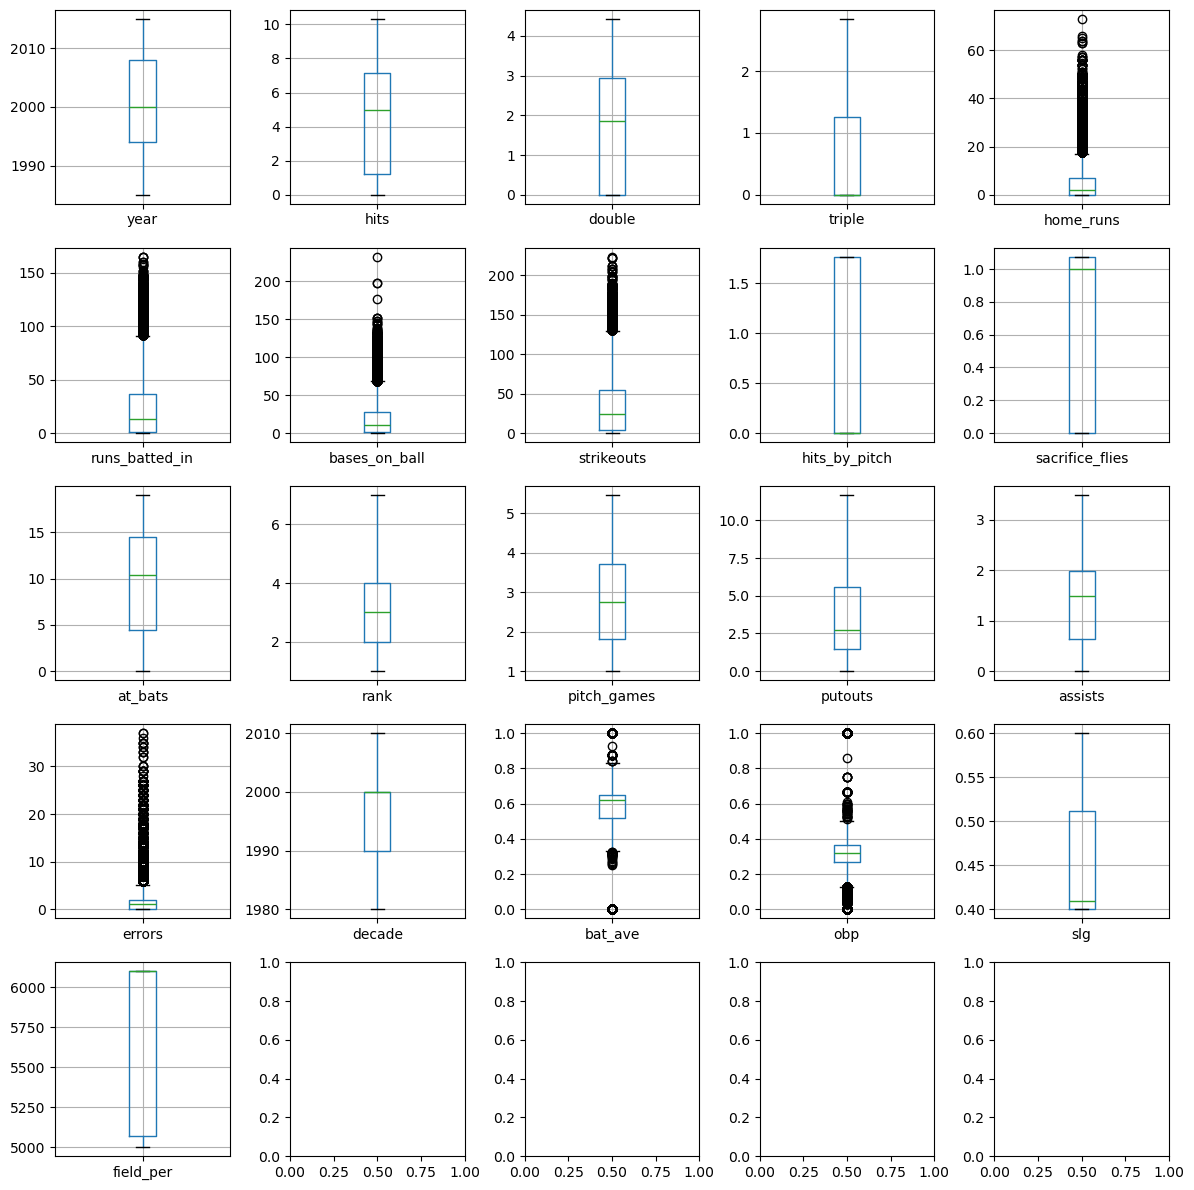

In [733]:
fig, ax = plt.subplots(5, 5, figsize=(12, 12)) # Default 5, 5
ax = ax.flatten()

for i, col in enumerate(numeric_train):
    X_train.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

<a id="discretization"></a>
#### **3.4 Discretization**

In [734]:
# EqualWidthDiscretiser / EqualFrequencyDiscretiser Chart
def discretiser_chart(columns):
    t1 = X_train.groupby([columns])[columns].count() / len(X_train)
    t2 = X_test.groupby([columns])[columns].count() / len(X_test)

    # concatenate aggregated views
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']

    # plot
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')
    plt.show()

def discretiser_chart_3rd(columns):
    pd.concat([X_train, y_train], axis=1).groupby(columns)['salary'].mean().plot()
    plt.ylabel('mean of salary')

In [735]:
# column: hits
disc = EqualWidthDiscretiser(bins=10, variables=['hits'])
disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [736]:
# disc = EqualFrequencyDiscretiser(q=10, variables=['hits'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [737]:
# column: double
# disc = EqualWidthDiscretiser(bins=10, variables=['double'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['double'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [738]:
# column: triple
disc = EqualWidthDiscretiser(bins=10, variables=['triple'])
disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [739]:
# disc = EqualFrequencyDiscretiser(q=10, variables=['triple'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [740]:
# column: home_runs
disc = EqualWidthDiscretiser(bins=10, variables=['home_runs'])
disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [741]:
# disc = EqualFrequencyDiscretiser(q=10, variables=['home_runs'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [742]:
# column: runs_batted_in
disc = EqualWidthDiscretiser(bins=10, variables=['runs_batted_in'])
disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [743]:
# disc = EqualFrequencyDiscretiser(q=10, variables=['runs_batted_in'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [744]:
# column: bases_on_ball
# disc = EqualWidthDiscretiser(bins=10, variables=['bases_on_ball'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['bases_on_ball'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [745]:
# column: strikeouts
# disc = EqualWidthDiscretiser(bins=10, variables=['strikeouts'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['strikeouts'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [746]:
# column: hits_by_pitch
# disc = EqualWidthDiscretiser(bins=10, variables=['hits_by_pitch'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['hits_by_pitch'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [747]:
# column: sacrifice_flies
disc = EqualWidthDiscretiser(bins=10, variables=['sacrifice_flies'])
disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [748]:
# disc = EqualFrequencyDiscretiser(q=10, variables=['sacrifice_flies'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [749]:
# column: at_bats
# disc = EqualWidthDiscretiser(bins=10, variables=['at_bats'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['at_bats'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [750]:
# column: pitch_games
# disc = EqualWidthDiscretiser(bins=10, variables=['pitch_games'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['pitch_games'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [751]:
# column: putouts
# disc = EqualWidthDiscretiser(bins=10, variables=['putouts'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['putouts'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [752]:
# column: assists
disc = EqualWidthDiscretiser(bins=10, variables=['assists'])
disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [753]:
# disc = EqualFrequencyDiscretiser(q=10, variables=['assists'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [754]:
# column: errors
# disc = EqualWidthDiscretiser(bins=10, variables=['errors'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['errors'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [755]:
# column: bat_ave
disc = EqualFrequencyDiscretiser(q=10, variables=['bat_ave'])
disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [756]:
# disc = EqualWidthDiscretiser(bins=10, variables=['bat_ave'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [757]:
# column: obp
disc = EqualFrequencyDiscretiser(q=10, variables=['obp'])
disc.fit(X_train)
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [758]:
# disc = EqualWidthDiscretiser(bins=10, variables=['obp'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [759]:
# column: slg
# disc = EqualWidthDiscretiser(bins=10, variables=['slg'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['slg'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [760]:
# column: field_per
# disc = EqualWidthDiscretiser(bins=10, variables=['field_per'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

# disc = EqualFrequencyDiscretiser(q=10, variables=['field_per'])
# disc.fit(X_train)
# X_train = disc.transform(X_train)
# X_test = disc.transform(X_test)

In [761]:
# copy data
X_train_discretise = X_train.copy()
X_test_discretise = X_test.copy()

<a id = "categoricalencoding"></a>
#### **3.5 Categorical Encoding**

In [762]:
col = ['league_id', 'team_id_br']

In [763]:
X_train['league_id'].head(20)

169962    NL
191414    AL
155092    NL
143057    NL
178655    AL
147737    AL
156112    AL
159134    AL
172402    AL
187794    NL
204095    NL
160461    NL
206185    AL
148908    AL
142522    NL
146378    AL
210589    AL
175775    AL
169271    AL
129872    AL
Name: league_id, dtype: object

In [764]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=['league_id'])
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [765]:
# column: league_id
# encoder = OneHotEncoder(top_categories=None, drop_last=True, variables=['league_id'])
# encoder.fit(X_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

# encoder = CountFrequencyEncoder(encoding_method='frequency', variables=['league_id'])
# encoder.fit(X_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

# encoder = OrdinalEncoder(encoding_method='ordered', variables=['league_id'])
# encoder.fit(X_train, y_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

# encoder = MeanEncoder(variables=['league_id'])
# encoder.fit(X_train, y_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

In [766]:
X_train.shape

(44876, 23)

In [767]:
encoder = OneHotEncoder(top_categories=None, drop_last=True, variables=['team_id_br'])
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [768]:
# column: team_id_br
# encoder = OrdinalEncoder(encoding_method='arbitrary', variables=['team_id_br'])
# encoder.fit(X_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

# encoder = CountFrequencyEncoder(encoding_method='frequency', variables=['team_id_br'])
# encoder.fit(X_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

# encoder = OrdinalEncoder(encoding_method='ordered', variables=['team_id_br'])
# encoder.fit(X_train, y_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

# encoder = MeanEncoder(variables=['team_id_br'])
# encoder.fit(X_train, y_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

In [769]:
X_train.shape

(44876, 56)

In [770]:
X_train.head(10)

year  hits    double  triple  home_runs  runs_batted_in  \
169962  2002     6  2.418347       4          0               1   
191414  2009     3  1.861346       0          0               0   
155092  1997     6  2.709136       5          1               2   
143057  1993     3  1.124516       3          0               0   
178655  2005     4  1.861346       3          0               0   
147737  1995     7  3.302032       4          1               3   
156112  1998     4  2.173553       3          0               0   
159134  1998     7  3.249072       0          2               3   
172402  2003     0  0.000000       0          0               0   
187794  2008     0  0.000000       3          0               0   

        bases_on_ball  strikeouts  hits_by_pitch  sacrifice_flies  ...  \
169962           12.0        24.0       1.766128                9  ...   
191414           11.0         8.0       1.766128                9  ...   
155092           26.0        51.0       1.766128                9  ...   
143057            2.0        16.0       1.000000                9  ...   
178655           12.0        21.0       0.000000                9  ...   
147737           55.0        66.0       1.000000                9  ...   
156112           10.0        34.0       1.000000                9  ...   
159134           24.0        73.0       1.766128                9  ...   
172402            0.0         0.0       0.000000                0  ...   
187794            1.0         6.0       0.000000                0  ...   

        team_id_br_ARI  team_id_br_BOS  team_id_br_WSN  team_id_br_CAL  \
169962               0               0               0               0   
191414               0               0               0               0   
155092               0               0               0               0   
143057               0               0               0               0   
178655               0               0               0               0   
147737               0               0               0               0   
156112               0               0               0               0   
159134               0               0               0               0   
172402               0               0               0               0   
187794               0               0               0               0   

        team_id_br_MIN  team_id_br_COL  team_id_br_TBD  team_id_br_CHC  \
169962               0               0               0               0   
191414               0               0               0               0   
155092               0               0               0               0   
143057               0               0               0               0   
178655               0               0               0               0   
147737               0               0               0               0   
156112               0               0               0               0   
159134               0               0               0               0   
172402               0               0               0               0   
187794               0               0               0               0   

        team_id_br_LAA  team_id_br_TBR  
169962               0               0  
191414               0               0  
155092               0               0  
143057               0               0  
178655               0               0  
147737               0               0  
156112               0               0  
159134               0               0  
172402               0               0  
187794               0               0  

[10 rows x 56 columns]

In [771]:
# copy data
X_train_encode = X_train.copy()
X_test_encode = X_test.copy()

In [772]:
X_train_encode

year  hits    double  triple  home_runs  runs_batted_in  \
169962  2002     6  2.418347       4          0               1   
191414  2009     3  1.861346       0          0               0   
155092  1997     6  2.709136       5          1               2   
143057  1993     3  1.124516       3          0               0   
178655  2005     4  1.861346       3          0               0   
...      ...   ...       ...     ...        ...             ...   
184836  2007     0  0.000000       0          0               0   
194397  2010     6  2.620079       0          0               2   
180306  2005     5  2.173553       0          0               1   
181609  2006     7  3.352735       6          0               2   
125726  1986     4  1.665437       0          1               1   

        bases_on_ball  strikeouts  hits_by_pitch  sacrifice_flies  ...  \
169962           12.0        24.0       1.766128                9  ...   
191414           11.0         8.0       1.766128                9  ...   
155092           26.0        51.0       1.766128                9  ...   
143057            2.0        16.0       1.000000                9  ...   
178655           12.0        21.0       0.000000                9  ...   
...               ...         ...            ...              ...  ...   
184836            0.0         3.0       0.000000                0  ...   
194397           33.0        21.0       1.766128                9  ...   
180306           12.0         9.0       1.766128                0  ...   
181609           24.0        44.0       0.000000                9  ...   
125726           27.0        55.0       1.000000                0  ...   

        team_id_br_ARI  team_id_br_BOS  team_id_br_WSN  team_id_br_CAL  \
169962               0               0               0               0   
191414               0               0               0               0   
155092               0               0               0               0   
143057               0               0               0               0   
178655               0               0               0               0   
...                ...             ...             ...             ...   
184836               0               0               0               0   
194397               0               0               0               0   
180306               0               0               0               0   
181609               0               0               0               0   
125726               0               0               0               0   

        team_id_br_MIN  team_id_br_COL  team_id_br_TBD  team_id_br_CHC  \
169962               0               0               0               0   
191414               0               0               0               0   
155092               0               0               0               0   
143057               0               0               0               0   
178655               0               0               0               0   
...                ...             ...             ...             ...   
184836               0               0               0               0   
194397               0               0               0               0   
180306               0               0               0               0   
181609               0               0               0               0   
125726               0               0               0               0   

        team_id_br_LAA  team_id_br_TBR  
169962               0               0  
191414               0               0  
155092               0               0  
143057               0               0  
178655               0               0  
...                ...             ...  
184836               0               0  
194397               0               0  
180306               0               0  
181609               0               0  
125726               0               0  

[44876 rows x 56 columns]

<a id = "scaling"></a>
#### **3.6 Scaling**

In [773]:
def scaling_chart(col1, col2, col3):
    sns.kdeplot(X_train[col1], label =col1)
    sns.kdeplot(X_train[col2], label =col2)
    sns.kdeplot(X_train[col3], label =col3)
    plt.legend()
    plt.show()

In [774]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [775]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# means = X_train.mean(axis=0)
# ranges = X_train.max(axis=0)-X_train.min(axis=0)
# X_train = (X_train - means) / ranges
# X_test = (X_test - means) / ranges

# scaler = MaxAbsScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# scaler_mean = StandardScaler(with_mean=True, with_std=False)
# scaler_maxabs = MaxAbsScaler()
# scaler_mean.fit(X_train)
# scaler_maxabs.fit(X_train)
# X_train = scaler_maxabs.transform(scaler_mean.transform(X_train))
# X_test = scaler_maxabs.transform(scaler_mean.transform(X_test))

# scaler = RobustScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [776]:
# copy data
X_train_scaling = X_train.copy()
X_test_scaling = X_test.copy()

In [777]:
X_train_scaling

array([[0.56666667, 0.66666667, 0.54594442, ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.33333333, 0.42020077, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.66666667, 0.61159032, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.55555556, 0.49068185, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.77777778, 0.75688341, ..., 0.        , 0.        ,
        0.        ],
       [0.03333333, 0.44444444, 0.37597425, ..., 0.        , 0.        ,
        0.        ]])

<a id = "others"></a>
#### **3.7 Others**

In [778]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_train shape: {X_test.shape}")
print(f"y_train shape: {y_test.shape}")

X_train shape: (44876, 56)
y_train shape: (44876,)
X_train shape: (19233, 56)
y_train shape: (19233,)


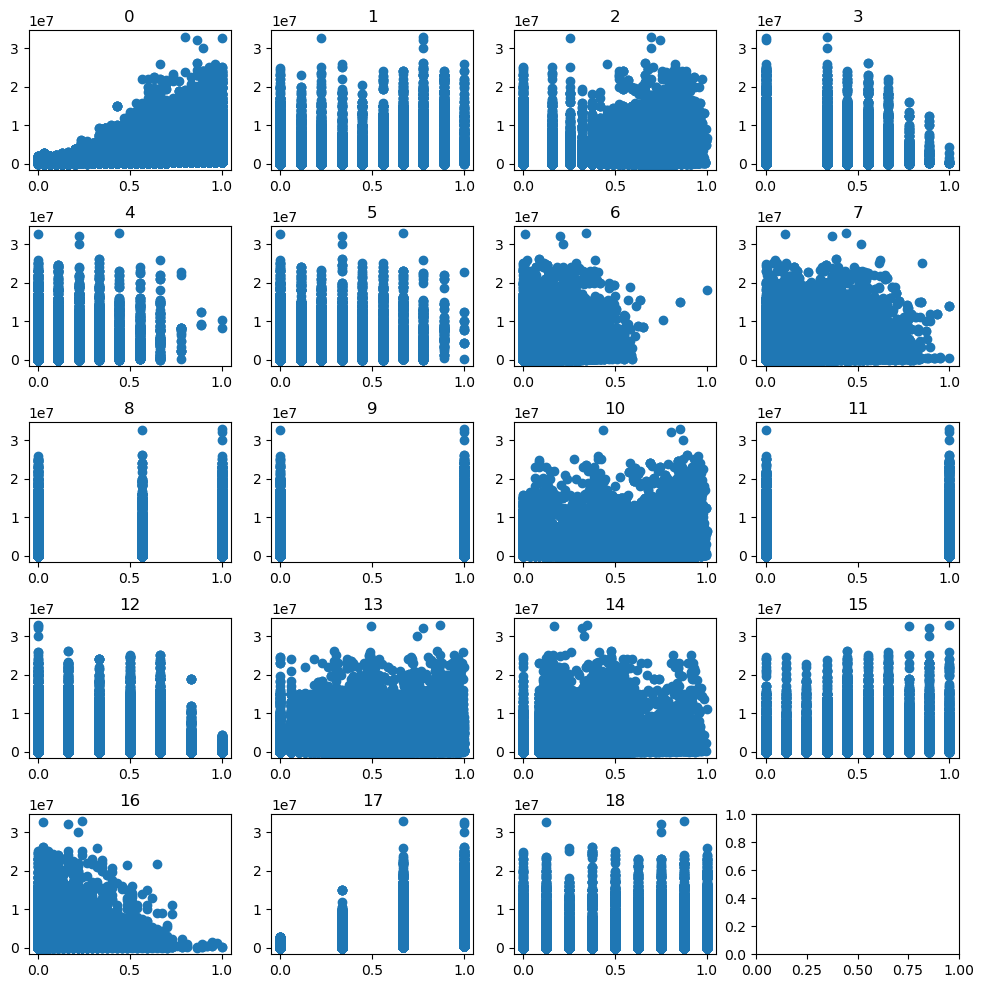

In [779]:
def plot_features(data):
  nb_rows = 5
  nb_cols = 4
  fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
  plt.subplots_adjust(wspace=None, hspace=0.4)
  n = 0
  for i in range(0, nb_rows):
    for j in range(0, nb_cols):
      if n != 19: 
        selected_features = data.columns
        axs[i, j].scatter(data[selected_features[n]], y_train)
        axs[i, j].set_title(selected_features[n])
        n += 1
  plt.show()
plot_features(X_train)

In [780]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly.fit(X_train)
X_train = pd.DataFrame(poly.transform(X_train))
X_test = pd.DataFrame(poly.transform(X_test))
# poly.fit(X_train[column_names])
# X_train_poly = poly.transform(X_train[column_names])
# X_test_poly = poly.transform(X_test[column_names])
# print(X_train_poly)
# print(X_test_poly)

# # Convert transformed arrays back to DataFrames
# X_train_poly_df = pd.DataFrame(X_train_poly)
# X_test_poly_df = pd.DataFrame(X_test_poly)

# X_train = pd.concat([X_train.reset_index(drop=True), X_train_poly_df.reset_index(drop=True)], axis=1)
# X_test = pd.concat([X_test.reset_index(drop=True), X_test_poly_df.reset_index(drop=True)], axis=1)

In [781]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# plot_features(X_train_poly_df)

(44876, 1652)
(44876,)
(19233, 1652)
(19233,)


In [782]:
# Not using, for visualisation purposes
# pca = PCA()
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [783]:
# plt.plot(pca.explained_variance_ratio_, linewidth=2)
# plt.title('Percentage of Variance Explained')
# plt.xlabel('Index Number of Components')
# plt.ylabel('Percentage of Variance Explained')

<a id = "step4"></a>
### **Step 4: Machine Learning Modelling**

[**Back to Top**](#codetop)

In [784]:
#Naive Baseline for Regression
X_train_copy = pd.get_dummies(X_train_copy)
X_test_copy = pd.get_dummies(X_test_copy)

print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

y_train_preds_naive = [round(mean_target_value,2) for row in X_train_copy.iloc[:,0]]

y_test_preds_naive = [round(mean_target_value,2) for row in X_test_copy.iloc[:,0]]

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.10f}.")

1864491.5871958286
The train mean target value is 1864491.59.
The Naive Baseline Model's MSE on train data is 9194439229315.25.
The Naive Baseline Model's MSE on test data is 9086478269298.03.

The Naive Baseline Model's RMSE on train data is 3032233.37.
The Naive Baseline Model's RMSE on test data is 3014378.59.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.0000011818.


c:\Users\louis\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\louis\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [785]:
#Naive Baseline for Classification
# pick the modal class from train data

#y_labels = merged_df['salary_category'].unique()

#print(stats.mode(y_train))

#modal_class_label = stats.mode(y_train)[0]

#print(f"The modal class label is {int(modal_class_label)}, and the accompanying string value of this label is {y_labels[int(modal_class_label)]}.")

#y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
#y_train_preds_naive[0:5]

#y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
#y_test_preds_naive[0:5]

# train accuracy score
#y_true = y_train
#y_pred = y_train_preds_naive

#train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
#print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
#y_true = y_test
#y_pred = y_test_preds_naive

#test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
#print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

In [786]:
#------------------------------------------------------------------------------------------------------------------------

In [787]:
# Default Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_base, y_train_base)

print('train_mse:', mean_squared_error(y_train_base, model_linear_regression.predict(X_train_base)), 
      '\n test_mse:', mean_squared_error(y_test_base, model_linear_regression.predict(X_test_base)))

print('train_r-sq:', r2_score(y_train_base, model_linear_regression.predict(X_train_base)), 
      '\n test_r-sq:', r2_score(y_test_base, model_linear_regression.predict(X_test_base)))

train_mse: 7297166942466.661 
 test_mse: 7240080827431.605
train_r-sq: 0.24010676531035535 
 test_r-sq: 0.24076764896261638


In [788]:
X_train_final = X_train
X_test_final = X_test
y_train_final = y_train
y_test_final = y_test

In [789]:
# Transformed Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 5857139901990.516 
 test_mse: 6119887503681.027
train_r-sq: 0.36296931700676194 
 test_r-sq: 0.3264833134806957


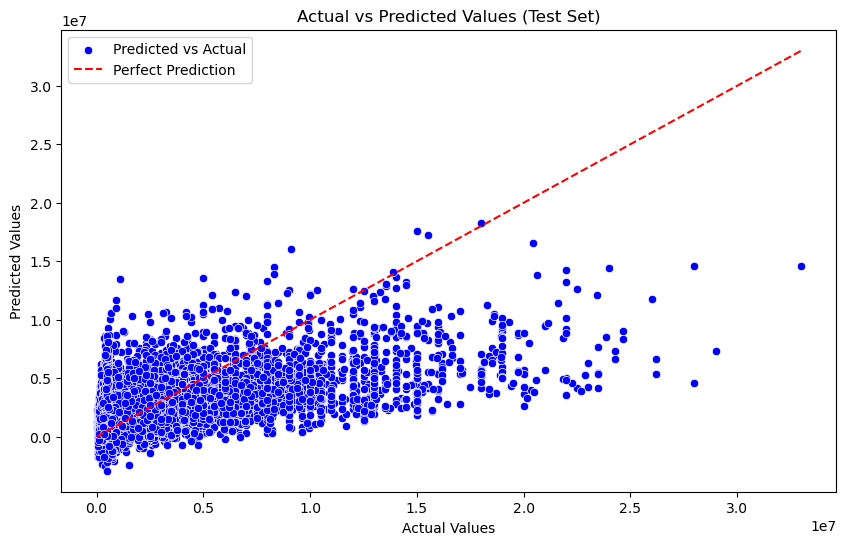

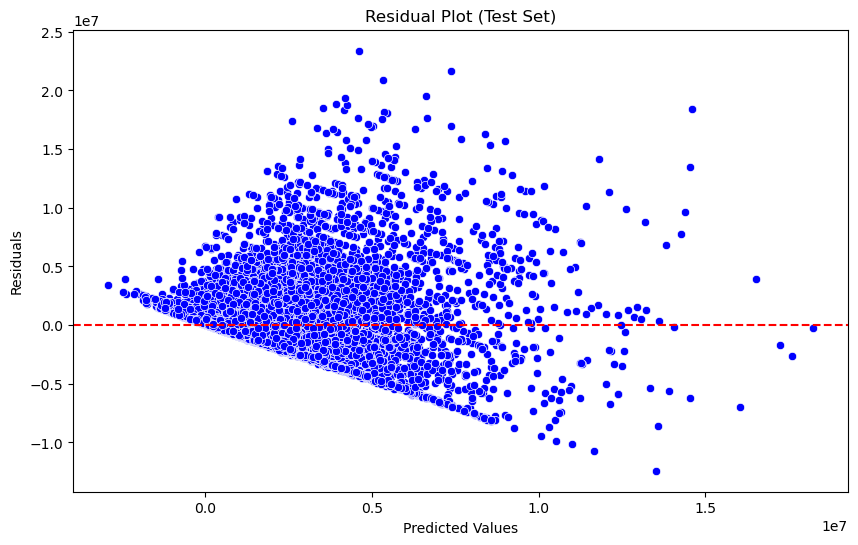

In [790]:
# Predicting the values
y_train_pred = model_linear_regression.predict(X_train_final)
y_test_pred = model_linear_regression.predict(X_test_final)

# Plot Actual vs. Predicted values for Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_final, y=y_test_pred, label='Predicted vs Actual', color='blue')
plt.plot([min(y_test_final), max(y_test_final)], [min(y_test_final), max(y_test_final)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()

# Calculate residuals
train_residuals = y_train_final - y_train_pred
test_residuals = y_test_final - y_test_pred

# Plot Residuals for Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=test_residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

In [791]:
# #Classification
# model_decision_tree = DecisionTreeClassifier()
# model_decision_tree.fit(X_train, y_train)
# y_train_dtree = model_decision_tree.predict(X_train)
# y_test_dtree = model_decision_tree.predict(X_test)
# # train accuracy score
# y_true = y_train
# y_pred = y_train_dtree

# train_accuracy_dtree = accuracy_score(y_true, y_pred) * 100
# print(f"The DTree Model's accuracy on train data is {train_accuracy_dtree:.2f}%.")

# # test accuracy score
# y_true = y_test
# y_pred = y_test_dtree

# test_accuracy_dtree = accuracy_score(y_true, y_pred) * 100
# print(f"The DTree Model's accuracy on test data is {test_accuracy_dtree:.2f}%.")

<a id = "report"></a>
# **Report**

[**Back to Top**](#codetop)

## **Table Of Contents** <a id = "reporttop">

### 1. [Introduction](#intro)
   - [1.1 Background](#background)
   - [1.2 Problem Statement](#problem)
   - [1.3 Target Audience](#targetaudience)
   - [1.4 Stakeholders](#stakeholders)
            
### 2. [Problem Formulation](#problemformulation)
   - [2.1 Data Overview](#dataoverview)
   - [2.2 State of Data](#stateofdata)
   - [2.3 Complete Case Analysis](#completecaseanalysis)
   - [2.4 Exploratory Data Analysis](#exploratorydataanalysis)
       - [2.4.1 Target](#target)
       - [2.4.2 Types of Variables](#typesofvariables)
          - [2.4.2.1 Numeric Variables](#numericvariables)
          - [2.4.2.2 Categorical Variables](#categoricalvariables)
          - [2.4.2.3 Others](#other)
 
### 3. [Data Wrangling on Multiple Tables](#multipletables)
   - [3.1 Tables](#tables)
   - [3.2 Filters](#filters)
   - [3.3 Merging](#merging)
   - [3.4 New Features](#newfeatures)
      - [3.4.1 Mathematical Features](#mathematical)
      - [3.4.2 Time Series Features](#timeseries)

### 4. [Data Cleansing and Transformation](#datacleansingtransformation)
   - [4.1 Missing Value Imputation](#missing)
   - [4.2 Numerical Transformation](#numerictransformation)
   - [4.3 Outlier Handling](#outliers)
   - [4.4 Discretization](#discretize)
   - [4.5 Categorical Encoding](#categoricaltransformation)
   - [4.6 Scaling](#scalingdata)
   - [4.7 Others](#others)
    
### 5. [Machine Learning Model](#machinelearning)
   - [5.1 Naive Baseline Model](#naivebaseline)
   - [5.2 Default Model](#default)
   - [5.3 Final Model](#final)
   - [5.4 Model Coefficients and Analysis](#modelcoefficients)
    
### 6. [Summary](#summary)
   - [6.1 Findings](#findings)
   - [6.2 Possible Improvements](#possibleimprovements)

### 7. [Reflection](#reflection)
   - [7.1 Knowledge, Skills, and Abilities Learnt](#knowledge)
   - [7.2 Areas for Improvement](#areasimprove)
   
### 8. [References](#references)

<a id='intro'></a>
## **Introduction**

<a id = 'background'></a>
### **Background**

In the competitive world of professional baseball, teams in the leagues are always looking for competitive advantages over their opponents. An important and viable aspect is predicting and determining the future salaries of the players. Accurate predictions can assist teams in decision-making, financial planning and budgeting, and strategic planning. However, predicting the salaries of baseball players can be difficult as there are many different factors, such as health factors and injury risks, market dynamics and competition, and team financial resources and strategies, that can affect the salary prediction outcomes.

<a id = 'problemstatement'></a>
### **Problem Statement**

Predicting salaries of baseball players in leagues can be a daunting and challenging task. With the use of previously collected data and various variables, such as player performance, it can play an important role in accurately predicting the salaries of the players. This allows the team to optimize their financial resources and most importantly, make informed decisions that can give themselves a competitive edge in the league. As a data analyst in a major baseball league team, I am tasked to create a prediction model that can help in the forecasting of the wages of players. This model not only solves the problem of predicting salaries but also benefit in the management of players in the team. Additionally, further advancements can be made in sports analysis and decision-making within the team.

<a id = 'targetaudience'></a>
### **Target Audience**

The target audience is the team management, the front office executives, and player agents. Team management has the responsibility to develop long-term plans that ensures the team success. This includes talent acquisition and financial resource management. They make informed decisions from accurate salary predictions regarding player acquisition and retention. Front office executives have the responsibility of overseeing the financial health of the team and the negotiation of player contracts and extensions. With the use of salary predictions, they negotiate fair and reflective contracts that suit the player’s market value. Financial planning can also be made more convenient in the long run, ensuring the team is financially stable while building a competitive team. Player agents have the responsibility to analyze the market conditions to provide advice to the players on their market value and potential salary offers. They can advocate for the players during contract negotiations using accurate salary predictions, ensuring that the players receive fair compensation.

<a id = 'stakeholders'></a>
### **Stakeholders**

The stakeholders are the players, team owners, league officials, and the media and fans. These stakeholders are affected by the predictions of player salaries both directly and indirectly. Salary predictions can impact players’ careers and financial security. Team owners are concerned with the financial investments they make and the success of the team. League officials can monitor the trends of salary using accurate salary predictions to ensure a competitive balance within the league. Media and fans are interested in the salary decisions made to determine the team's performance and market dynamics. 

<a id = 'problemformulation'></a>
## **Problem Formulation**

The overview and the shape of the data are shown below.

<a id = 'dataoverview'></a>
### **Data Overview**

| Column Index | Column              | Description                                                                      |
| ------------ | ------------------- | -------------------------------------------------------------------------------- |
| 1            | player_id           | A unique code asssigned to each player                                           |
| 2            | year                | Year of record                                                                   |
| 3            | team_id             | Unique Identifier of team represented                                            |
| 4            | hits                | Number of hits made when batting                                                 |
| 5            | double              | Number of doubles made when batting                                              |
| 6            | triple              | Number of triples made when batting                                              |
| 7            | home_runs           | Number of home runs made when batting                                            |
| 8            | runs_batted_in      | Number of runs batted in when batting                                            |
| 9            | bases_on_ball       | Number of bases on balls made when batting                                       |
| 10           | strikeouts          | Number of strikeouts received when batting                                       |
| 11           | hits_by_pitch       | Number of hit-by-pitches awarded when batting                                    |
| 12           | sacrifice_flies     | Number of sacrifice flies made when batting                                      |
| 13           | at_bats             | Number of doubles made when batting                                              |
| 14           | league_id           | Unique Identifier of league                                                      |
| 15           | team_id_br          | Unique Identifier of teams (due to repeated ones)                                |
| 16           | rank                | Rank of team at the end of season                                                |
| 17           | pitch_games         | Number of games completed where player pitched                                   |
| 18           | putouts             | Number of putouts made when fielding                                             |
| 19           | assists             | Number of assists made when fielding                                             |
| 20           | errors              | Number of errors made when fielding                                              |
| 21           | salary              | Salary of baseball player                                                        |
| 22           | bat_ave             | Batting Average (Metric to measure batter performance)                           |
| 23           | obp                 | On-base Percentage (Metric to measure batter performance)                        |
| 24           | slg                 | Slugging Percentage (Metric to measure batter performance)                       |
| 25           | field_per           | Fielding Percentage (Metric to measure defensive player performance)             |
| 26           | decade              | Decade of the record                                                             |

In [792]:
removed_column_df.shape

(64109, 24)

In [793]:
removed_column_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64109 entries, 121239 to 212023
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             64109 non-null  int64  
 1   hits             64109 non-null  float64
 2   double           64109 non-null  float64
 3   triple           64109 non-null  float64
 4   home_runs        64109 non-null  float64
 5   runs_batted_in   64109 non-null  float64
 6   bases_on_ball    64109 non-null  float64
 7   strikeouts       64109 non-null  float64
 8   hits_by_pitch    64109 non-null  float64
 9   sacrifice_flies  64109 non-null  float64
 10  at_bats          64109 non-null  float64
 11  league_id        64109 non-null  object 
 12  team_id_br       64109 non-null  object 
 13  rank             64109 non-null  int64  
 14  pitch_games      64109 non-null  float64
 15  putouts          53566 non-null  float64
 16  assists          53566 non-null  float64
 17  errors     

Here are the columns present in the final dataset after merging all tables used. We will be using these columns for our analysis and prediction of salaries of baseball players. Before the removal of some columns, there is a total of 40 different columns in the dataset. For the Linear Regression model to work, we need to remove any columns that do not exhibit numeric properties and have no common values (categorical properties) for all the records in the dataset. The main columns removed are ‘player_id’ and ‘team_id’ . Player_id is removed as it does not play an important role within the model since the goal is to determine the baseball player’s salary based on their skills and attributes and not their names. Team_id is also removed as the teams sometimes change their identification, therefore, a more suited column would be team_id_br as it summarises all the different team identifications into their respective values. The other columns are removed as they contain more than 60% of null values, which are proven to be not useful. For this columns, imputation of missing values might lead to unreliable predictions since they are not the actual values. After the removal of these columns, there are 24 columns with 67,777 records. The dataset contains the following data types: float64(19), int64(3), and object(2).

<a id = 'stateofdata'></a>
### **State of Data**

The data is generally clean and only some cleaning is required to be done. Some of the columns in the dataset contain null values. The columns in the dataset are renamed to their respective names so that it would be easier to understand when conducting transformation. A complete case analysis is done to check whether we need the columns or not.

<a id = 'completecaseanalysis'></a>
### **Complete Case Analysis**

When conducting a complete case analysis, instead of removing all null values within the dataset, the columns with 5% or less null values are only focused on. Before removing all null values, the dataset has 67,777 records. After removing, the number of records is 64,109. If the dataset is disposed of all null values, there would be less data to work with and would make the prediction result less reliable as shown by the number of records below:

- Number of total observations: 67,777
- Number of observations with complete cases: 43,546

- Number of total observations: 67,777
- Number of observations with complete cases: 64,109

<a id = 'exploratorydataanalysis'></a>
### **Exploratory Data Analysis**

In [794]:
removed_column_df.isnull().sum().sort_values(ascending=False)

field_per          13636
errors             10543
assists            10543
putouts            10543
slg                 7653
bat_ave             7653
obp                 7555
hits                   0
decade                 0
salary                 0
pitch_games            0
rank                   0
year                   0
league_id              0
at_bats                0
sacrifice_flies        0
hits_by_pitch          0
strikeouts             0
bases_on_ball          0
runs_batted_in         0
home_runs              0
triple                 0
double                 0
team_id_br             0
dtype: int64

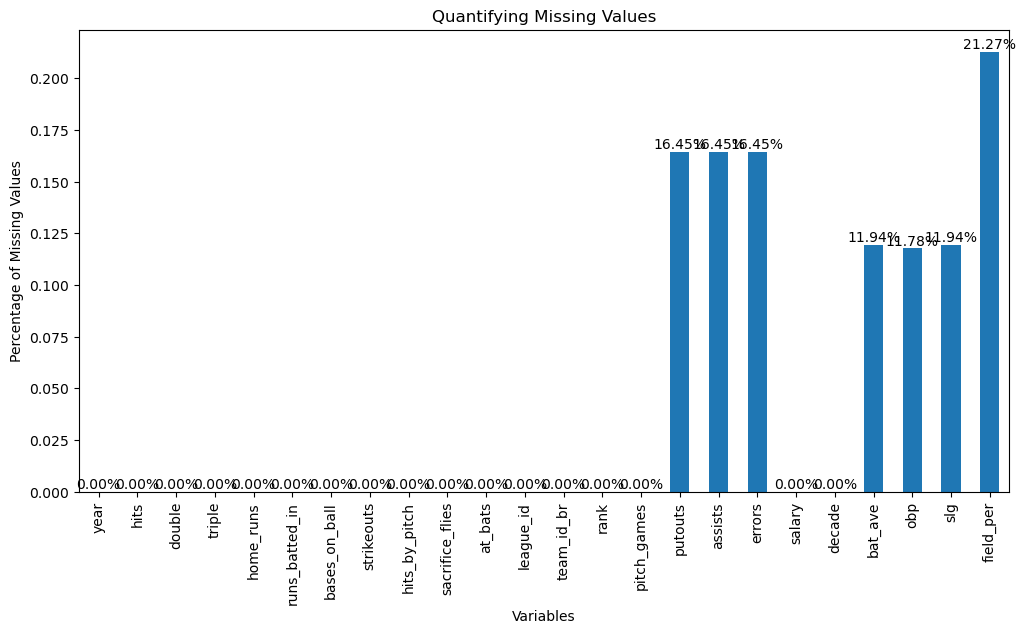

In [795]:
missing = removed_column_df.isnull().mean()
missing.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(missing):
    plt.annotate(f'{value:.2%}', xy=(i, value), ha='center', va='bottom')

Firstly, the dataset is checked for null values. This excludes the complete case analysis completed. When checked for total number of null values for each column, the output showed that all columns except for the columns, 'putouts', 'assists, 'errors, 'bat_ave', ‘obp’, ‘slg’, and 'field_per' had no null values. ‘putouts’, ‘assists’, and ‘errors’ have 10,543 nulls, 16.45% of values in the respective columns. ‘bat_ave’  and ‘slg’ have 7,653 nulls, 11.94% of values in columns. ‘obp’ has 7,555 nulls, 11.78% of values in column. ‘field_per’ has 13,636 nulls, 21.27% of values in column. Overall, these are all the columns that have null values and the percentage composition of null values in the columns shown in the graph.

In [796]:
removed_column_df.nunique()

year                 31
hits                231
double               59
triple               23
home_runs            64
runs_batted_in      157
bases_on_ball       147
strikeouts          203
hits_by_pitch        33
sacrifice_flies      18
at_bats             695
league_id             2
team_id_br           35
rank                  7
pitch_games         163
putouts            1238
assists             520
errors               39
salary             3121
decade                4
bat_ave            6633
obp                7613
slg                9241
field_per          4499
dtype: int64

Text(0.5, 1.0, 'Cardinality')

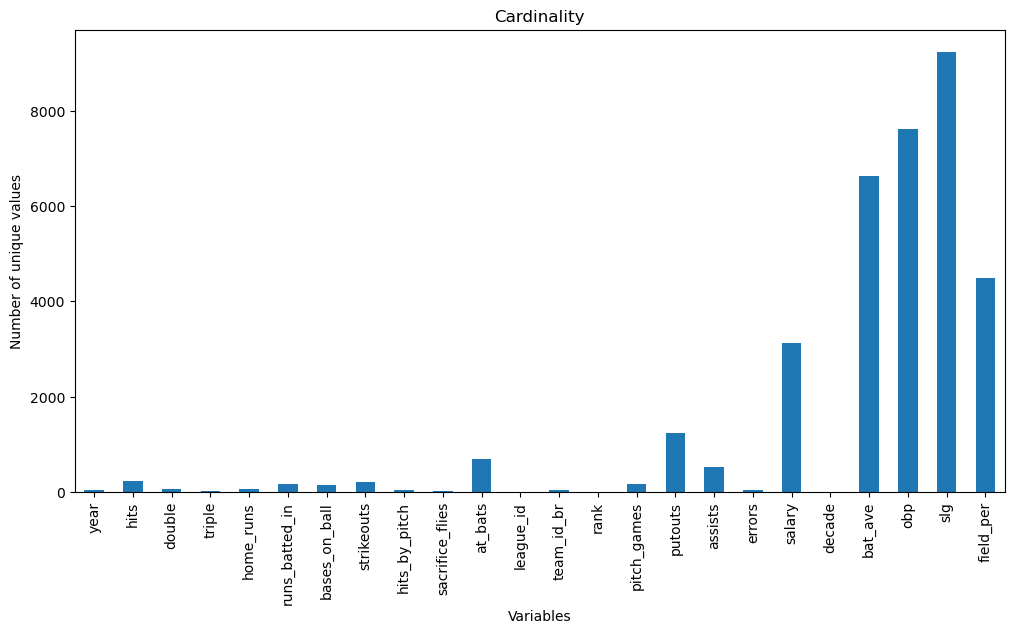

In [797]:
# Adding and removing columns
unique = removed_column_df.nunique().plot.bar(figsize=(12,6))
plt.ylabel("Number of unique values")
plt.xlabel("Variables")
plt.title("Cardinality")

Secondly, the dataset is checked for unique values. A bar chart is used to show the cardinality of the values in the columns or this case, the number of unique values in each column, excluding null values. It can be seen that ‘slg’ has the highest cardinality, meaning that values in ‘slg’ have a higher variation in values. ‘league_id’ has the lowest cardinality with the values, ‘NL’ and ‘AL’ which stands for National League and American league respectively. 

<a id = 'target'></a>
#### **Target**

<Axes: >

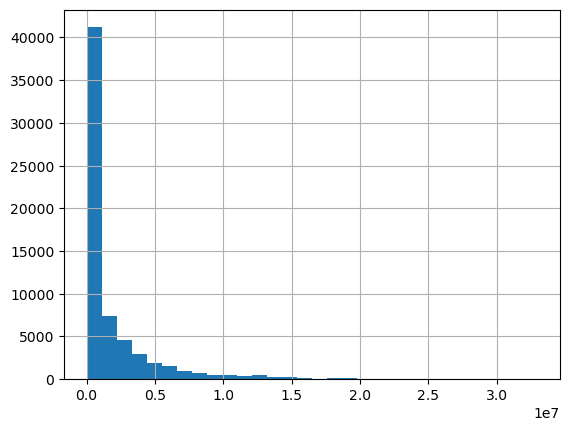

In [798]:
removed_column_df['salary'].hist(bins=30)

Since the prediction problem is the prediction of salaries of baseball players, the target variable is ‘salary’. As shown below, this is the distribution of salary values. It can be seen that the values are mostly left skewed, showing that most of its values are less than 10 million. 

<a id = 'typesofvariables'></a>
### **Types of Variables**

Next, we need to identify the different types of variables in the dataset. After determining the categorical and numerical variables, it can be seen that ['league_id', 'team_id_br', ‘rank’] are categorical variables and ['year', 'hits', 'double', 'triple', 'home_runs', 'runs_batted_in', 'bases_on_ball', 'strikeouts', 'hits_by_pitch', 'sacrifice_flies', 'at_bats', 'pitch_games', 'putouts', 'assists', 'errors', 'decade', 'bat_ave', 'obp', 'slg', 'field_per'] are numerical variables. This means that the categorical variables will need to be encoded and the numerical variables need to be transformed, scaled or capped to be suitable to be used in the model and ensure that the predictions are accurate.

In [799]:
all_categorical = [cat for cat in removed_column_df.columns if merged_df[cat].dtypes=='O']
all_categorical

['league_id', 'team_id_br']

In [800]:
all_numeric = [num for num in removed_column_df.columns if merged_df[num].dtypes!='O']
all_numeric

['year',
 'hits',
 'double',
 'triple',
 'home_runs',
 'runs_batted_in',
 'bases_on_ball',
 'strikeouts',
 'hits_by_pitch',
 'sacrifice_flies',
 'at_bats',
 'rank',
 'pitch_games',
 'putouts',
 'assists',
 'errors',
 'salary',
 'decade',
 'bat_ave',
 'obp',
 'slg',
 'field_per']

<a id = 'numericvariables'></a>
#### **Numeric Variables**

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'hits'}>,
        <Axes: title={'center': 'double'}>,
        <Axes: title={'center': 'triple'}>,
        <Axes: title={'center': 'home_runs'}>],
       [<Axes: title={'center': 'runs_batted_in'}>,
        <Axes: title={'center': 'bases_on_ball'}>,
        <Axes: title={'center': 'strikeouts'}>,
        <Axes: title={'center': 'hits_by_pitch'}>,
        <Axes: title={'center': 'sacrifice_flies'}>],
       [<Axes: title={'center': 'at_bats'}>,
        <Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'pitch_games'}>,
        <Axes: title={'center': 'putouts'}>,
        <Axes: title={'center': 'assists'}>],
       [<Axes: title={'center': 'errors'}>,
        <Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'decade'}>,
        <Axes: title={'center': 'bat_ave'}>,
        <Axes: title={'center': 'obp'}>],
       [<Axes: title={'center': 'slg'}>,
        <Axes: title={'center': 'fiel

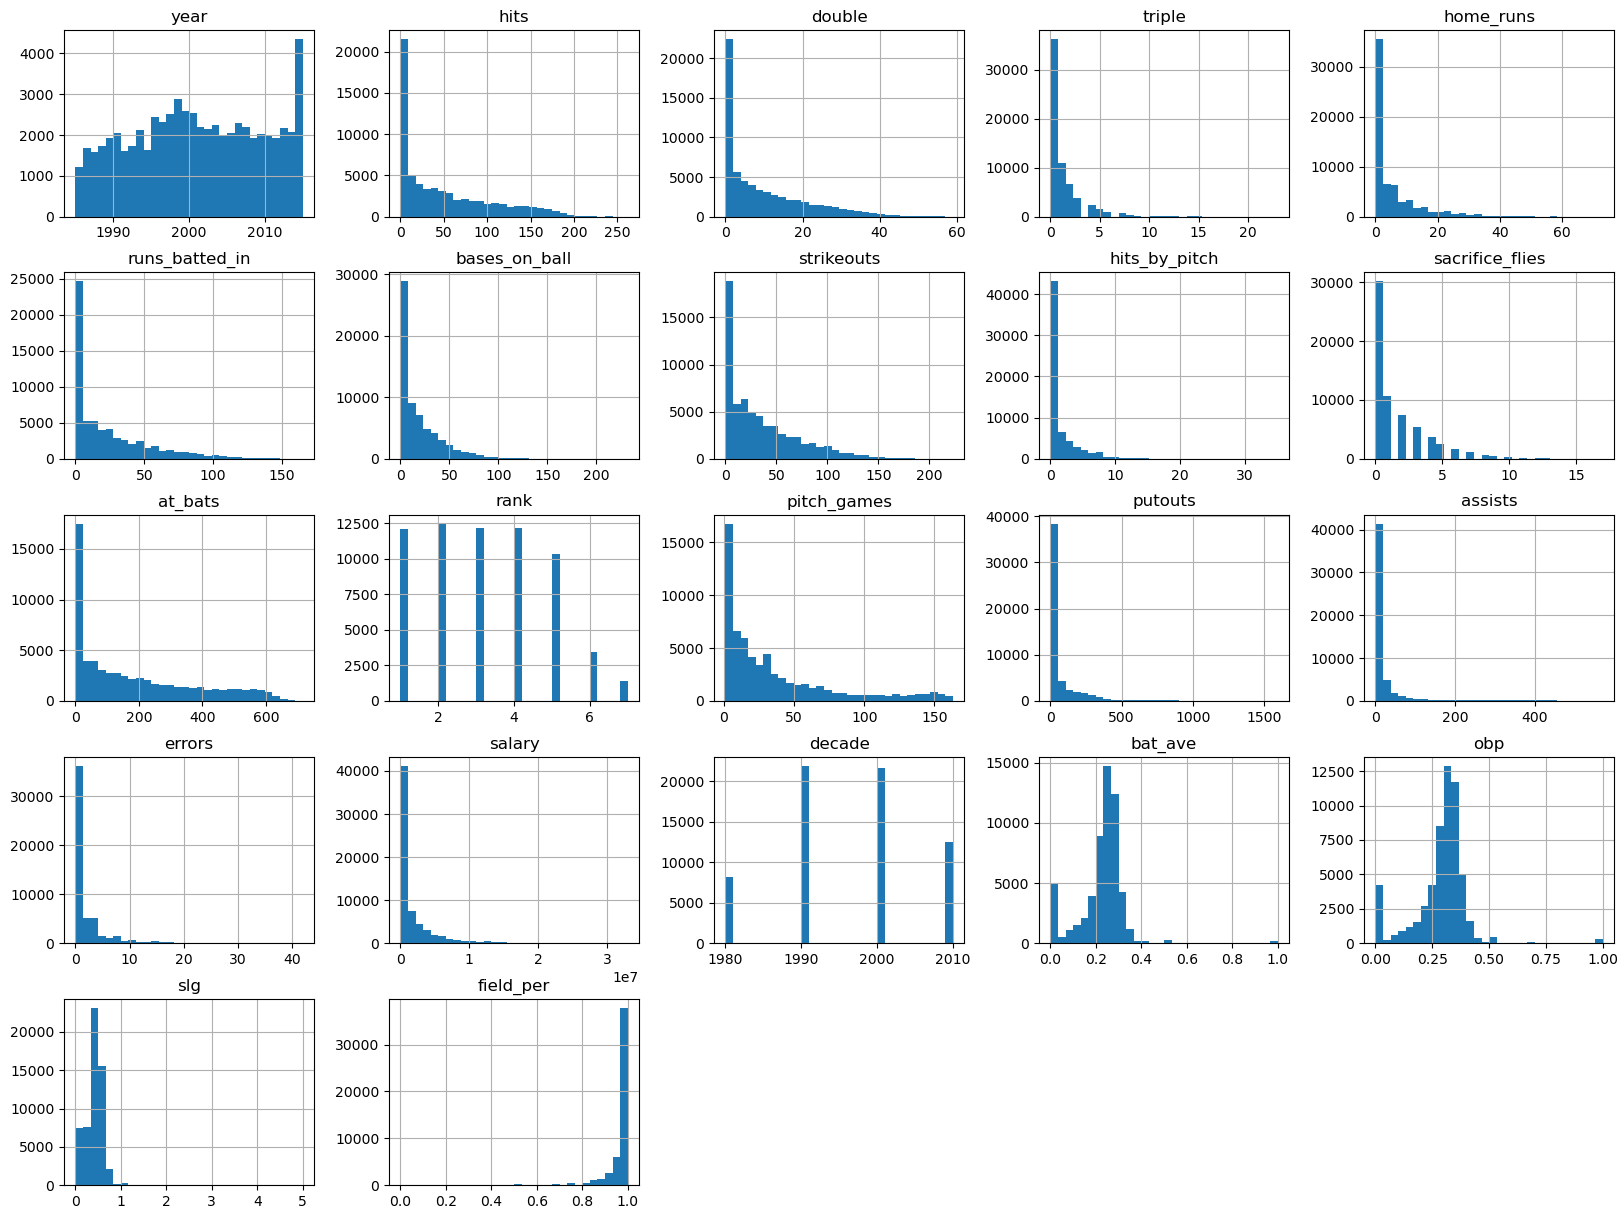

In [801]:
removed_column_df[all_numeric].hist(figsize=(20,15), bins=30)

To determine the distribution of the numerical variables, histograms are used. It can be seen the majority of the columns are skewed to the left while ‘field_per’ and ‘year’ are skewed to the right.

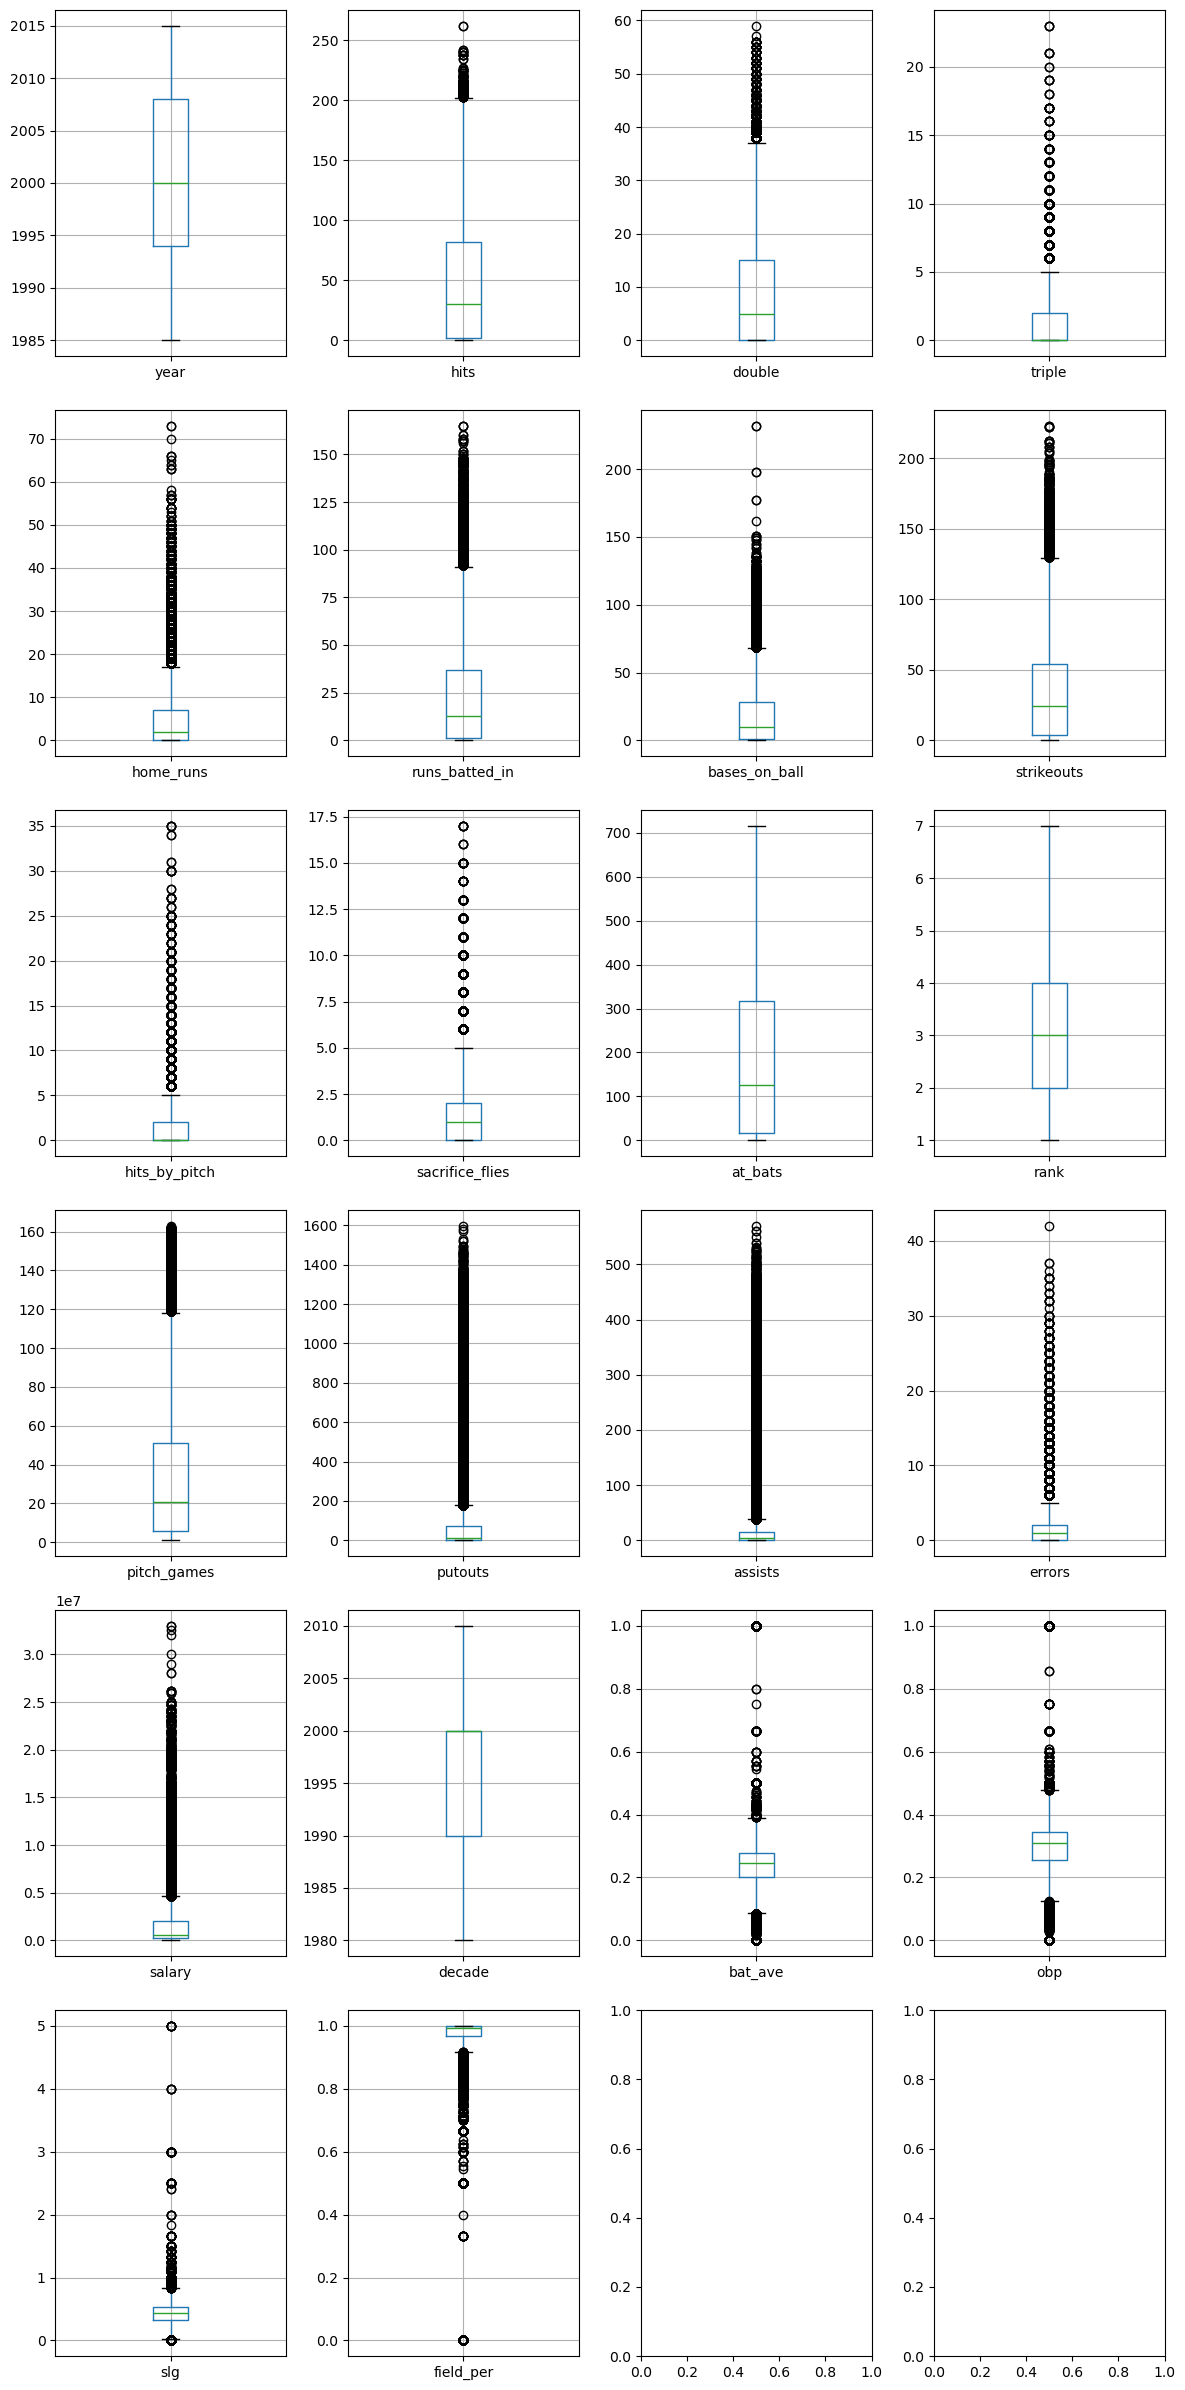

In [802]:
num_plots = len(all_numeric)
num_rows = math.ceil(num_plots / 4)  # 4 columns per row

fig, ax = plt.subplots(num_rows, 4, figsize=(12, num_rows * 4))
ax = ax.flatten()

for i, col in enumerate(all_numeric):
   removed_column_df.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

To determine the outliers of the numerical variables, boxplots are used. It can be seen that the majority of the columns have outliers, with the exception of the ‘year’, ‘decade’, and ‘at_bats’. The columns with outliers generally have outliers on top. The column ‘field_per’ has outliers at the bottom, while ‘slg’, ‘obp’, and ‘bat_ave’ have outliers on both sides. 

Some key data exploration from numerical variables against the target variable is the columns ‘year’, ‘assists’, ‘errors’, ‘bat_ave’, ‘obp’, and ‘field_per’. 

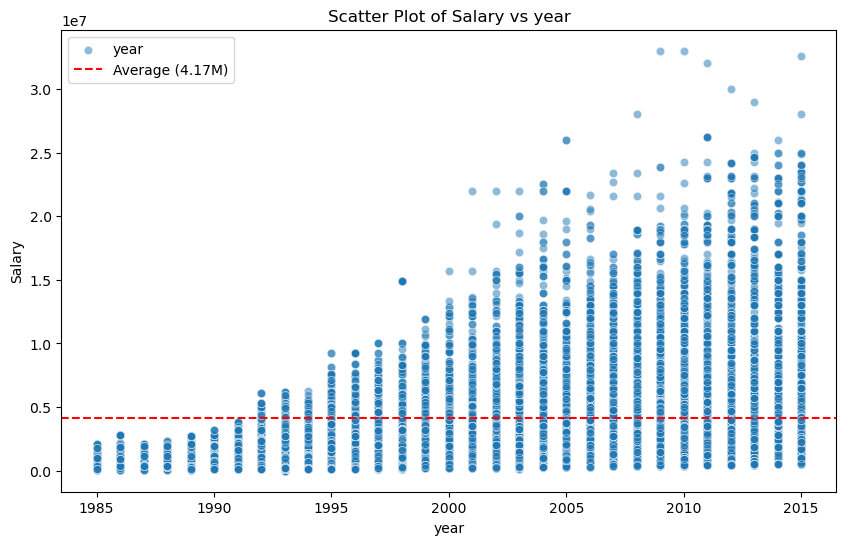

In [803]:
numeric_var = 'year'

average_value = 4170000       # 4.17 million

# Create scatter plots for each numeric variable against the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=removed_column_df, x=numeric_var, y='salary', alpha=0.5, label=numeric_var)
    
# Specified percentile lines
plt.axhline(average_value, color='r', linestyle='--', label='Average (4.17M)')
    
plt.title(f'Scatter Plot of Salary vs {numeric_var}')
plt.xlabel(numeric_var)
plt.ylabel('Salary')
plt.legend()
plt.show()

As time progressed, the salary of baseball players generally increased, especially after the year 1992. This means that the baseball players earn higher salaries after 1992, since there are more data points above the average line. This could be caused by inflation or the economy of the country.

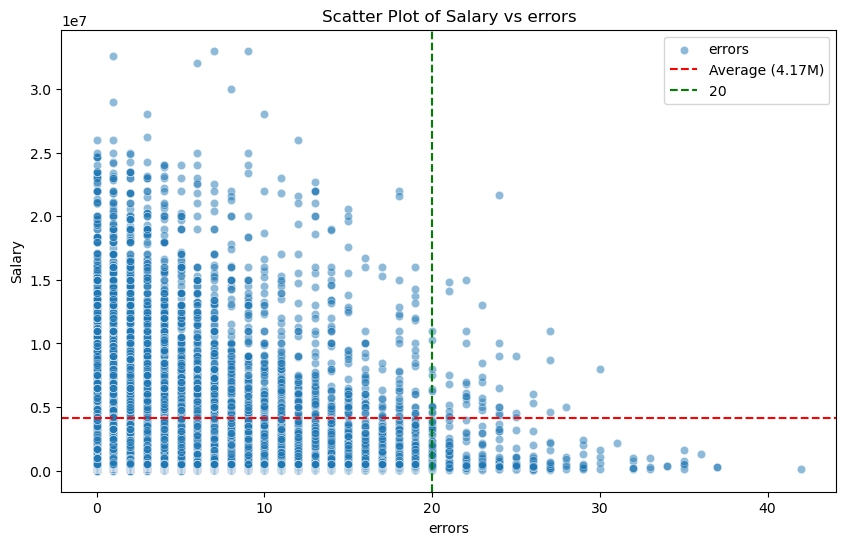

In [804]:
numeric_var = 'errors'

average_value = 4170000       # 4.17 million
recommended_range1 = 20
# Create scatter plots for each numeric variable against the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=removed_column_df, x=numeric_var, y='salary', alpha=0.5, label=numeric_var)
    
# Specified percentile lines
plt.axhline(average_value, color='r', linestyle='--', label='Average (4.17M)')
plt.axvline(recommended_range1, color='g', linestyle='--', label='20')
plt.title(f'Scatter Plot of Salary vs {numeric_var}')
plt.xlabel(numeric_var)
plt.ylabel('Salary')
plt.legend()
plt.show()

Players that make less than 20 errors are more likely to have higher salaries. This means that they are more consistent and are more skilled, therefore making fewer mistakes. 

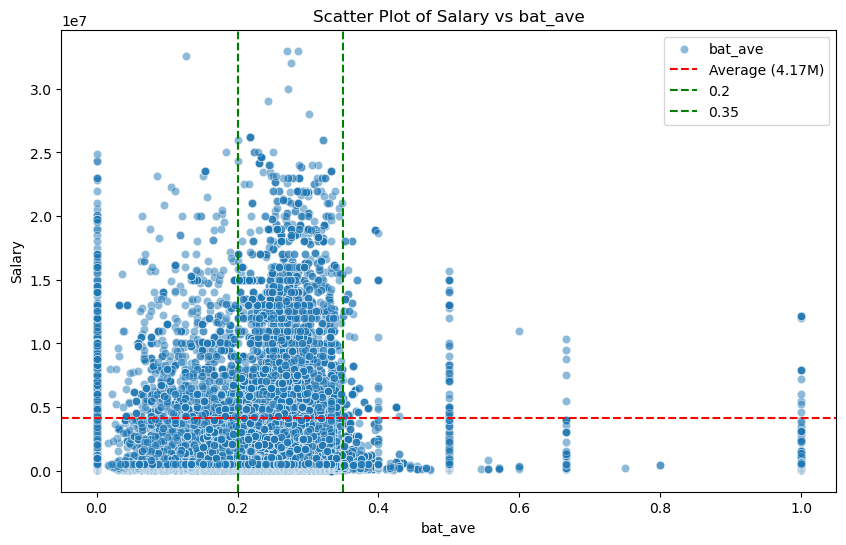

In [805]:
numeric_var = 'bat_ave'

average_value = 4170000       # 4.17 million
recommended_range1 = 0.2
recommended_range2 = 0.35
# Create scatter plots for each numeric variable against the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=removed_column_df, x=numeric_var, y='salary', alpha=0.5, label=numeric_var)
    
# Specified percentile lines
plt.axhline(average_value, color='r', linestyle='--', label='Average (4.17M)')
plt.axvline(recommended_range1, color='g', linestyle='--', label='0.2')
plt.axvline(recommended_range2, color='g', linestyle='--', label='0.35')
plt.title(f'Scatter Plot of Salary vs {numeric_var}')
plt.xlabel(numeric_var)
plt.ylabel('Salary')
plt.legend()
plt.show()

Players with batting averages between 0.2 and 0.35 have higher salaries. This is considered high as an excellent batting average is 0.3. This means that these players are generally good at batting, allowing for more points scored per game.

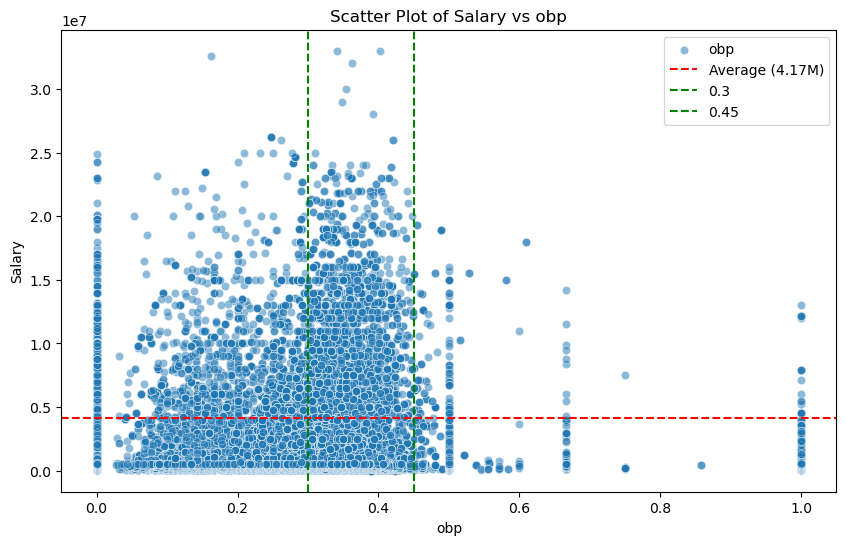

In [806]:
numeric_var = 'obp'

average_value = 4170000       # 4.17 million
recommended_range1 = 0.3
recommended_range2 = 0.45
# Create scatter plots for each numeric variable against the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=removed_column_df, x=numeric_var, y='salary', alpha=0.5, label=numeric_var)
    
# Specified percentile lines
plt.axhline(average_value, color='r', linestyle='--', label='Average (4.17M)')
plt.axvline(recommended_range1, color='g', linestyle='--', label='0.3')
plt.axvline(recommended_range2, color='g', linestyle='--', label='0.45')
plt.title(f'Scatter Plot of Salary vs {numeric_var}')
plt.xlabel(numeric_var)
plt.ylabel('Salary')
plt.legend()
plt.show()

Players with on-base percentages between 0.3 and 0.45 have higher salaries. Players with high on-base percentage are generally good at getting to bases and not get eliminated. This is considered high as the average on-base percentage is 0.312, meaning that they have the ability to create more opportunities to score points.

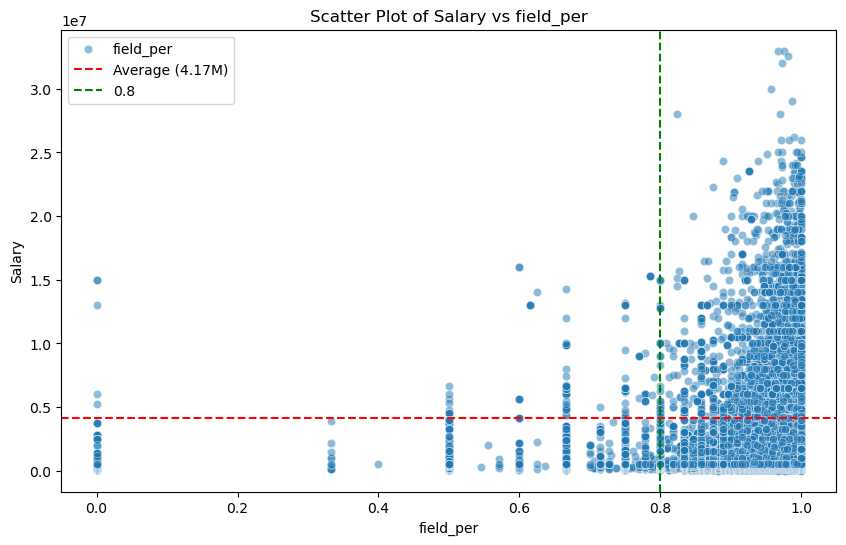

In [807]:
numeric_var = 'field_per'

average_value = 4170000       # 4.17 million
recommended_range1 = 0.8
# Create scatter plots for each numeric variable against the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=removed_column_df, x=numeric_var, y='salary', alpha=0.5, label=numeric_var)
    
# Specified percentile lines
plt.axhline(average_value, color='r', linestyle='--', label='Average (4.17M)')
plt.axvline(recommended_range1, color='g', linestyle='--', label='0.8')
plt.title(f'Scatter Plot of Salary vs {numeric_var}')
plt.xlabel(numeric_var)
plt.ylabel('Salary')
plt.legend()
plt.show()

Players with field percentages more than 0.8 have higher salaries. Players with high fielding percentages are generally able to properly handle a batted or thrown ball, thus they are better at fielding.

<a id = 'categoricalvariables'></a>
#### **Categorical Variables**

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\3724084198.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='salary', y='team_id_br', data=top_5_teams, palette='viridis')


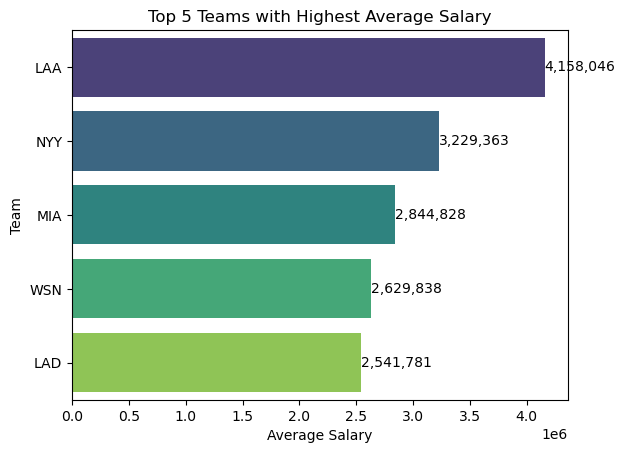

In [808]:
# Calculate average salary per team
average_salary = removed_column_df.groupby('team_id_br')['salary'].mean().reset_index()
# Sort teams by average salary in descending order
average_salary = average_salary.sort_values(by='salary', ascending=False)
# Select the top 5 teams with the highest average salary
top_5_teams = average_salary.head(5)
# Create the bar chart
bar_plot = sns.barplot(x='salary', y='team_id_br', data=top_5_teams, palette='viridis')
plt.title('Top 5 Teams with Highest Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Team')
for index, value in enumerate(top_5_teams['salary']):
    bar_plot.text(value, index, f'{value:,.0f}', color='black', ha="left", va="center")
plt.show()


C:\Users\louis\AppData\Local\Temp\ipykernel_27608\4252246298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='salary', y='league_id', data=average_salary, palette='viridis')


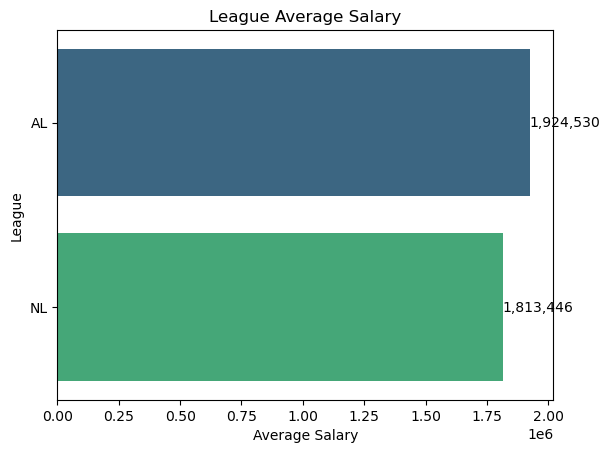

In [809]:
# Calculate average salary per team
average_salary = removed_column_df.groupby('league_id')['salary'].mean().reset_index()
# Sort teams by average salary in descending order
average_salary = average_salary.sort_values(by='salary', ascending=False)
# Create the bar chart
bar_plot = sns.barplot(x='salary', y='league_id', data=average_salary, palette='viridis')
plt.title('League Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('League')
for index, value in enumerate(average_salary['salary']):
    bar_plot.text(value, index, f'{value:,.0f}', color='black', ha="left", va="center")
plt.show()


Players in the teams Los Angeles Angels, New York Yankees, Miami Marlins, Washington Nationals, and Los Angeles Dodgers have higher salaries. The top 2 teams are in the American League, while the rest are in the National League. It can also be said that players in the American League generally get paid more than those in the National League, which is proven by the average salary chart for leagues. This means that the team can utilise this insight to determine the base salary of their players and whether to contract other better players that can benefit the team's standings in the league.

<a id = 'other'></a>
#### **Other**

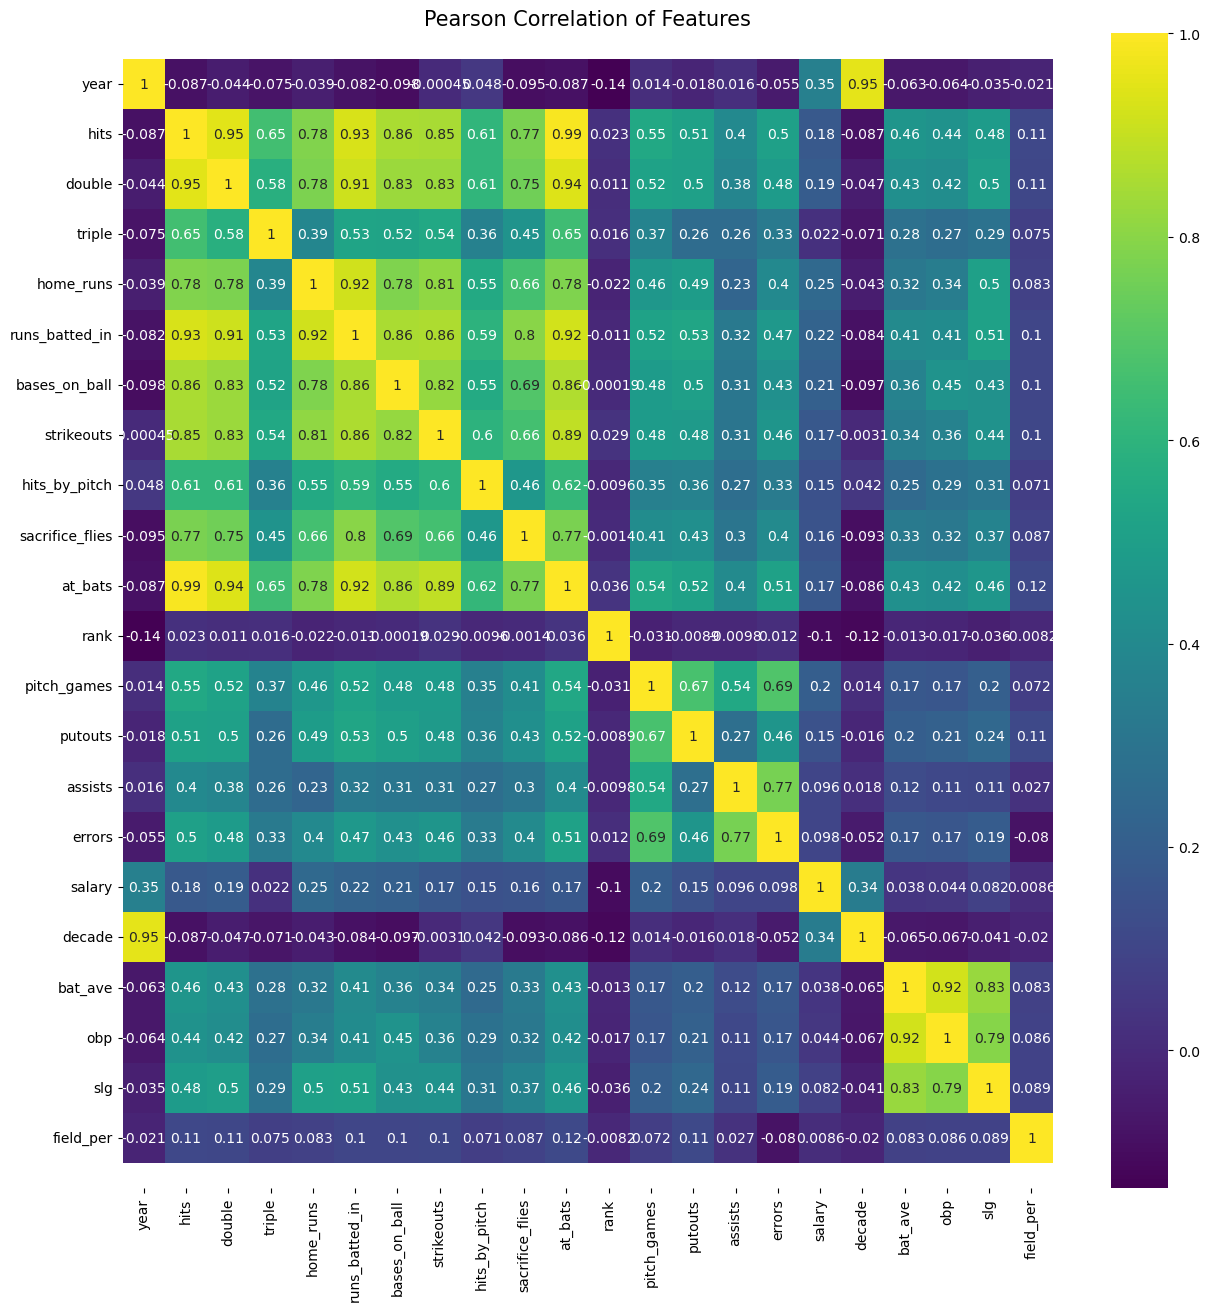

In [810]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(removed_column_df[all_numeric].astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

This correlation matrix shows the correlation of the variables. Most of the variables have very low correlation with salary while year and decade have a higher correlation among the others. This means that they are more prone to affect the salaries of the players during prediction. This could be reflected in the dataset due to inflation or changes in the countries’ economy along the years.

<a id = 'multipletables'></a>
## **Data Wrangling on Multiple Tables**

<a id = 'tables'></a>
### **Tables**

In [811]:
bat['year'].values

array([1876, 1876, 1876, ..., 2015, 2015, 2015], dtype=int64)

To create the final dataset, the tables used were batting, pitching, fielding, salary, and team. The overview for each table is shown below (with filters active):

In [812]:
bat.head()

player_id  year  stint team_id league_id   g     ab     r      h  double  \
737   addybo01  1876      1     CHN        NL  32  142.0  36.0   40.0     4.0   
738  allisar01  1876      1     LS1        NL  31  130.0   9.0   27.0     2.0   
739  allisdo01  1876      1     HAR        NL  44  163.0  19.0   43.0     4.0   
740  andrufr01  1876      1     CHN        NL   8   36.0   6.0   11.0     3.0   
741  ansonca01  1876      1     CHN        NL  66  309.0  63.0  110.0     9.0   

     ...   rbi  sb  cs    bb   so  ibb  hbp  sh  sf  g_idp  
737  ...  16.0 NaN NaN   5.0  0.0  NaN  NaN NaN NaN    NaN  
738  ...  10.0 NaN NaN   2.0  6.0  NaN  NaN NaN NaN    NaN  
739  ...  15.0 NaN NaN   3.0  9.0  NaN  NaN NaN NaN    NaN  
740  ...   2.0 NaN NaN   0.0  5.0  NaN  NaN NaN NaN    NaN  
741  ...  59.0 NaN NaN  12.0  8.0  NaN  NaN NaN NaN    NaN  

[5 rows x 22 columns]

In [813]:
pitch.head()

player_id  year  stint team_id league_id   w   l   g  gs  cg  ...  ibb  \
131  barnero01  1876      1     CHN        NL   0   0   1   0   0  ...  NaN   
132  blongjo01  1876      1     SL3        NL   0   0   1   0   0  ...  NaN   
133   bondto01  1876      1     HAR        NL  31  13  45  45  45  ...  NaN   
134  bootham01  1876      1     CN1        NL   0   1   3   1   0  ...  NaN   
135  boothed01  1876      1     NY3        NL   0   0   1   0   0  ...  NaN   

      wp  hbp  bk     bfp   gf    r  sh  sf  g_idp  
131  0.0  NaN   0    13.0  0.0    8 NaN NaN    NaN  
132  0.0  NaN   0    14.0  1.0    0 NaN NaN    NaN  
133  8.0  NaN   0  1623.0  0.0  164 NaN NaN    NaN  
134  0.0  NaN   0    51.0  1.0   18 NaN NaN    NaN  
135  0.0  NaN   0    34.0  1.0   10 NaN NaN    NaN  

[5 rows x 30 columns]

In [814]:
field.head()

player_id  year  stint team_id league_id pos   g  gs  inn_outs     po  \
1503   addybo01  1876      1     CHN        NL  OF  32 NaN       NaN   46.0   
1504  allisar01  1876      1     LS1        NL  1B   8 NaN       NaN   90.0   
1505  allisar01  1876      1     LS1        NL  OF  23 NaN       NaN   34.0   
1506  allisdo01  1876      1     HAR        NL   C  40 NaN       NaN  201.0   
1507  allisdo01  1876      1     HAR        NL  OF   6 NaN       NaN    5.0   

         a     e   dp    pb  wp  sb  cs  zr  
1503   6.0  13.0  0.0   NaN NaN NaN NaN NaN  
1504   1.0   4.0  2.0   NaN NaN NaN NaN NaN  
1505  11.0  12.0  1.0   NaN NaN NaN NaN NaN  
1506  43.0  33.0  2.0  12.0 NaN NaN NaN NaN  
1507   0.0   1.0  0.0   NaN NaN NaN NaN NaN

In [815]:
salary.head()

year team_id league_id  player_id  salary
0  1985     ATL        NL  barkele01  870000
1  1985     ATL        NL  bedrost01  550000
2  1985     ATL        NL  benedbr01  545000
3  1985     ATL        NL   campri01  633333
4  1985     ATL        NL  ceronri01  625000

In [816]:
team.head()

year league_id team_id franchise_id div_id  rank   g  ghome   w   l  ...  \
50  1876        NL     BSN          ATL    NaN     4  70    NaN  39  31  ...   
51  1876        NL     CHN          CHC    NaN     1  66    NaN  52  14  ...   
52  1876        NL     CN1          CNR    NaN     8  65    NaN   9  56  ...   
53  1876        NL     HAR          HAR    NaN     2  69    NaN  47  21  ...   
54  1876        NL     LS1          LGR    NaN     5  69    NaN  30  36  ...   

      dp    fp                     name                        park  \
50  42.0  0.86          Boston Red Caps         South End Grounds I   
51  33.0  0.89  Chicago White Stockings         23rd Street Grounds   
52  45.0  0.84          Cincinnati Reds              Avenue Grounds   
53  27.0  0.88      Hartford Dark Blues  Hartford Ball Club Grounds   
54  44.0  0.87         Louisville Grays    Louisville Baseball Park   

    attendance  bpf  ppf  team_id_br  team_id_lahman45  team_id_retro  
50         NaN  102   98         BSN               BSN            BSN  
51         NaN  112  106         CHC               CHN            CHN  
52         NaN   86   95         CIN               CN1            CN1  
53         NaN  110  106         HAR               HAR            HAR  
54         NaN  117  117         LOU               LS1            LS1  

[5 rows x 48 columns]

These tables are relevant in determining the salary of baseball players based on their attributes and skills. The batting table is used for the batting metrics and to determine how much skill the player has as a batter. The pitching table is used for the pitching metrics and to determine how much skill the player has as a pitcher. The fielding table is used for fielding metrics and to determine how much skill the player has as a fielder. The salary table provides the required target variable and allows the model to conduct predictions on the variable. The team table provides the respective teams of each player, the league each team is in and the rank the team was in during the season.

<a id = 'filters'></a>
### **Filters**

Some filters were used to ensure that records with many null values were avoided. This generally occurs in the earlier years. The data tables provided span the years from 1871 to 2015. Therefore, it would be ideal to remove the records from the earlier years to reduce the number of null values in the final dataset. Although this might remove records from the data tables, it would not cause much of an impact since there are still 140 years’ worth of data to supplement the final dataset. After filtering, the dataset contains records from the years 1876 to 2015 allowing us to maintain a lower count of null values while being able to make accurate and reliable predictions.

<a id = 'merging'></a>
### **Merging**

To join the tables into a singular dataset, different methods are attempted to merge the tables together. This is determined by evaluating the model score with all nulls dropped and categorical variables mapped. The relative scores are as shown below:

1. outer (214,569 rows)
- train_mse: 8781405394415.613 
-  test_mse: 8518069115852.108
- train_r-sq: 0.29895960739233796 
-  test_r-sq: 0.29578379441222835
-------------------------------
2. inner (22,272 rows)
- train_mse: 8664396119564.868 
-  test_mse: 8807195299658.47
- train_r-sq: 0.300948541518985 
-  test_r-sq: 0.29013140792815206
-------------------------------
3. left (213,777 rows)
- train_mse: 8664396119564.868 
-  test_mse: 8807195299658.47
- train_r-sq: 0.300948541518985 
-  test_r-sq: 0.29013140792815206
-------------------------------
4. right (61,366 rows)
- train_mse: 8819000454624.639 
-  test_mse: 8438136432307.224
- train_r-sq: 0.29975954024130136 
-  test_r-sq: 0.2933377004644361
-------------------------------

It can be seen that the scores for the inner join and the left join are the highest. This is then followed by right join then outer join. To determine whether to use left or inner join, the number of records is used. The left join is used since it has more records as compared to the inner join. Left join joins the tables together based on the specified table, based on the relevant common variables in each table. This might allow the model to have a larger dataset size to work with, increasing effectiveness and accuracy.

Columns are specified beforehand to determine which columns might be useful and viable in making predictions on baseball players’ salaries. Firstly, the batting table is merged with the team table based on the ‘year’ and ‘team_id’ variables to ensure all records in the team table are mapped to their respective records in the batting table to produce a new data frame. Secondly, the new data frame is merged with the other tables based on the ‘player_id’ and ‘year’ to produce a complete dataset.

<a id = 'newfeatures'></a>
### **New Features**

Features were created to explore more metrics that can be used to predict the baseball player’s salary. Such features can include new mathematical features or time series features.

<a id = 'mathematical'></a>
#### **Mathematical Features**

Firstly, mathematical features are features that are created from the columns in the dataset. The mathematical features are batting average, on-base percentage, slugging percentage, and fielding percentage. These columns are represented by ‘bat_ave’, ‘obp’, ‘slg’, and ‘field_per’ respectively. 
The batting average is the measurement of a hitter’s or batter’s success at the plate. It is determined by dividing the player’s hits by the total at-bats. This measurement does not take into account the hit type such as double, triple, or home run. Recently, the league-wide average in Major League Baseball (MLB) is around .250. Although the batting average can be used to evaluate pitchers, this measurement is used to only measure the batter’s performance in the final dataset.

The on-base percentage is the measurement of the frequency of times when the batter or hitter reaches bases when they appear on the plate. The number of times the batter is at the base includes the hits, walks, and hit-by-pitches made by them. This measurement does not take into account errors or sacrifice bunts. It shows which hitter or batter can accomplish the task of avoiding making an out. Like batting average, this measurement can also be used for pitchers, but it will only be used to measure the batter’s performance. 

The slugging percentage is the measurement of the total number of bases the player records per at-bat. It only deals with hits and does not include walks and hit-by-pitches, unlike on-base percentage. It takes into account hits, doubles, triples, home runs, and at-bats. Unlike batting average, slugging percentage differs in that all hits are not valued equally. Slugging percentage is one of the best evaluators of power. Like the previous two metrics stated, this measurement can also be used for pitchers, but it will only be used to measure the batter’s performance. 

The fielding percentage is the measurement of how often a fielder or team makes the play when fielding a batted ball, throwing a ball, or receiving a thrown ball for an out. It takes into account the putouts, assists, and the total sum of putouts, assists, and errors. This measurement can vary among different types of basemen. Players with low fielding percentages have a higher chance to be shortstops and third basemen since they have to play a more active role in dealing with tricky ground balls and tough throws. Players with high fielding percentages have a higher chance to be catchers, first basemen, and outfielders as their plays are relatively easier to make as compared to the other fielding positions. 

<a id = 'timeseries'></a>
#### **Time Series Features**

Secondly, time series are features that extract data from the provided date or datetime variables. Since the only date variable provided in the dataset is the year, features are only extracted from this variable. The feature extracted and created from the year variable is the decade of the year. For example, if the year is 2012, the decade is 2010. This new feature allow us to look at the salary based on a larger point of view instead of their respective years. It might provide meaningful insights that can be beneficial for the model to predict baseball players’ salaries.

These are the columns that are created to undermine more information and make the dataset more informative. This allows the model to predict the baseball player's salary using more features, allowing it to be more accurate in the real world context.

<a id = 'datacleansingtransformation'></a>
## **Data Cleansing and Transformation**

Data cleansing and transformation allow the data to be more viable for the model to predict the target more accurately. It not only increases the model score but also improves how the model views the data. The steps to data cleaning and transformation include missing value imputation, outlier handling, numerical data transformation, categorical data encoding, discretization, scaling, and other methods. These methods change the values in the columns in the dataset to improve the model. All columns are tested with some methods to determine the best method to achieve the highest score for the model.

<a id = 'missing'></a>
### **Missing Value Imputation**

Missing value imputation is conducted to fill in the null values in each column. Unless the column has a high percentage composition of null values, missing value imputation can be used to alter the data and fill in the unknown values, ensuring that prediction can be carried out more accurately.

There are many missing data present in the columns, ‘putouts’, ‘assists’, ‘errors’, ‘bat_ave’, ‘obp’, ‘slg’, and ‘field_per’. The percentage composition of null values in the column is generally more than 5%. Therefore, data removal or dropping null values will not be conducted since doing this might cause us to lose some required and necessary information from the dataset. For these columns, different imputation methods are used to fill in the data that was missing or null.

There are only missing values in the numerical variables. The categorical variables are clean or null values and do not require imputation. Null values in the numeric variables, such as ‘putouts’, ‘assists’, ‘errors’, ‘bat_ave’, ‘obp’, ‘slg’, and ‘field_per’ are imputed using mean imputer, median imputer, Mean and median Imputer, End tail imputer, and Arbitrary Imputer. (A Median Imputer is used as default to impute all the missing values to ensure that there is a model score.)

The columns, ‘assists’ and ‘errors’ are imputed using Median Imputer. The columns, ‘putouts’, ‘obp’, and ‘field_per’ are imputed using End Tail Imputer. The column, ‘slg’ is imputed using the Mean Imputer. The column, ‘bat_ave’ is imputed using Arbitrary Imputer. 
The scores below show the different imputation techniques used and their scores for each technique for each null variable:

**Missing Value Imputation**

-------------------------------
1. DropNA
- train_r-sq: 0.23742424614793778 
-  test_r-sq: 0.2370296985831275

-------------------------------
2. Median Impute: Default
- train_r-sq: 0.22760963309982574 
-  test_r-sq: 0.2242319624157887

-------------------------------
3. Testing (putouts)

Mean
- train_r-sq: 0.22764383120758847 
-  test_r-sq: 0.2243113413404143

Arbitrary (999)
- train_r-sq: 0.22760488395024914 
-  test_r-sq: 0.22392648805647897

End tail (best)
- train_r-sq: 0.22767669721971862 
-  test_r-sq: 0.22434734937062673

RandomSample
- train_r-sq: 0.22768864851619175 
-  test_r-sq: 0.22423797354310404

-------------------------------
4. Testing (assists) None changed score lower than before

Mean
- train_r-sq: 0.22766014001563184 
-  test_r-sq: 0.22436244704257324

Arbitrary (300)
- train_r-sq: 0.22754583473294976 
-  test_r-sq: 0.2242376136865265

End Tail
- train_r-sq: 0.22764942397038945 
-  test_r-sq: 0.22436478765124312

Random Sample
- train_r-sq: 0.22761660656730154 
-  test_r-sq: 0.22438108184645345

-------------------------------
5. Testing (errors) None changed score lower than before

Mean
- train_r-sq: 0.2276779661186491 
-  test_r-sq: 0.22426736865311592

Arbitrary (20)
- train_r-sq: 0.22682204775575465 
-  test_r-sq: 0.22368046371670092

End tail
- train_r-sq: 0.22740419453608385 
-  test_r-sq: 0.22393460282923372

Random Sample
- train_r-sq: 0.2272571413779858 
-  test_r-sq: 0.22399194318234972

-------------------------------
6. Testing (bat_ave)

Mean
- train_r-sq: 0.22793766024626883 
-  test_r-sq: 0.22445974317620765

Arbitrary (1)
- train_r-sq: 0.22772712149625784 
-  test_r-sq: 0.22545629571495784

Arbitrary (0)
- train_r-sq: 0.22846667483063343 
-  test_r-sq: 0.2254656283177412

End tail
- train_r-sq: 0.22708555593274682 
-  test_r-sq: 0.22486761112559583

Random sample
- train_r-sq: 0.22746931854502794 
-  test_r-sq: 0.22438222653176532

-------------------------------
7. Testing (obp)

Mean
- train_r-sq: 0.22847863457305573 
-  test_r-sq: 0.22542777629750843

Arbitrary (1)
- train_r-sq: 0.228005566264875 
-  test_r-sq: 0.22561776540863676

Arbitrary (0)
- train_r-sq: 0.22794776674826145 
-  test_r-sq: 0.22490840421809077

End tail (best)
- train_r-sq: 0.22831790768620674 
-  test_r-sq: 0.22560596506419872

Random sample
- train_r-sq: 0.22805576945352712 
-  test_r-sq: 0.22535616036549644

-------------------------------
8. Testing (slg)

Mean
- train_r-sq: 0.22832747287486077 
-  test_r-sq: 0.22560747902754852

Arbitrary (3)
- train_r-sq: 0.22823018711094167 
-  test_r-sq: 0.2252168289826858

End tail (best)
- train_r-sq: 0.22821715451983826 
-  test_r-sq: 0.22554305313665202

Random sample
- train_r-sq: 0.2283134679781752 
-  test_r-sq: 0.2255768091501028

-------------------------------
9. Testing (field_per)

Mean
- train_r-sq: 0.22825520464531357 
-  test_r-sq: 0.22557308202039938

Arbitrary (1)
- train_r-sq: 0.22834886523993614 
-  test_r-sq: 0.22561628967060432

Arbitrary (0)
- train_r-sq: 0.22837729417812636 
-  test_r-sq: 0.22543385747299027

End tail (best)
- train_r-sq: 0.22848603071017592 
-  test_r-sq: 0.22565733163895674

Random sample
- train_r-sq: 0.2281844618255081 
-  test_r-sq: 0.22547536478017804

**Methods with the text '(best)' beside them are used on their respective variables**

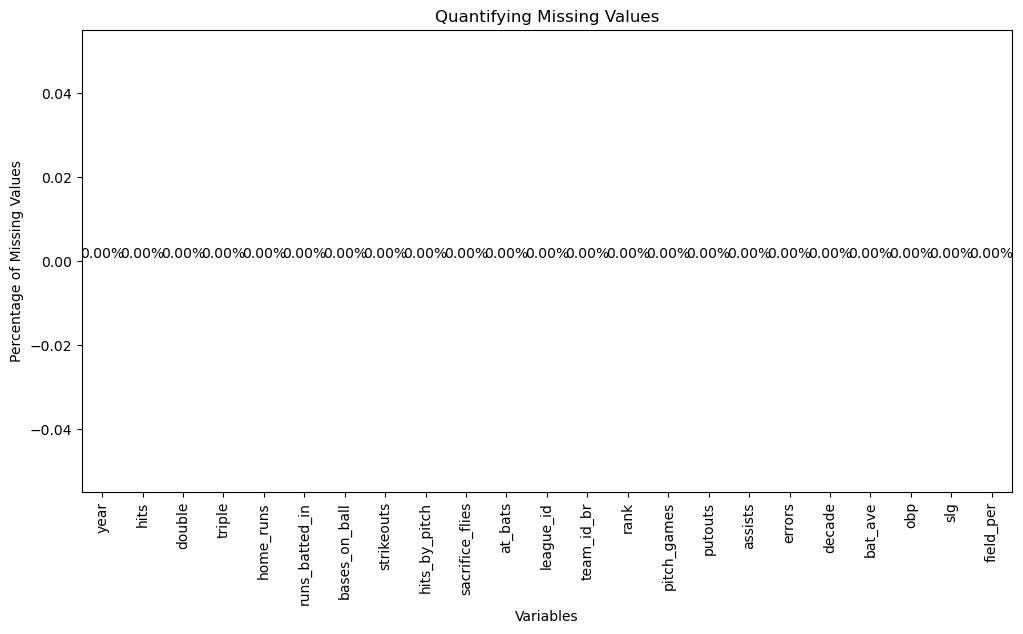

In [817]:
missing = X_train_impute.isnull().mean()
missing.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(missing):
    plt.annotate(f'{value:.2%}', xy=(i, value), ha='center', va='bottom')

With this, all the columns or variables with null values present have all been imputed. All null values can all removed from the columns and replaced with a value generated by the imputation methods used. Different variables have different imputation methods and all methods are attempted with one or none being chosen depending on the model score output.

<a id = 'numericaltransform'></a>
### **Numerical Transformation**

The majority of the data in the columns are not viable or ideal for the prediction model to utilise. Therefore, data needs to be transformed to make it suitable for the prediction model. The target variable, ‘salary’ does not need to be transformed or changed to not compromise the prediction process. This is to ensure that the predictions are accurate and reliable. Transformation techniques are attempted on every numerical variable except for salary and the model score is recorded to determine which technique would be the most suitable and would also improve the model score. 

To preprocess the data, diagnostic plots are used to visualise the distribution of the values in the column. The plots consist of histograms, Q-Q plots and box plots. The columns that are transformed are ‘hits’, ‘double’, ‘triple’, ‘at_bats’, ‘pitch_games’, ‘putouts’, ‘assists’, ‘bat_ave’, ‘field_per’. The different transformers used and attempted are Logarithmic Transformer, Reciprocal Transformer, Power Transformer, Box-Cox Transformer, and Yeo Johnson Transformer. Some columns or variables are unable to use the Logarithmic, Reciprocal, and Box-Cox Transformers as they contain either negative values or zeros. The scores for each relevant method for each variable is shown below:

**Transformation of Numeric Columns**

-------------------------------
current
- train_r-sq: 0.22848603071017592 
-  test_r-sq: 0.22565733163895674

-------------------------------
transformation: hits

log
nil

reciprocal
nil

power (root)
- train_r-sq: 0.22904446343172968 
-  test_r-sq: 0.22579820440041765nil

power (power)
- train_r-sq: 0.22892882037758977 
-  test_r-sq: 0.22572879654395928

BoxCox
nil

yeojohnson **(best)**
- train_r-sq: 0.2296331825128075 
-  test_r-sq: 0.22615512554168526

-------------------------------
transformation: double

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.22965823870919044 
-  test_r-sq: 0.22587052777714844

power(power)
- train_r-sq: 0.2296220347553276 
-  test_r-sq: 0.2257934292816075

boxcox
nil

yeojohnson **(best)**
- train_r-sq: 0.2297623435890045 
-  test_r-sq: 0.22616608792433412

-------------------------------
transformation: triple

log
nil

reciprocal
nil

power(root) **(best)**
- train_r-sq: 0.2302141450033074 
-  test_r-sq: 0.22448859011863231

power(power)
- train_r-sq: 0.2300261189826922 
-  test_r-sq: 0.22424490072283976

Boxcox
nil

yeojohnson
- train_r-sq: 0.22976613990639072 
-  test_r-sq: 0.223872554936

-------------------------------
transformation: home_runs

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.2265972265416848 
-  test_r-sq: 0.22015650533515585

power(power)
- train_r-sq: 0.2266128871068125 
-  test_r-sq: 0.22010266606506312

boxcox
nil

yeojohnson
- train_r-sq: 0.22660408604997906 
-  test_r-sq: 0.22013464322363896

-------------------------------
transformation: runs_batted_in

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.2287112920166533 
-  test_r-sq: 0.2239377940620123

power(power)
- train_r-sq: 0.2287084223553102 
-  test_r-sq: 0.2239419386374777

boxcox
nil

yeojohnson
- train_r-sq: 0.22856298396301322 
-  test_r-sq: 0.22374734401828955

-------------------------------
transformation: base_on_balls

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.2223034893799105 
-  test_r-sq: 0.21926140297574215

power(power)
- train_r-sq: 0.22166131575373937 
-  test_r-sq: 0.21881587054768437

boxcox
nil

yeojohnson
- train_r-sq: 0.2221292620629255 
-  test_r-sq: 0.2189478698750823

-------------------------------
transformation: at_bats

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.23003290331173554 
-  test_r-sq: 0.22580549409221795

power(power)
- train_r-sq: 0.2299312025324699 
-  test_r-sq: 0.22568723028220028

boxcox
nil

yeojohnson **(best)**
- train_r-sq: 0.23033006659699085 
-  test_r-sq: 0.2261091863010556

-------------------------------
transformation: pitch_games

log
- train_r-sq: 0.23086310094673312 
-  test_r-sq: 0.22739147457987208

reciprocal
- train_r-sq: 0.22667447809798702 
-  test_r-sq: 0.221854459220312

power(root) **(best)**
- train_r-sq: 0.2316044461221407 
-  test_r-sq: 0.22823344014321145

power(power)
- train_r-sq: 0.23157729741895117 
-  test_r-sq: 0.22821735452378022

boxcox
- train_r-sq: 0.23133249064062755 
-  test_r-sq: 0.2279652176657434

yeojohnson
- train_r-sq: 0.23143403104382265 
-  test_r-sq: 0.22814069941040205

-------------------------------
transformation: putouts

log
nil

reciprocal
nil

power(root) **(best)**
- train_r-sq: 0.23167363175800249 
-  test_r-sq: 0.22817347033058277

power(power)
- train_r-sq: 0.23164465359333675 
-  test_r-sq: 0.22811093144406047

boxcox
nil

yeojohnson
- train_r-sq: 0.2316290386991151 
-  test_r-sq: 0.22801552885746645

-------------------------------
transformation: assists

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.2325889012106389 
-  test_r-sq: 0.22900316915880514

power(power)
- train_r-sq: 0.23261488118820417 
-  test_r-sq: 0.22901403825643052

boxcox
nil

yeojohnson **(best)**
- train_r-sq: 0.23277611990605684 
-  test_r-sq: 0.22904079502499997

-------------------------------
transformation: errors

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.23115092916478486 
-  test_r-sq: 0.2277034079913558

power(power)
- train_r-sq: 0.23108686436178616 
-  test_r-sq: 0.22768753859698942

boxcox
nil

yeojohnson
- train_r-sq: 0.23103690111756903 
-  test_r-sq: 0.2277419856652192

-------------------------------
transformation: bat_ave

log
nil

reciprocal
nil

power(root) **(best)**
- train_r-sq: 0.23282825488664094 
-  test_r-sq: 0.22906723639940707

power(power)
- train_r-sq: 0.23281073944024233 
-  test_r-sq: 0.22905663447666824

boxcox
nil

yeojohnson
- train_r-sq: 0.23281967004549697 
-  test_r-sq: 0.22906525054339721

-------------------------------
transformation: obp

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.23279860046467848 
-  test_r-sq: 0.22909500804513283

power(power)
- train_r-sq: 0.23279163238785083 
-  test_r-sq: 0.22909976188111647

boxcox
nil

yeojohnson
- train_r-sq: 0.23282408601917037 
-  test_r-sq: 0.2290699919751299

-------------------------------
transformation: slg

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.23282703105669578 
-  test_r-sq: 0.22903467916261078

power(power)
- train_r-sq: 0.23282920776979366 
-  test_r-sq: 0.22903198764672006

boxcox
nil

yeojohnson
- train_r-sq: 0.23282495486896193 
-  test_r-sq: 0.22906087421983012

-------------------------------
transformation: field_per

log
nil

reciprocal
nil

power(root)
- train_r-sq: 0.23272154223968833 
-  test_r-sq: 0.229095177444947

power(power)
- train_r-sq: 0.23271704539352156 
-  test_r-sq: 0.22908973238271357

boxcox
nil

yeojohnson
- train_r-sq: 0.23301508591394626 
-  test_r-sq: 0.22887907101582639

**Methods with the text '(best)' beside them are used on their respective variables**


C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


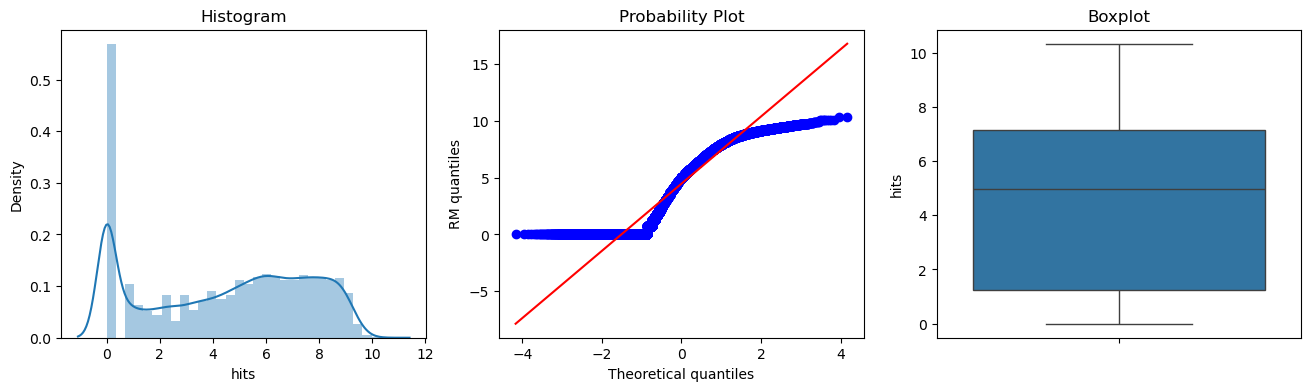

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


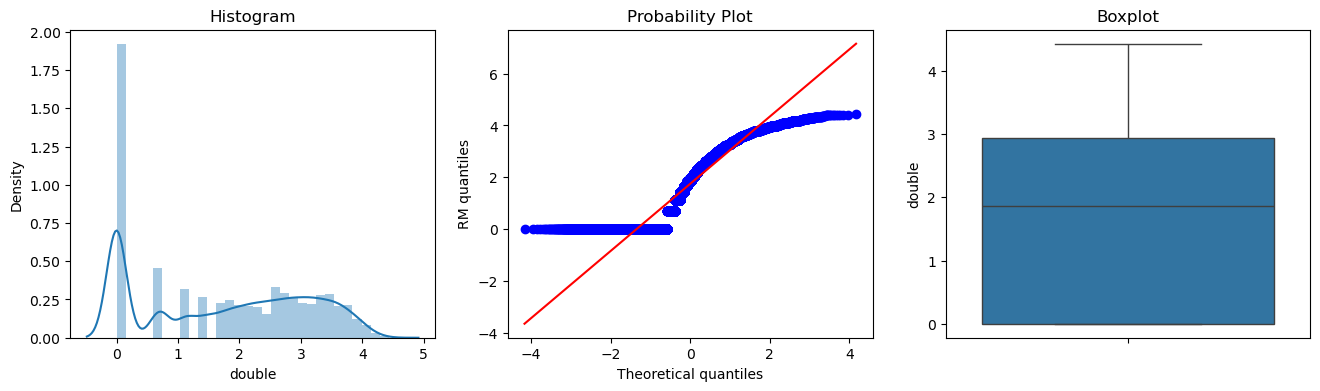

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


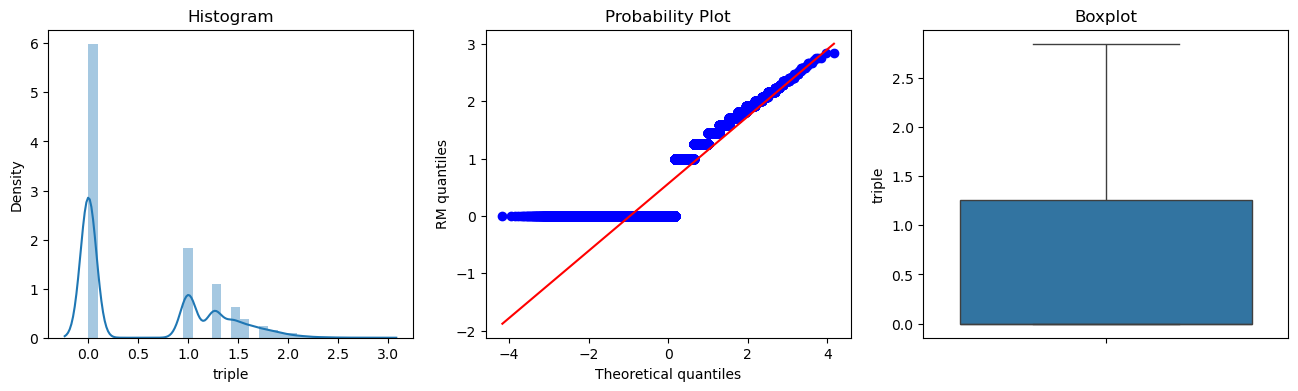

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


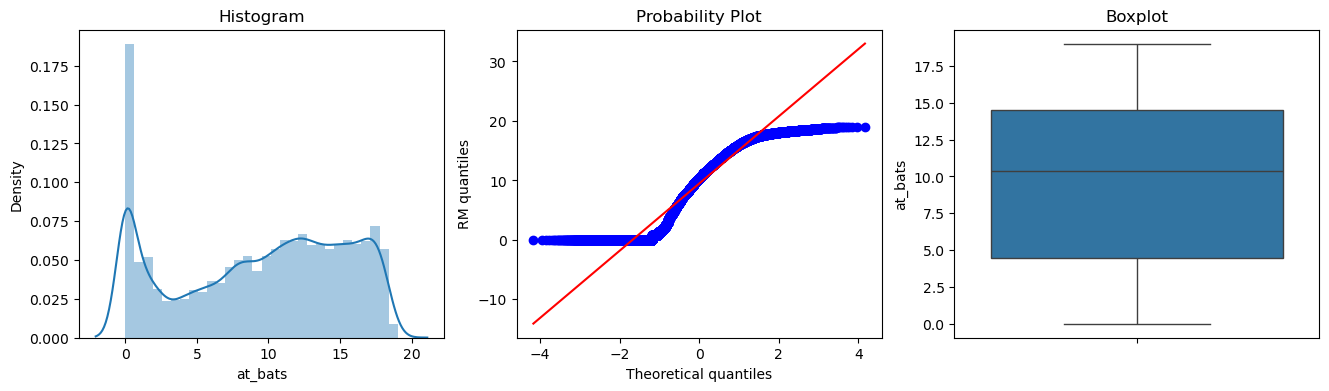

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


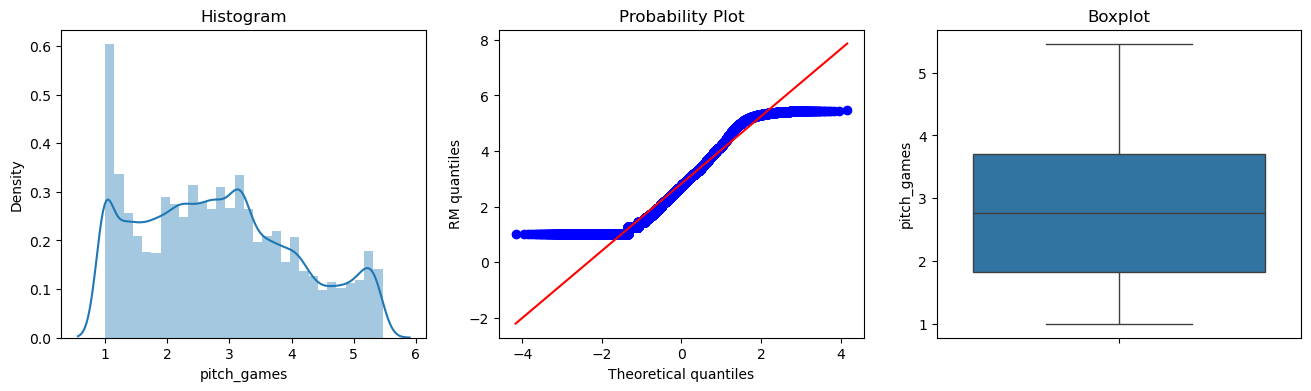

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


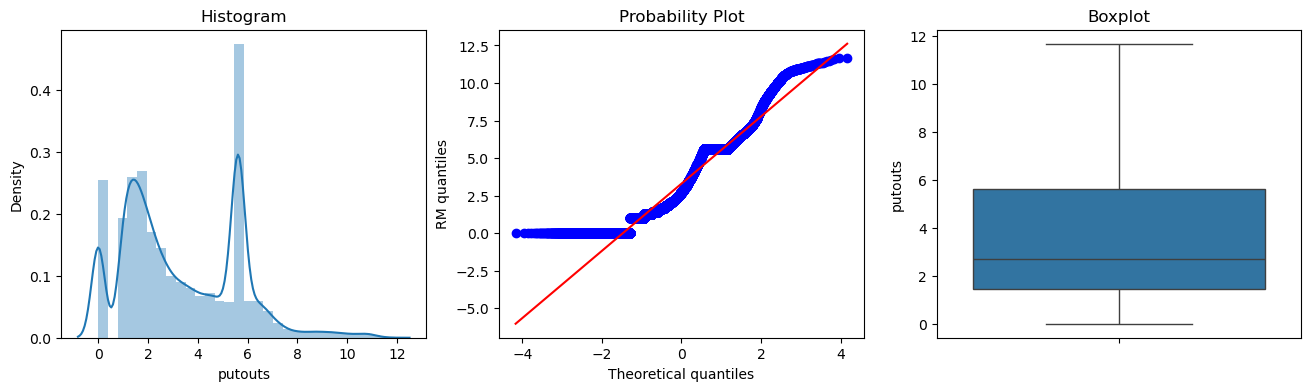

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


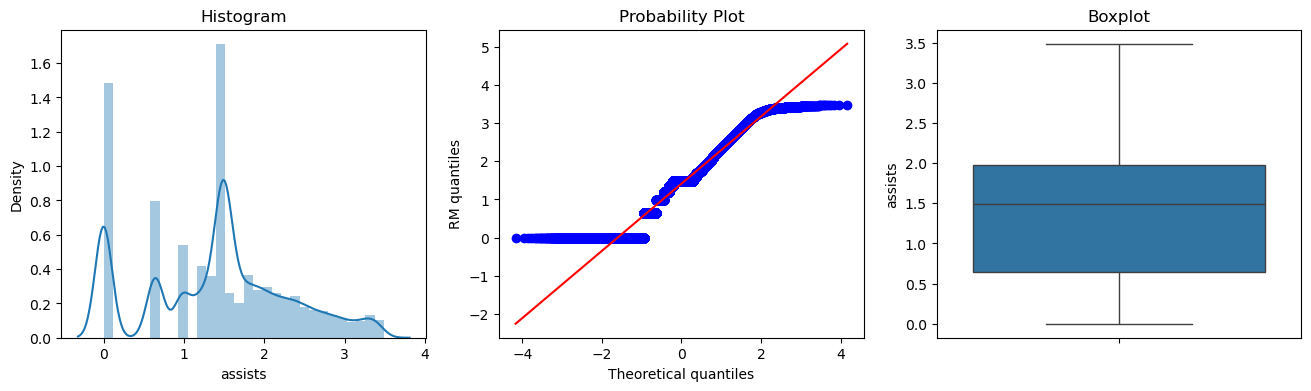

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


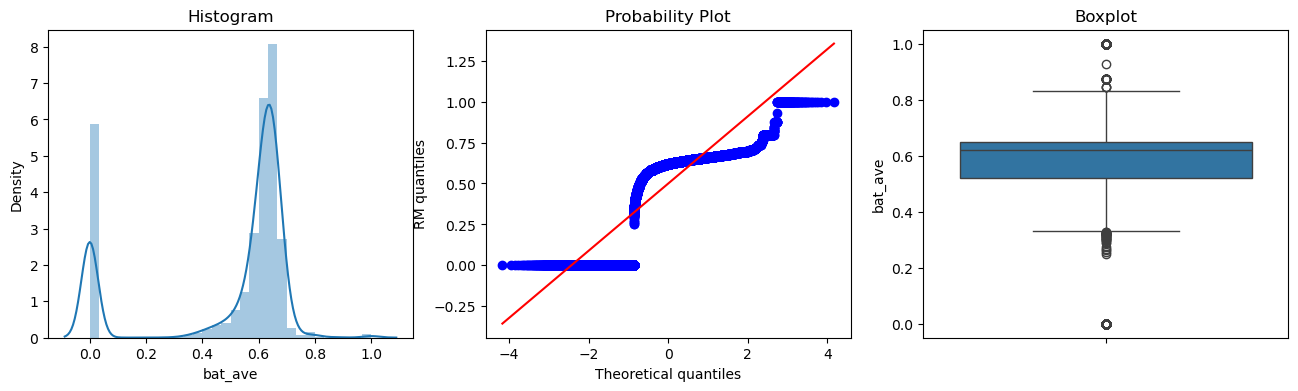

C:\Users\louis\AppData\Local\Temp\ipykernel_27608\543013529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


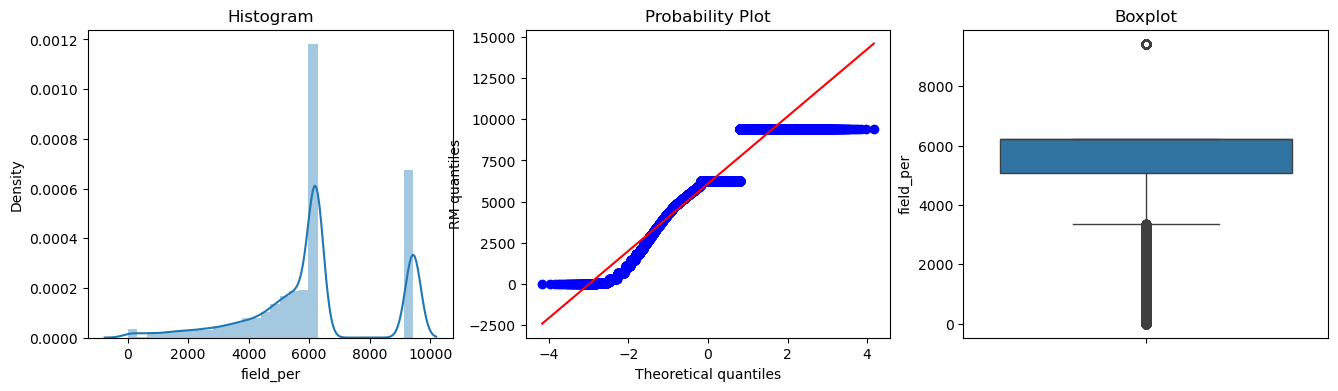

In [818]:
columns = ['hits', 'double', 'triple', 'at_bats', 'pitch_games', 'putouts', 'assists', 'bat_ave', 'field_per']
for col in columns:
    diagnostic_plots(X_train_transform, col)

The columns, ‘hits’, ‘double’, ‘at_bats’, ‘assists’, and ‘field_per’ are transformed using the Yeo Johnson transformer. The columns, ‘triple’, ‘pitch_games’, ‘putouts’, and ‘bat_ave’ are transformed using Power Transformer. As seen in the diagnostic plots, the charts are centralised and the plots are mostly following the line in the Q-Q plot. Some of the columns stated are normal, but some of them are not normal and their histograms are skewed. Although it might not be normal, the data is less prone to be affected by outliers and looks more general as compared to before transformation. The only exception would be the columns, 'bata_ave' and 'field_per' as they still contain some outliers but lesser than before. With this, data in the numeric variables look more normal or more uniform and decent as compared to before the transformation. With these changes made to the numeric variables stated, the data looks more suitable to be used in the prediction model after transformation. Some other columns are not transformed although transformation is attempted since the scores did not improve. Since the overall objective is to make the model score better, we will only select the techniques or methods that result in an increase.

<a id = 'outliers'></a>
### **Outliers**

Different numeric variables have different distributions of outliers. For example, some of the columns such as ‘slg’, ‘obp’, ‘bat_ave’, and ‘field_per’ have outliers on both tails while the columns, ‘home_runs’, ‘runs_batted_in’, ‘base_on_balls’, ‘strikeouts’, ‘hits_by_pitches’, ‘sacrifice_flies’, and ‘errors’ have outliers on only one tail (top). Some of the columns after transformation have no more outliers, while some outliers remain. Outlier handling methods include winsorisation, capping and zero-coding. All methods are tested on each variable with outliers and the scores are listed below:

Outlier Handling

-------------------------------
current
- train_r-sq: 0.23301508591394626 
-  test_r-sq: 0.22887907101582639
 
-------------------------------
Outlier: home_runs

windsorise(quantiles)
- train_r-sq: 0.2319181859168764 
-  test_r-sq: 0.2268978044839668

windsorise(gaussian)
- train_r-sq: 0.23072086440330652 
-  test_r-sq: 0.225059019754613

windsorise(iqr)
- train_r-sq: 0.23078121828481757 
- test_r-sq: 0.22512555259323708

windsorise(mad)
- train_r-sq: 0.23112304686441454 
-  test_r-sq: 0.2251578219890502

zerocoding
- train_r-sq: 0.2307589525273137 
-  test_r-sq: 0.22510507970896898

-------------------------------
Outlier: runs_batted_in

windsorise(quantiles)
- train_r-sq: 0.23222093302826063 
-  test_r-sq: 0.22852767999496737

windsorise(gaussian)
- train_r-sq: 0.23108702668386694 
-  test_r-sq: 0.22759961741727552

windsorise(iqr)
- train_r-sq: 0.23093221857608726 
-  test_r-sq: 0.22749320739810142

windsorise(mad)
- train_r-sq: 0.23214943254172515 
-  test_r-sq: 0.22839450401839634

zerocoding
- train_r-sq: 0.2309743909498142 
-  test_r-sq: 0.22753209025572085

-------------------------------
Outlier: base_on_balls

windsorise(quantiles)
- train_r-sq: 0.23168013444810298 
-  test_r-sq: 0.22706110076103736

windsorise(gaussian)
- train_r-sq: 0.2230575908289203 
-  test_r-sq: 0.22217226171747717

windsorise(iqr)
- train_r-sq: 0.2245828696090878 
-  test_r-sq: 0.2225032837920743

windsorise(mad)
- train_r-sq: 0.2240812023944695 
-  test_r-sq: 0.22304463774502425

zerocoding
- train_r-sq: 0.22471766351075173 
-  test_r-sq: 0.22253286267808325

-------------------------------
Outlier: strike_outs

windsorise(quantiles)
- train_r-sq: 0.23250369801489812 
-  test_r-sq: 0.2270647447621582

windsorise(gaussian)
- train_r-sq: 0.22794152079964225 
-  test_r-sq: 0.22072075167376182

windsorise(iqr)
- train_r-sq: 0.22933481979092918 
-  test_r-sq: 0.22292735080366644

windsorise(mad)
- train_r-sq: 0.22691670568236655 
-  test_r-sq: 0.2194521954830838

zerocoding
- train_r-sq: 0.22887636688580348 
-  test_r-sq: 0.22233214415127645

-------------------------------
Outlier: hits_by_pitches

windsorise(quantiles)
- train_r-sq: 0.2329771284256522 
-  test_r-sq: 0.2291090169807909

windsorise(gaussian) **(best)**
- train_r-sq: 0.23333149919263685 
-  test_r-sq: 0.22939566156926017

windsorise(iqr)
- train_r-sq: 0.23327610064242021 
-  test_r-sq: 0.2293538564138461

windsorise(mad) - low variation
nil

zerocoding
- train_r-sq: 0.23319380755337893 
-  test_r-sq: 0.22933119193196616

-------------------------------
Outlier: sacrifice_flies

windsorise(quantiles)
- train_r-sq: 0.23334286220055023 
-  test_r-sq: 0.2294064081636532

windsorise(gaussian)
- train_r-sq: 0.23332478585005623 
-  test_r-sq: 0.22940426626457677

windsorise(iqr)
- train_r-sq: 0.23332860161360147 
-  test_r-sq: 0.22938478685923125

windsorise(mad) **(best)**
- train_r-sq: 0.23334751217936645 
-  test_r-sq: 0.22946354674697833

zerocoding
- train_r-sq: 0.2333278426583979 
-  test_r-sq: 0.2293852728780328

-------------------------------
Outlier: bat_ave

windsorise(quantiles)
- train_r-sq: 0.23328232740091037 
-  test_r-sq: 0.22946502354637088

windsorise(gaussian)
- train_r-sq: 0.23267529746261084 
-  test_r-sq: 0.2292037187861975

windsorise(iqr)
- train_r-sq: 0.23287680979768643 
-  test_r-sq: 0.22926011445129657

windsorise(mad)
- train_r-sq: 0.23279925418450687 
-  test_r-sq: 0.2292966707004236

zerocoding
- train_r-sq: 0.2328132261493232 
-  test_r-sq: 0.2292429793394276

-------------------------------
Outlier: obp

windsorise(quantiles)
- train_r-sq: 0.2333049287376725 
-  test_r-sq: 0.22947149221984364

windsorise(gaussian)
- train_r-sq: 0.2332362534893634 
-  test_r-sq: 0.22967226084840975

windsorise(iqr)
- train_r-sq: 0.23327370693633864 
-  test_r-sq: 0.22972991685607014

windsorise(mad)
- train_r-sq: 0.23328214269880387 
-  test_r-sq: 0.22985256824754963

zerocoding
- train_r-sq: 0.23323204146809084 
-  test_r-sq: 0.2295954776162885

-------------------------------
Outlier: slg

windsorise(quantiles)
- train_r-sq: 0.23334311385334705 
-  test_r-sq: 0.22944670343141416

windsorise(gaussian)
- train_r-sq: 0.2333847772402644 
-  test_r-sq: 0.22943675256393758

windsorise(iqr)
- train_r-sq: 0.23337082186021818 
-  test_r-sq: 0.2294000986006366

windsorise(mad)
- train_r-sq: 0.23338107765828553 
-  test_r-sq: 0.22943749473068953

zerocoding **(best)**
- train_r-sq: 0.23340955167758626 
-  test_r-sq: 0.22941776964841165

-------------------------------
Outlier: field_per

windsorise(quantiles)
- train_r-sq: 0.23341856548409967 
-  test_r-sq: 0.22941761826683194

windsorise(gaussian)
- train_r-sq: 0.23331626657719984 
-  test_r-sq: 0.22982330272276708

windsorise(iqr)
- train_r-sq: 0.23362527138562483 
-  test_r-sq: 0.23011143882921414

windsorise(mad)
- train_r-sq: 0.23325278953807782 
-  test_r-sq: 0.22960577944329397

zerocoding **(best)**
- train_r-sq: 0.23366170863069713 
-  test_r-sq: 0.23016757082233763

-------------------------------
**Methods with the text '(best)' beside them are used on their respective variables**

Firstly,  the column ‘hits_by_pitch’ is handled using the capping method. Capping is suitable for columns that have severe outliers which have a high chance of being errors or anomalies. Out of all the methods used, the capping method was the most suitable for handling the outliers and also providing a better score.

<Axes: title={'center': 'After Imputation'}, ylabel='hits_by_pitch'>

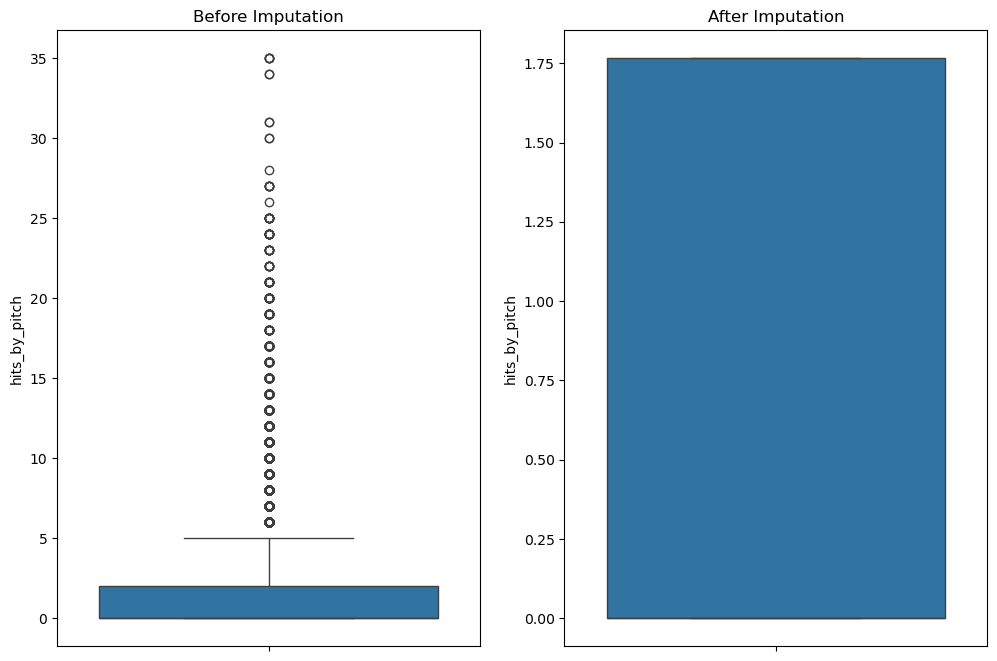

In [819]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=X_train_transform['hits_by_pitch'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_outlier['hits_by_pitch'], ax=axes[1])

Secondly, ‘slg’ and ‘field_per’ are handled using the zero-coding method. This method caps the maximum or minimum values of the variables using a specified arbitrary value. Out of all the methods used, this method was the most suitable for handling the outliers and also providing a better score. The arbitrary values are specified to the end of each tail for both the maximum and the minimum.

<Axes: title={'center': 'After Imputation'}, ylabel='slg'>

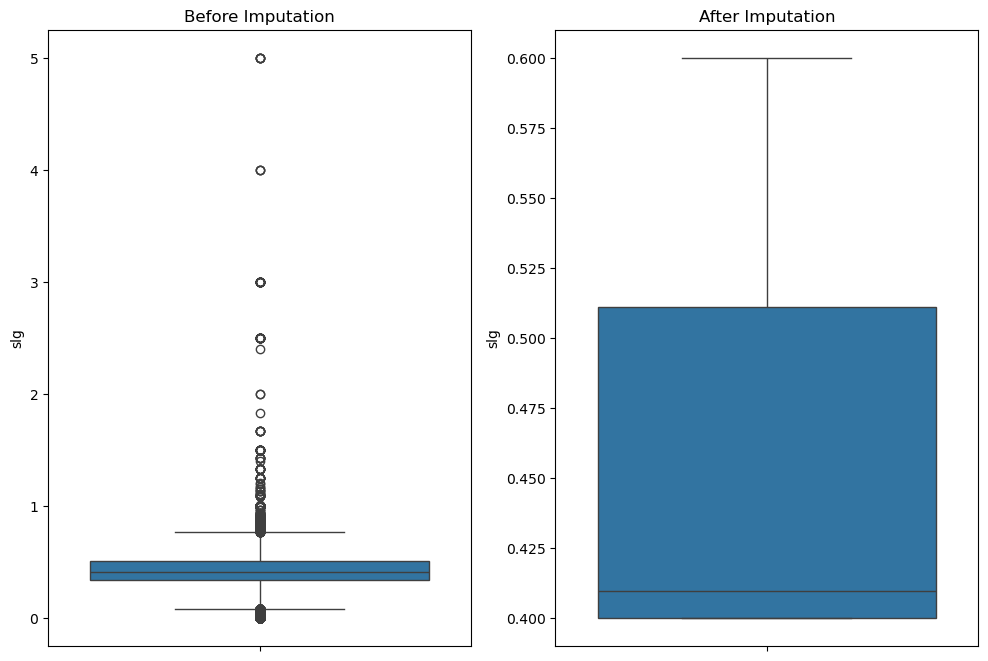

In [820]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=X_train_transform['slg'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_outlier['slg'], ax=axes[1])

<Axes: title={'center': 'After Imputation'}, ylabel='field_per'>

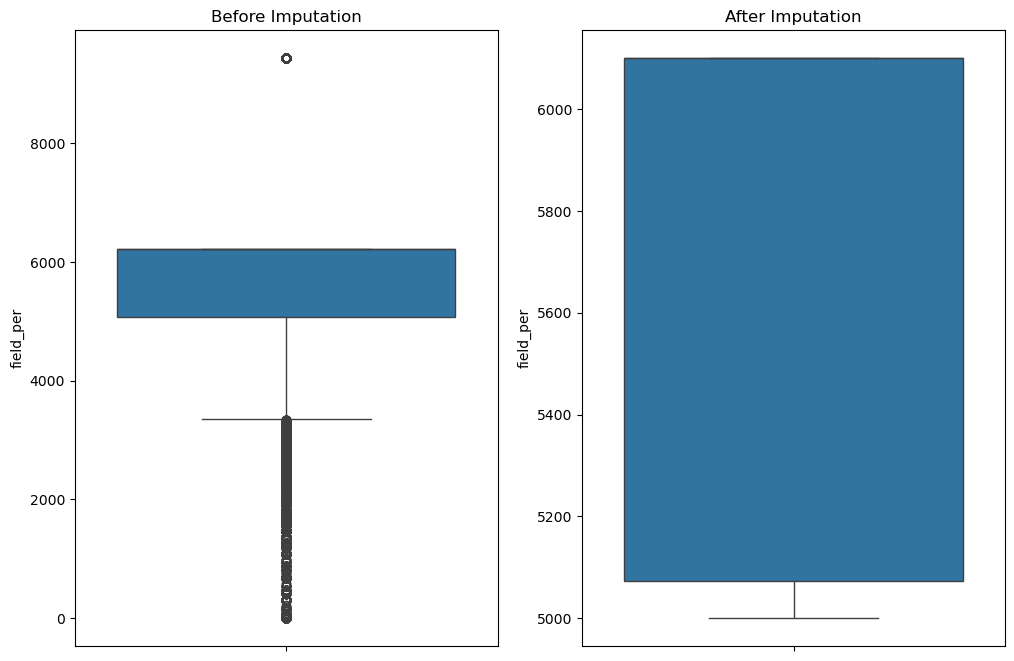

In [821]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=X_train_transform['field_per'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_outlier['field_per'], ax=axes[1])

Lastly, the column, ‘sacrifice_flies’ is handled using the windsoriser with the MAD-median rule method. Among all the different methods attempted, this method was the most suitable in presenting a better score and also handling the outliers within the column.

<Axes: title={'center': 'After Imputation'}, ylabel='sacrifice_flies'>

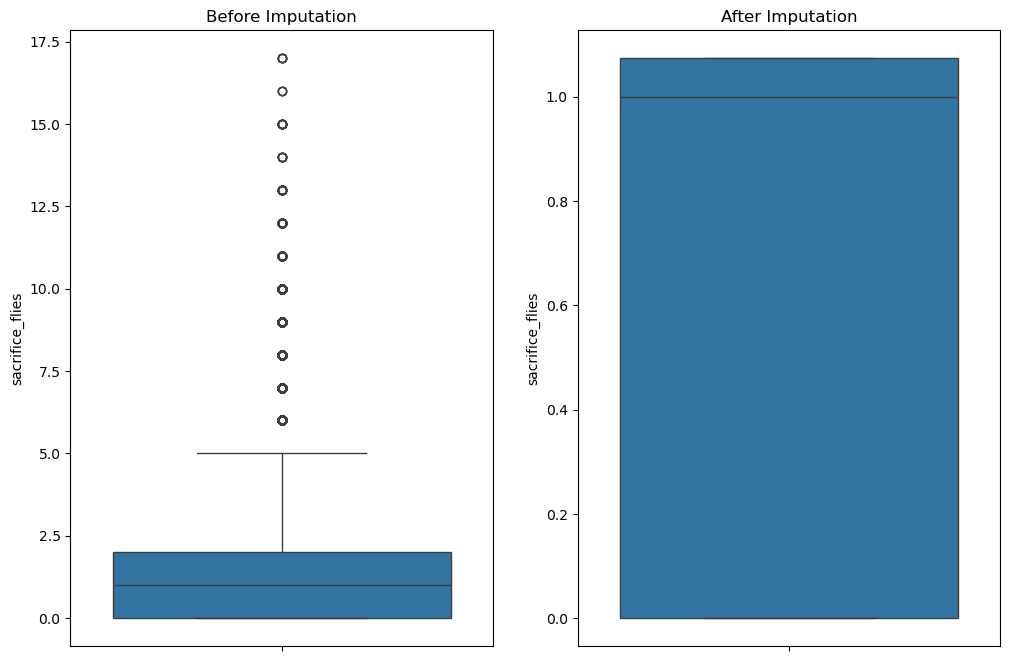

In [822]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=X_train_transform['sacrifice_flies'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_outlier['sacrifice_flies'], ax=axes[1])

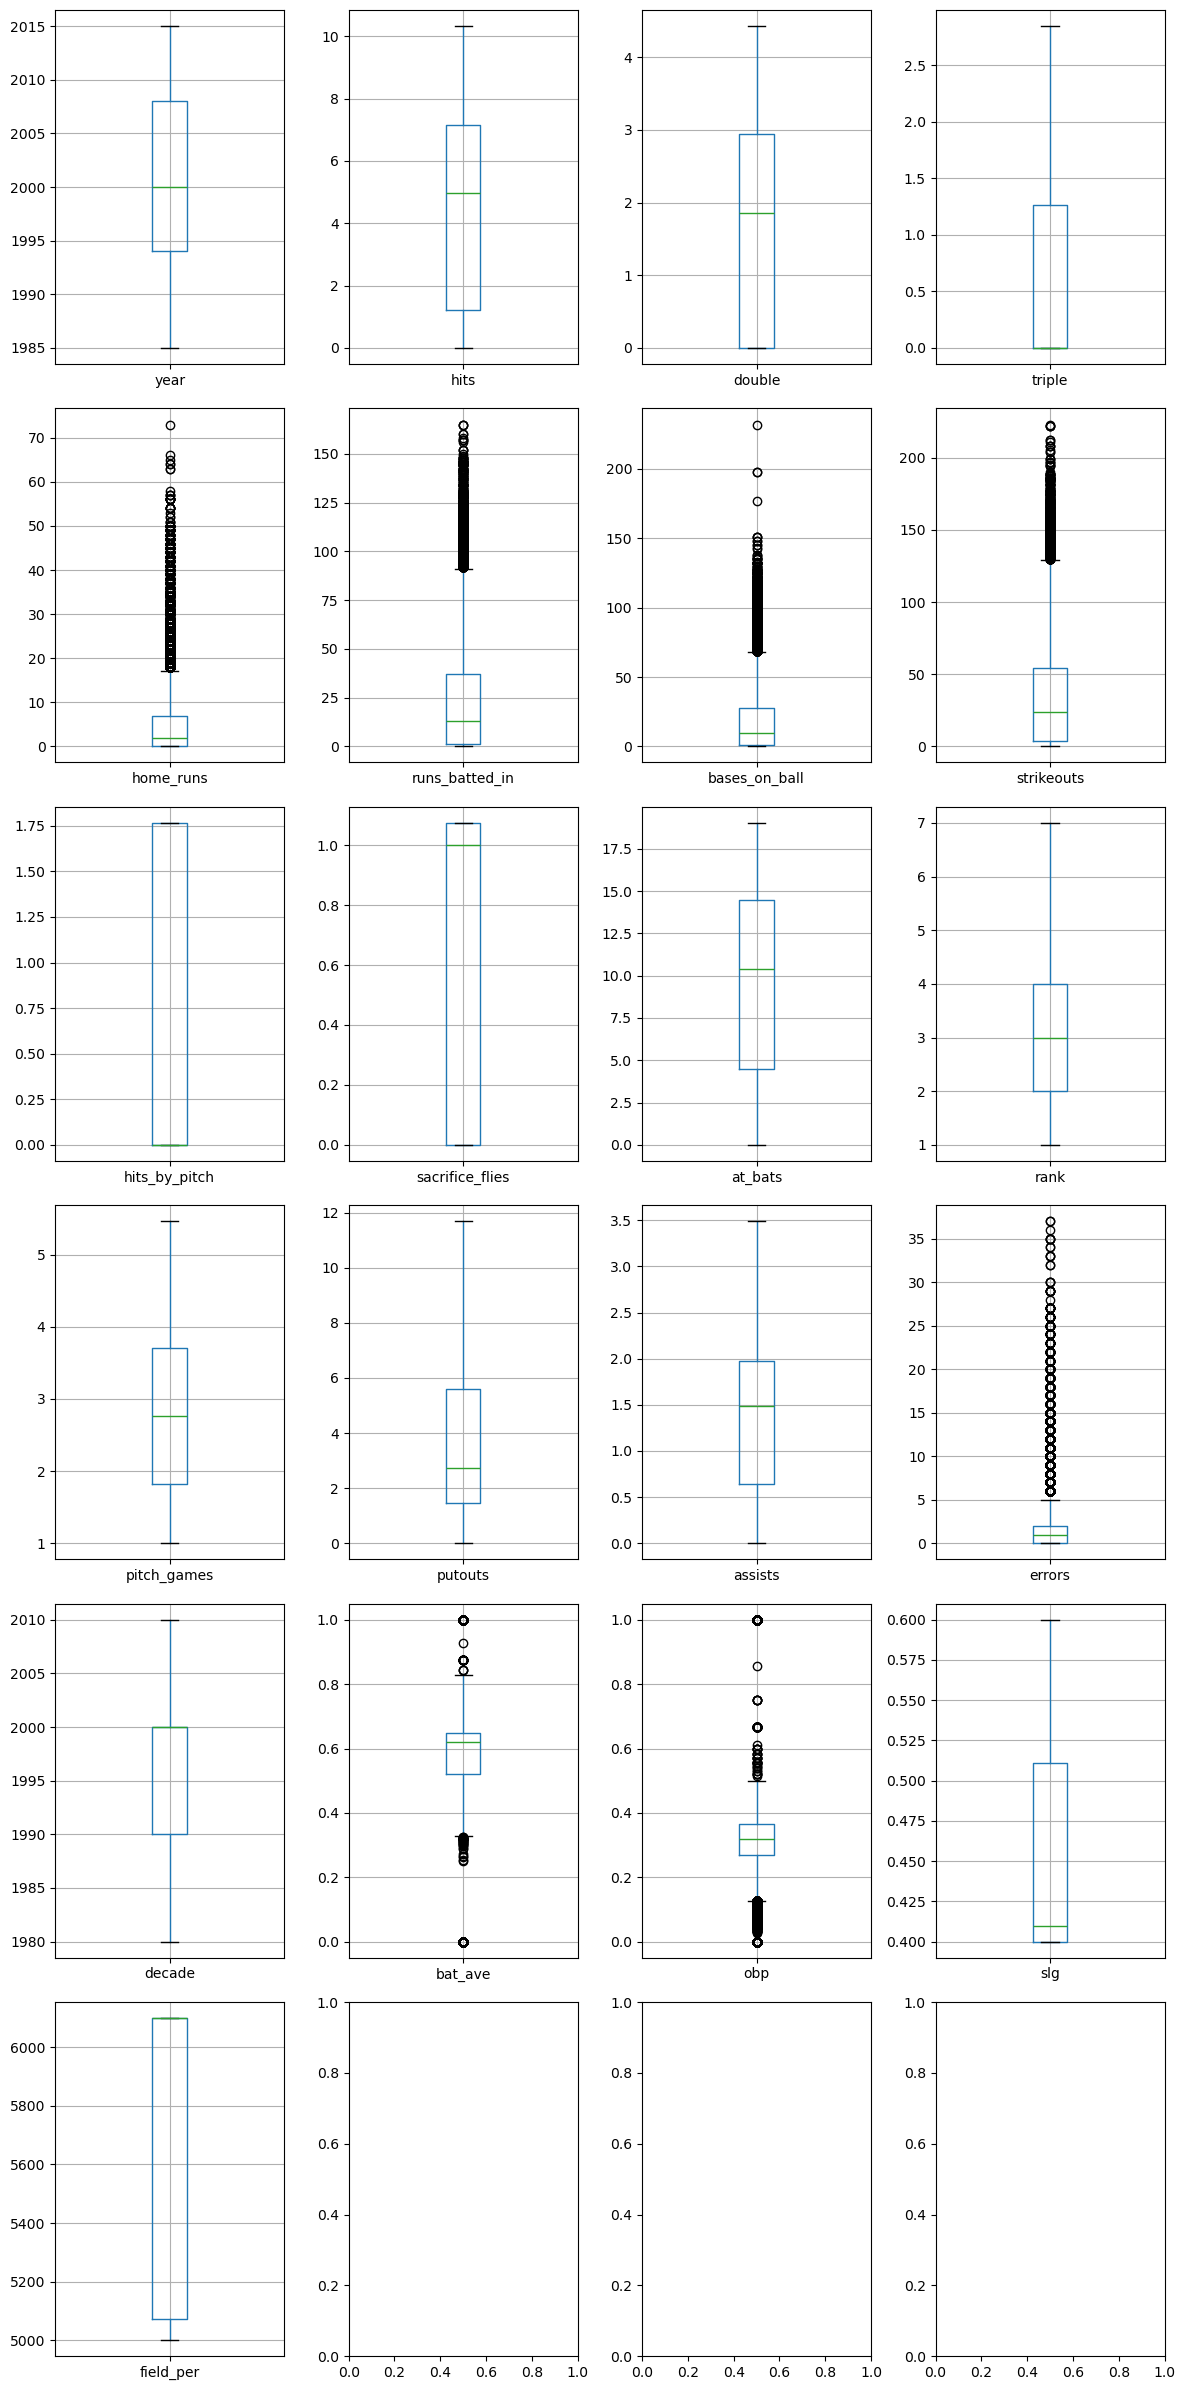

In [823]:
columns = [num for num in X_train_outlier.columns if X_train_outlier[num].dtypes!='O']
num_plots = len(columns)
num_rows = math.ceil(num_plots / 4)  # 4 columns per row

fig, ax = plt.subplots(num_rows, 4, figsize=(12, num_rows * 4))
ax = ax.flatten()

for i, col in enumerate(columns):
   X_train_outlier.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

All methods that use the windsoriser from the feature engine have their folds specified at 0.05, where the limits are the 5th and 95th percentile. 

Some of the columns with outliers are left out since the methods attempted did not provide a better score when tested. With this, all columns that could be outlier handled are completed, resulting in no outliers in the columns specified earlier on. 

<a id = 'discretize'></a>
### **Discretization**

Discretization is used to convert the continuous data in the numerical variables into a set of discrete intervals. This allows us to make the data simpler for analysis. Discretization methods used are the Equal Width Discretiser and the Equal Frequency Discretiser. Each method is tested and attempted on all numerical variables to improve the model score. All methods are tested on each variable with outliers and the scores are listed below:


**Discretisation**

current
- train_r-sq: 0.23340955167758626 
-  test_r-sq: 0.22941776964841165

-------------------------------
discretise: hits
equalwidth **(best)**
- train_r-sq: 0.23346509481118316 
-  test_r-sq: 0.22969094302984605

equalfrequency
- train_r-sq: 0.23308657683267087 
-  test_r-sq: 0.22927270490730822

-------------------------------
discretise: double

equalwidth
- train_r-sq: 0.23345469831816235 
-  test_r-sq: 0.22967024037435602

equalfrequency
- train_r-sq: 0.233128948351086 
-  test_r-sq: 0.2292648544453546

-------------------------------
discretise: triple

equalwidth **(best)**
- train_r-sq: 0.23372905510843922 
-  test_r-sq: 0.22994766044773474

equalfrequency
- train_r-sq: 0.23309936295876155 
-  test_r-sq: 0.23078285575439872

-------------------------------
discretise: home_runs

equalwidth **(best)**
- train_r-sq: 0.2340276660522591 
 test_r-sq: 0.22975864604358054

equalfrequency
- train_r-sq: 0.23216989061827298 
-  test_r-sq: 0.2269371419875218

-------------------------------
discretise: runs_batted_in

equalwidth **(best)**
- train_r-sq: 0.23410046279647567 
-  test_r-sq: 0.22985575642256706

equalfrequency
- train_r-sq: 0.23129502471666064 
-  test_r-sq: 0.2275292853178872

-------------------------------
discretise: base_on_balls

equalwidth
- train_r-sq: 0.23296739663122445 
-  test_r-sq: 0.22853683466865238

equalfrequency
- train_r-sq: 0.2272348462624253 
-  test_r-sq: 0.2241294919764938

-------------------------------
discretise: strikeouts

equalwidth
- train_r-sq: 0.23331841249025254 
-  test_r-sq: 0.22878393385742513

equalfrequency
- train_r-sq: 0.23188756622897122 
-  test_r-sq: 0.2257638124671565

-------------------------------
discretise: hits_by_pitches

equalwidth
- train_r-sq: 0.23409584749104884 
-  test_r-sq: 0.22985050224145476

equalfrequency
- train_r-sq: 0.2338053153518861 
-  test_r-sq: 0.2296050601442986

-------------------------------
discretise: sacrifice_flies

equalwidth **(best)**
- train_r-sq: 0.23410518439695682 
-  test_r-sq: 0.2298636454401657

equalfrequency
- train_r-sq: 0.23418804579703056 
-  test_r-sq: 0.22974355136921787

-------------------------------
discretise: at_bats

equalwidth
- train_r-sq: 0.2337796739168816 
-  test_r-sq: 0.22909982494629466

equalfrequency
- train_r-sq: 0.2334669439448065 
-  test_r-sq: 0.22878701601996443

-------------------------------
discretise: pitch_games

equalwidth
- train_r-sq: 0.23380187308612665 
-  test_r-sq: 0.2294871586176871

equalfrequency
- train_r-sq: 0.23336395940380927 
-  test_r-sq: 0.22941576982978817

-------------------------------
discretise: putouts

equalwidth
- train_r-sq: 0.23408459459816666 
-  test_r-sq: 0.22995423949028915

equalfrequency
- train_r-sq: 0.23410127962515137 
-  test_r-sq: 0.22974002271099836

-------------------------------
discretise: assists

equalwidth **(best)**
- train_r-sq: 0.2341377933545571 
-  test_r-sq: 0.22997011767968223

equalfrequency
- train_r-sq: 0.23401518532376864 
-  test_r-sq: 0.2297871980117242

-------------------------------
discretise: errors

equalwidth
- train_r-sq: 0.2340006737311826 
-  test_r-sq: 0.22981337716964423

equalfrequency
- train_r-sq: 0.23277451474428967 
-  test_r-sq: 0.2297109329596534

-------------------------------
discretise: bat_ave

equalwidth
- train_r-sq: 0.2341283774939532 
-  test_r-sq: 0.22995225812221876

equalfrequency **(best)**
- train_r-sq: 0.23424193441210195 
-  test_r-sq: 0.22988690959596114

-------------------------------
discretise: obp

equalwidth **(best)**
- train_r-sq: 0.23430898616419282 
-  test_r-sq: 0.22981631572057704

equalfrequency
- train_r-sq: 0.23408552694450446 
-  test_r-sq: 0.22976176157420625

-------------------------------
discretise: slg

equalwidth
- train_r-sq: 0.23405152348675207 
-  test_r-sq: 0.2297353794473217

equalfrequency
- train_r-sq: 0.23413289920059455 
-  test_r-sq: 0.22980765395488045

-------------------------------
discretise: field_per

equalwidth
- train_r-sq: 0.23408130607592614 
-  test_r-sq: 0.22975837036002034

equalfrequency
- train_r-sq: 0.23396657130804177 
-  test_r-sq: 0.22953196265421127

-------------------------------
**Methods with the text '(best)' beside them are used on their respective variables**

Firstly, the columns, ‘hits’, ‘triple’, ‘home_runs’, ‘runs_batted_in’, ‘sacrifice_flies’, and ‘assists’ are discretised using the Equal Width Discretiser. This means that the variables in these columns are assigned intervals of the same width as shown below, which in this case in 10 bins. Overall, for these columns, this method provides a higher scoring for the model as compared to the frequency method.

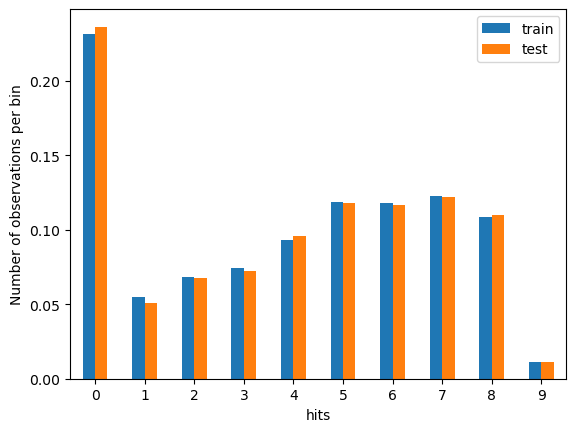

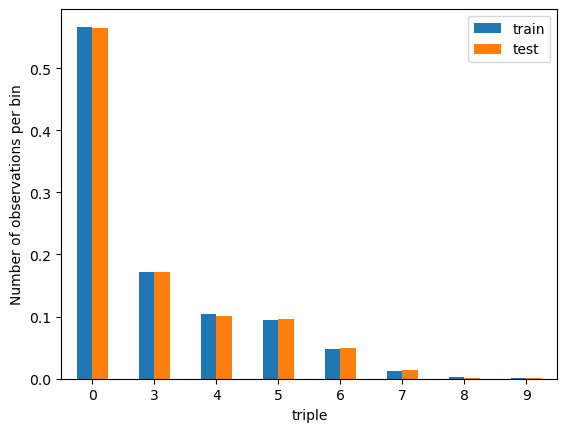

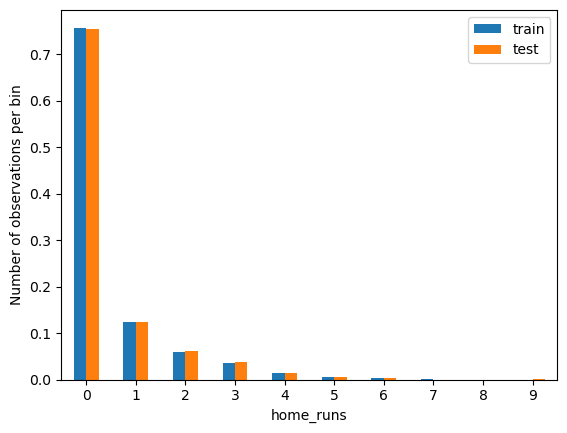

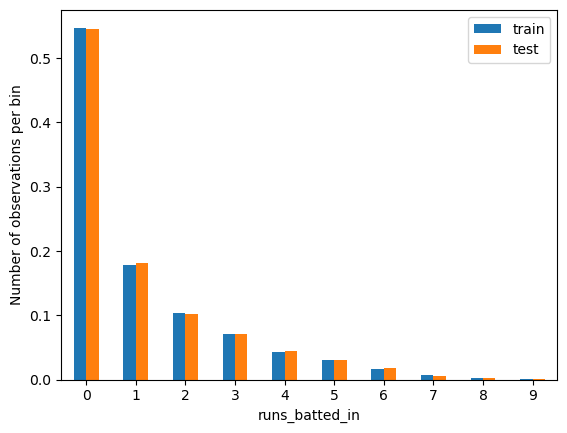

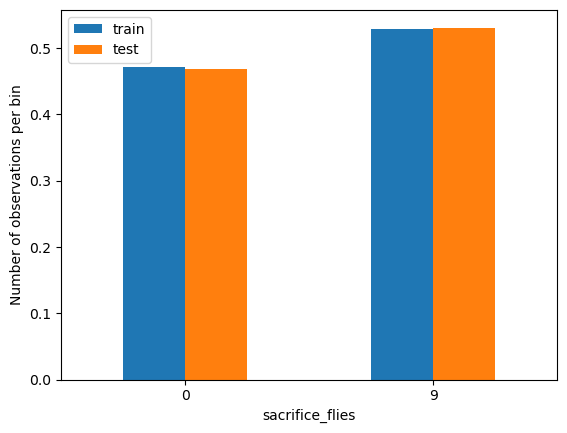

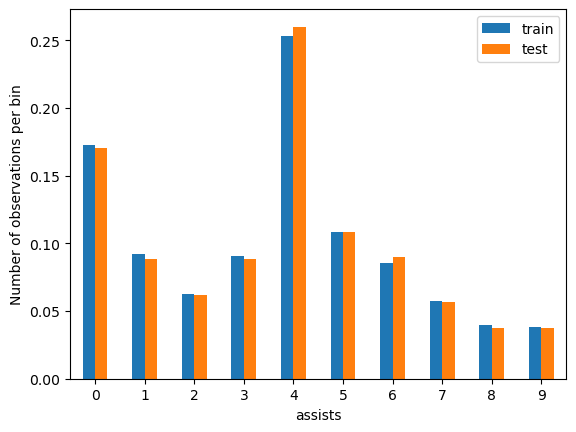

In [824]:
columns = ['hits', 'triple', 'home_runs', 'runs_batted_in', 'sacrifice_flies', 'assists']
for column in columns:
    t1 = X_train_discretise.groupby([column])[column].count() / len(X_train_discretise)
    t2 = X_test_discretise.groupby([column])[column].count() / len(X_test_discretise)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

Secondly, the columns, ‘bat_ave’ and ‘obp’ are discretised using the Equal Frequency Discretiser. This means that the values in the column ensure a uniform distribution of data across a range of values as shown below, which can enhance the handling of skewed data and outliers. Overall, for these columns, this method provides a higher scoring for the model as compared to the width method.

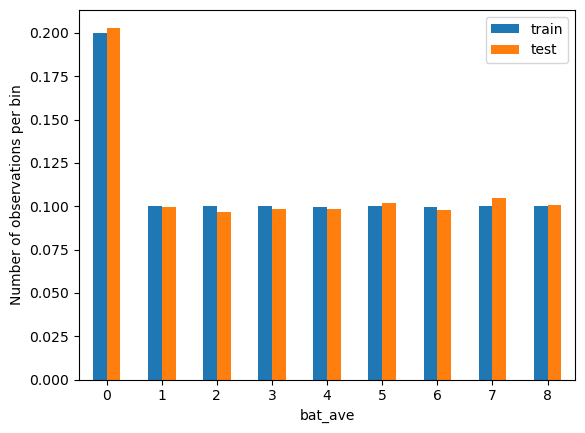

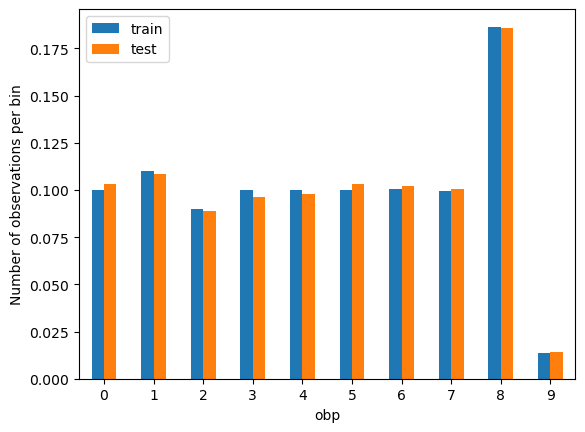

In [825]:
columns = ['bat_ave', 'obp']
for column in columns:
    t1 = X_train_discretise.groupby([column])[column].count() / len(X_train_discretise)
    t2 = X_test_discretise.groupby([column])[column].count() / len(X_test_discretise)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

Although some columns are not discretised, methods are attempted on the columns but the model score would be higher without any discretisation methods.

<a id = 'categoricaltransform'></a>
### **Categorical Encoding**


Categorical encoding is used to ensure that the categorical variables are transformed so that they can be used by the model. Different encoding methods are attempted on all categorical variables. These methods are One Hot Encoding, Count Frequency Encoder, Ordinal Encoder, and Mean Encoder. Since the ‘rank’ column is already an integer, we do not need to transform this variable. As for the other two categorical columns, ‘league_id’ and ‘team_id’, are transformed such that they are displayed as numbers to be read by the model.

All methods are tested on each variable with outliers and the scores are listed below:

encode: league_id

Due to the low number of unique values in league_id, I used one hot encoding first such that there are easier to determine the results. Different methods are then explored after that.

-----------------------------
test encode: league_id

ohe:

encode: team_id_br

ohe
- train_r-sq: 0.25263171473786417 
-  test_r-sq: 0.2506536907114074

ordinal
- train_r-sq: 0.23538792972821043 
-  test_r-sq: 0.23125199720315592

countfreq
- train_r-sq: 0.23716829103984693 
-  test_r-sq: 0.2337553747001342

orderedordinal
- train_r-sq: 0.24591770058527562 
-  test_r-sq: 0.24240662860652484

mean
- train_r-sq: 0.24579341878081917 
-  test_r-sq: 0.2424263362739093

-----------------------------
ordinal:

encode: team_id_br

ohe **(best)**
- train_r-sq: 0.2526317147378654 
-  test_r-sq: 0.2506536907114085

ordinal
- train_r-sq: 0.23538792972821054 
-  test_r-sq: 0.2312519972031557

countfreq
- train_r-sq: 0.23716829103984693 
-  test_r-sq: 0.2337553747001334

orderedordinal
- train_r-sq: 0.2459177005852754 
-  test_r-sq: 0.2424066286065245

mean
- train_r-sq: 0.24579341878081962 
-  test_r-sq: 0.2424263362739203

-----------------------------
countfreq:

encode: team_id_br

ohe
- train_r-sq: 0.25263171473786417 
-  test_r-sq: 0.25065369071140686

ordinal
- train_r-sq: 0.23538792972821176 
-  test_r-sq: 0.23125199720315748

countfreq
- train_r-sq: 0.23716829103984705 
-  test_r-sq: 0.23375537470013463

orderedordinal
- train_r-sq: 0.2459177005852753 
-  test_r-sq: 0.2424066286065244

mean
- train_r-sq: 0.2457934187808195 
-  test_r-sq: 0.2424263362739466

-----------------------------
orderedordinal:

encode: team_id_br

ohe
- train_r-sq: 0.2526317147378654 
-  test_r-sq: 0.2506536907114085

ordinal
- train_r-sq: 0.23538792972821054 
-  test_r-sq: 0.2312519972031557

countfreq
- train_r-sq: 0.23716829103984693 
-  test_r-sq: 0.2337553747001334

orderedordinal
- train_r-sq: 0.2459177005852754 
-  test_r-sq: 0.2424066286065245

mean
- train_r-sq: 0.24579341878081962 
-  test_r-sq: 0.2424263362739203

-----------------------------
mean:

encode: team_id_br

ohe
- train_r-sq: 0.25263171473786517 
-  test_r-sq: 0.25065369071139143

ordinal
- train_r-sq: 0.23538792972820943 
-  test_r-sq: 0.23125199720315293

countfreq
- train_r-sq: 0.23716829103984782 
-  test_r-sq: 0.23375537470012875

orderedordinal
- train_r-sq: 0.2459177005852754 
-  test_r-sq: 0.24240662860651896

mean
- train_r-sq: 0.24579341878081962 
-  test_r-sq: 0.2424263362739214

**Methods with the text '(best)' beside them are used on their respective variables**

Firstly, the ordinal encoding method is used on the ‘league_id’ column values. Out of all the methods attempted, this method provides a higher score while transforming the values into ordinal numbers to be suitable for the model to interpret. As shown below, this are result of the column values and how they are changed:

In [826]:
X_train_encode['league_id'].head()

169962    0
191414    1
155092    0
143057    0
178655    1
Name: league_id, dtype: int64

Secondly, the one hot encoding method is used on the ‘team_id_br’ column values. Like the ‘league_id’ column, this method provides a higher score while transforming the values into ordinal numbers to be suitable for the model to interpret. This means that each team has their own respective column where 1 is shown when the player is in the team, while 0 is shown when the player is not in the team. A total of 34 columns were created to ensure that each team was accounted for in the dataset, which can be seen below:

In [827]:
for col in X_train_encode.columns:
    if 'team_id_br' in col:
        print(col)
        print(X_train_encode[col].head())
        print('-----------------------------------------------------')

team_id_br_ATL
169962    1
191414    0
155092    0
143057    0
178655    0
Name: team_id_br_ATL, dtype: int32
-----------------------------------------------------
team_id_br_NYY
169962    0
191414    1
155092    0
143057    0
178655    0
Name: team_id_br_NYY, dtype: int32
-----------------------------------------------------
team_id_br_CIN
169962    0
191414    0
155092    1
143057    0
178655    0
Name: team_id_br_CIN, dtype: int32
-----------------------------------------------------
team_id_br_MON
169962    0
191414    0
155092    0
143057    1
178655    0
Name: team_id_br_MON, dtype: int32
-----------------------------------------------------
team_id_br_KCR
169962    0
191414    0
155092    0
143057    0
178655    1
Name: team_id_br_KCR, dtype: int32
-----------------------------------------------------
team_id_br_TEX
169962    0
191414    0
155092    0
143057    0
178655    0
Name: team_id_br_TEX, dtype: int32
-----------------------------------------------------
team_id_br_OAK
1

<a id = 'scalingdata'></a>
### **Scaling**

Scaling is conducted to scale features or variables to a common range or distribution such that they can improve model performance. The purpose of scaling is to ensure that the data is smooth and can be optimized easily. Without scaling, features with different scales might cause numerical instabilities and pose difficulties when they are optimized in the process. Features that have larger scales might dominate the learning process and make the other features with smaller scales less significant. A range of methods are used to determine the best possible scaling method to use. The method is judged based on the score of the model, which can be referenced below:

-------------------------------
current
- train_r-sq: 0.23408552694450446 
-  test_r-sq: 0.22976176157420625

-------------------------------
standard
- train_r-sq: 0.23408552694450424 
-  test_r-sq: 0.22976176157420658

meannormalisation
- train_r-sq: 0.23408552694450424 
-  test_r-sq: 0.22976176157420658

minmax **(best)**
- train_r-sq: 0.23408552694450446 
-  test_r-sq: 0.2297617615742068

maxabsolute
- train_r-sq: 0.23408552694450435 
-  test_r-sq: 0.22976176157420636

center + maxabs
- train_r-sq: 0.23408552694450424 
-  test_r-sq: 0.22976176157420658

robust
- train_r-sq: 0.23408552694450424 
-  test_r-sq: 0.22976176157420647

**Methods with the text '(best)' beside them are used on their respective variables**

--------------------------------
For the dataset, we have decided to use the Min-Max Scaler to scale the data to make it more suitable for the prediction model to optimize and learn. So, conducting the Min-Max Scaling allows the features in the data to scale to a specific range, which is usually between 0 and 1. Overall, this can ensure that the relationships between the data points are not changed but still manage to keep the values within the range defined by the scaler. Since the column names are changed, the chart will not be shown. Here is how the data look like instead:

In [828]:
X_train_scaling

array([[0.56666667, 0.66666667, 0.54594442, ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.33333333, 0.42020077, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.66666667, 0.61159032, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.55555556, 0.49068185, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.77777778, 0.75688341, ..., 0.        , 0.        ,
        0.        ],
       [0.03333333, 0.44444444, 0.37597425, ..., 0.        , 0.        ,
        0.        ]])

<a id = 'others'></a>
### **Others**

Other feature engineering methods such as polynomial expansion and PCA are attempted to improve model performance. Polynomial expansion significantly increases the model score by using the degree of 2. The total number of columns amounts to 1652 after polynomial expansion. PCA is attempted but there were little to no changes to the model score, meaning that there is no significance of conducting PCA on the dataset. Therefore, there is no use of PCA since the model does not improve. This is the result after conducting polynomial expansion:

In [829]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44876, 1652)
(44876,)
(19233, 1652)
(19233,)


<a id = 'machinelearning'></a>
## **Machine Learning Model**

The machine learning model used is a Regression Model. This model allows us to predict the salaries of baseball players as salary is a continuous variable. In another model, a Decision Tree Classifier was attempted to determine another target variable similar to salary, which is the salary category. However, this might be impractical in 2 ways. The first way is to specify the categories using specific percentiles such as the 33rd percentile, and 66th percentile. The second way which is the preferred way is to specify the values using real-world values such as the average of 4.17 million for salaries. The first way is unreliable as it only takes the data from the dataset and does not take into account the actual values. The second way is preferred but not used as one or more categories might have more values, which makes the prediction for the other categories less accurate and reliable. Therefore, the suggested action was to directly predict the baseball players’ salaries as this would also benefit the stakeholders since the predictions provide an accurate value. Although classification might be easier to conduct and predict, regression would generally hold more benefits despite it being much harder to conduct.

For Regression, the Linear Regression Model is used to predict the target values. Linear Regression is used to model a relationship or a best-fit line between a target variable and one or many predictor variables. In this case, the target variable is salary, and the predictor variables are the other features in the dataset. A Naïve Baseline Model is also created to serve as the basis for evaluating the performance of more complex models. They set a baseline for performance to measure the advancements in the other models that were transformed. A default model is also created to see the difference between transformed and untransformed models. The only changes done to the model are all null values being dropped and the categorical variables being mapped to a respective number with no transformation done to the numerical variables.

In order to evaluate the model performance of a linear regression and baseline model, a range of measures can be used, so we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.

- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of the R-square, the more indicative of a better fit and model performance.

The main metric used will be R-Square as the Mean Squared Error is very high due to the scale of the target variable which is in millions. 

<a id = 'naivebaseline'></a>
### **Naive Baseline Model**

These are the scores of the Naïve Baseline Model:

- The Naive Baseline Model's MSE on train data is 9194439229315.25.
- The Naive Baseline Model's MSE on test data is 9086478269298.03.

- The Naive Baseline Model's RMSE on train data is 3032233.37.
- The Naive Baseline Model's RMSE on test data is 3014378.59.

- The Naive Baseline Model's R2 on train data is -0.00.
- The Naive Baseline Model's R2 on test data is -0.0000011818.

The scores shown above are not ideal due to the extremely low R2 and a very high MSE.

<a id = 'default'></a>
### **Default Unchanged Model**

The default model scores are as shown below:

- train_mse: 7297166942466.661 
-  test_mse: 7240080827431.605
- train_r-sq: 0.24010676531035535 
-  test_r-sq: 0.24076764896261638

The scores shown above are much better than the Naïve Baseline Model with a significantly lower MSE and a higher R2. The train and test scores for this model are about 24% better than the Naïve Baseline Model.

<a id = 'final'></a>
### **Final Model**

The transformed model scores are as shown below:

- train_mse: 5857139901990.516 
-  test_mse: 6119887503681.027
- train_r-sq: 0.36296931700676194 
-  test_r-sq: 0.3264833134806957

The scores shown above are better than the Naïve Baseline Model and the default model with a higher R2 and lower MSE. The train and test scores for this model are about 36% better than the Naïve Baseline Model and about 50% better than the default model. 

This means that this model is generally able to predict the results but with quite some errors. The percentage of the response variable variation that is explained by a linear model is 0.362 (3d.p.) for the train data and 0.326 (3d.p.) for the test data. Generally, higher values of R-Square would be better. So, the data can be overall improved to increase the evaluation scores of the linear regression prediction model.

Generally, a model that is transformed is better than a model without any transformation or a model with just mean values. This shows the importance of making analysed data more accurate and meaningful, which can lead to improved solutions, decisions, and outcomes.

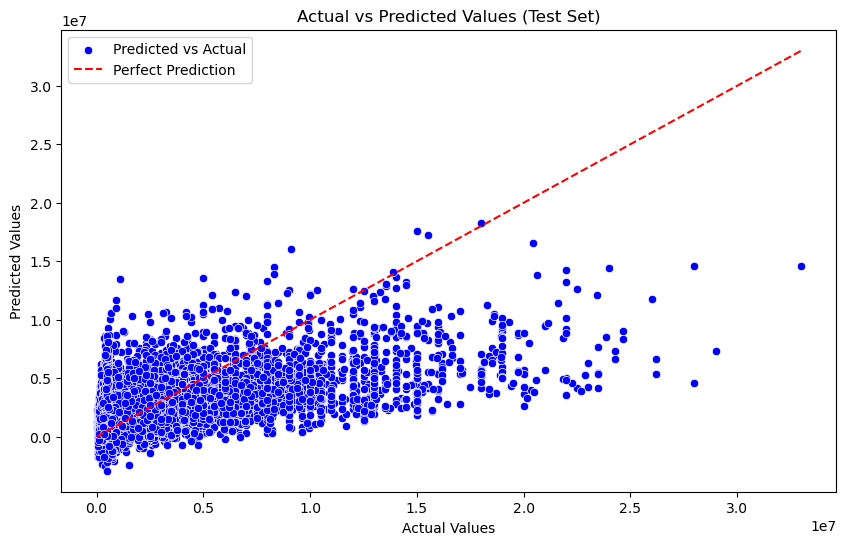

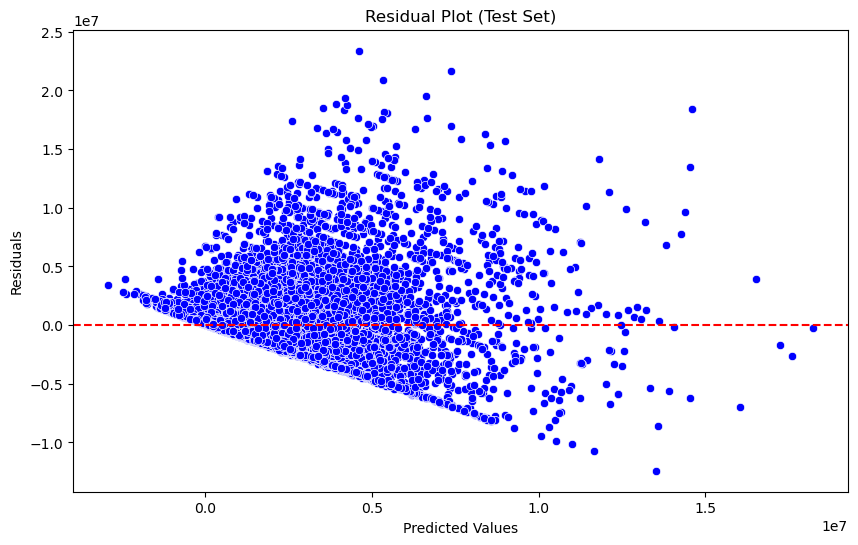

In [830]:
# Predicting the values
y_train_pred = model_linear_regression.predict(X_train_final)
y_test_pred = model_linear_regression.predict(X_test_final)

# Plot Actual vs. Predicted values for Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_final, y=y_test_pred, label='Predicted vs Actual', color='blue')
plt.plot([min(y_test_final), max(y_test_final)], [min(y_test_final), max(y_test_final)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()

# Calculate residuals
train_residuals = y_train_final - y_train_pred
test_residuals = y_test_final - y_test_pred

# Plot Residuals for Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=test_residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

The chart below shows the prediction charts against predicted values and actual values. The prediction values are more accurate from the low to mid-range, while the prediction values for higher-salary players are not very accurate and reliable. This can be seen from the points not following the predicted value diagonal line. The residual plot below the prediction chart shows the vertical distance of each data point. A well-behaved plot will bounce randomly and form a horizontal line where the residual line is 0.

<a id = 'modelcoefficients'></a>
### **Model Coefficients and Correlation Analysis**

Model Coefficients show the quantitative relationship between the ‘salary’ and the independent or predictor variables. They represent the magnitude of the change in the target variable when the value of the predictor variable changes by one unit. A positive coefficient would indicate a positive relationship between that predictor variable and the target variable. A negative coefficient would indicate a negative relationship between that predictor variable and the target variable. A larger coefficient value would indicate a stronger relationship between the predictor variable and the target variable while a smaller coefficient value would indicate a stronger relationship between that predictor variable and the target variable. 

In [831]:
coefficients = pd.Series(model_linear_regression.coef_, index=X_train.columns) 
coefficients.sort_values(ascending=False, inplace=True) 
print(coefficients)

93     9.078133e+07
79     9.042913e+07
91     8.919817e+07
92     8.783594e+07
110    8.772982e+07
           ...     
399   -5.758904e+07
398   -5.760899e+07
425   -5.923604e+07
426   -6.479305e+07
0     -8.666701e+07
Length: 1652, dtype: float64


Generally, it can be seen that the 93rd column tends to have the highest value of model coefficients, followed by the 79th column. The other features have a small value of model coefficients. This means the 93rd column has the largest effect on the ‘salary’ as compared to the other features, with the target variable changing with a magnitude of 9.078133e+07 when the 93rd column changes by one unit. 

<a id = 'summary'></a>
## **Summary and Further Improvements**

<a id = 'findings'></a>
### **Findings**

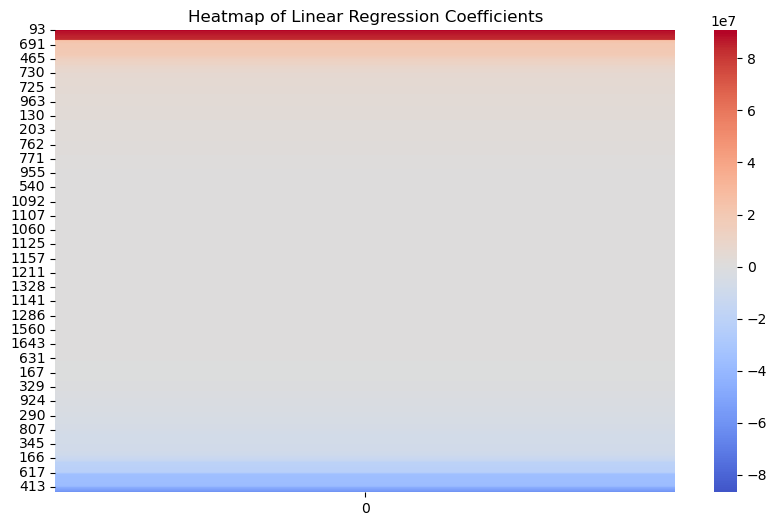

In [832]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(coefficients), cmap='coolwarm', center=0)
plt.title('Heatmap of Linear Regression Coefficients')
plt.show()

The heatmap of coefficients shows data similar to the previous coefficient code. The 93rd column has the highest value of model coefficients, meaning that the higher the value in the column, the higher the salary of the baseball player. The other features have smaller coefficients showing that they are not the main contributors towards the change in salary. As when these features increase by a unit, the salary increases or decreases marginally. The columns derived from the 413th column generally have a high negative model coefficient, which means that it has an inverse relationship with salary. The lower the values in the 413th column, the higher the salary.

**Recommendations**

Players with a certain set range of skills are allowed to have a better-than-average salary. They have to make fewer errors and have good batting averages, on-base percentages, and fielding percentages. Some player strategies that can be taken are to focus on players who are good at fielding and those who make fewer errors. Teams can also focus on improving their players to ensure a higher return on investment based on the salary they pay the players. 

Some recommendations are to focus on acquiring players whose predicted salaries are lower than their potential performance. This allows us to get skilled players while keeping their salary at a minimal required amount. They can also use predicted salary data to align contract offers with market values, ensuring the players are not overpaid or underpaid, allowing for better management of financial resources. They can identify the key players whose market value is likely to increase and negotiate early contract extensions, allowing the team to plan ahead of time and secure good players with the exact salary. 

The expected outcome of this model is to reduce the risk of overpaying and underpaying the players, allowing them to realise their worth within the team while reducing the spending of unnecessary expenses unless required. It also allows a better distribution of financial resources across the roster and builds a roster that balances high-value players with cost-effective signings, ensuring the team is strong and able to win games. The extra resources that were not used can be placed into hiring personnel and experts to train the players or acquire items that could improve both the skills and the performance of the players.

<a id = 'possibleimprovements'></a>
### **Possible Improvements**

More improvements could be made to improve the model performance and score. Firstly, more tables can be used to explore more features that can be used to better determine the baseball player’s salary more accurately. More features can also be created to undermine more information within the data. This includes more mathematical features or time series features that can be created from the data tables provided. Most importantly, more research can be done on this problem and the incorporation of domain knowledge will allow us to further understand the problem and make better decisions in changing the data and utilising more features to enhance the model.

Some next steps to take are to implement the insights gained into optimising resource strategies, continuously updating the model and exploring further analysis opportunities to refine current strategies.

<a id = 'reflection'></a>
## **Reflection**

<a id = 'knowledge'></a>
### **Konwledge, Skills, and Abilities Learnt**

I have learned much from this module, from gaining new knowledge to gaining new abilities and skills. The Data Wrangling module has allowed me to have a strong and solid grasp of the general data wrangling process, such as discovering insights from data, structuring the data, cleaning the data, and transforming the data. The importance of cleaning and transforming raw data into a usable format for analysis is an essential part of data wrangling. I have also understood the principles behind data wrangling, and it had improved my ability to handle different types of data such as null values, numeric variables and categorical variables. Generally, I have developed an ability to identify and correct the data inconsistencies within the data provided. I have also learned how to deal with the missing values and ensure that the datasets are prepared correctly for analysis and model creation.

For feature extraction and transformation, I have learned how to extract and transform features from various types. This includes the extraction of time series features, transactional features, text features, and features from structured datasets. This knowledge allowed me to convert the raw data into meaningful features that can be used in prediction models such as regression or classification. I have also honed my ability to apply various techniques and methods to enhance and improve the quality of features. This includes encoding categorical variables, transforming numerical data, imputing missing values, handling outliers, discretising variables, and scaling variables.

For the utility of Python packages for feature engineering, I gained experience in using advanced Python packages such as pandas, NumPy, matplotlib, scikit-learn, and feature engine for feature extraction and transformation of data. These packages and tools have helped me create better prediction models that make accurate and reliable predictions. I have also developed the ability to leverage these packages to perform complex data transformations, which has enhanced the predictive power of your models. This includes different techniques and variations of transformation methods and data handling.

I have also learned to utilise enterprise software for Data Wrangling. In particular, the software experienced is Alteryx. I gained familiarity with Alteryx, allowing me to facilitate inline data wrangling. This allows me to perform data editing and transformation directly. I have also learned how to integrate these tools into my workflow, which makes the data-wrangling process more efficient and convenient.

For the application of data wrangling techniques to real-world problems, through practicals, exercises, and assignments, I have gained practical experience in applying data-wrangling techniques to solve real-world problems. Some of these problems include predicting the popularity of songs, and the salary of baseball players which is conducted in this assignment. This has helped me to understand the importance of data quality and its impact on the success of the prediction models and maybe more machine learning models in the near future. I have also enhanced my problem-solving skills by working on real-world datasets. This has strengthened my understanding of how impactful data wrangling is to the overall data analysis process.

<a id = 'areasimprove'></a>
### **Areas for improvement**

Firstly, I can deepen my understanding of complex data types. Although I have gained proficiency in working with structured datasets, there is more room to grow and deepen my understanding of more complex data types, such as unstructured text or multimedia data. By focusing on these areas, I can broaden my skill set and increase the types of models I can create, allowing me to practically apply my skills learned. New types of models include deep learning models such as natural language processing models and computer vision models. 

Secondly, I can explore alternative tools and libraries. Although I have become more skilled at using popular Python packages, it might be beneficial to explore other alternative tools and libraries that offer different functions or computing efficiency. This could provide me with a more diverse toolkit for data wrangling, making me more viable in the field.

Thirdly, I can apply the techniques I have learned to a wider range of real-world problems. By further solidifying my skills, I can consider applying data-wrangling techniques learned to a broader range of real-world problems. Generally, this could involve working with datasets from different industries, besides song popularity and baseball player’s salary. This can allow me to gain a more comprehensive understanding of the challenges and solutions to data-wrangling problems.

In conclusion, by reflecting on these areas, I can continue to build on my strengths while addressing potential gaps in my learning process, which will enhance my overall ability to apply the data-wrangling techniques learned effectively in various contexts.

<a id = 'references'></a>
## **References**

- ChatGPT. (n.d.). https://chatgpt.com/c/e89dddf9-7fe3-48d9-b041-94865ad6fe88
- Batting Average | Glossary | MLB.com. (n.d.). MLB.com. https://www.mlb.com/glossary/standard-stats/batting-average
- On-base Percentage (OBP) | Glossary | MLB.com. (n.d.). MLB.com. https://www.mlb.com/glossary/standard-stats/on-base-percentage
- Slugging Percentage (SLG) | Glossary | MLB.com. (n.d.). MLB.com. https://www.mlb.com/glossary/standard-stats/slugging-percentage
- Fielding Percentage (FPCT) | Glossary | MLB.com. (n.d.). MLB.com. https://www.mlb.com/glossary/standard-stats/fielding-percentage
- ArbitraryOutlierCapper — 1.8.0. (n.d.). https://feature-engine.trainindata.com/en/latest/user_guide/outliers/ArbitraryOutlierCapper.html